In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import h5py

In [3]:
data1_mass = h5py.File('fof_subhalo_tab_099.Subhalo.SubhaloMassInRadType.hdf5',mode = 'r')
data2_sfr = h5py.File('fof_subhalo_tab_099.Subhalo.SubhaloSFRinRad.hdf5',mode = 'r')
data3_pos = h5py.File('fof_subhalo_tab_099.Subhalo.SubhaloPos.hdf5',mode = 'r')
#data4_grnr = h5py.File('fof_subhalo_tab_099.Subhalo.SubhaloGrNr.hdf5',mode = 'r')
#data5_groupmass = h5py.File('fof_subhalo_tab_099.Group.GroupMass.hdf5',mode='r')
data6_color = h5py.File('fof_subhalo_tab_099.Subhalo.SubhaloStellarPhotometrics.hdf5',mode = 'r')
head1 =data1_mass['Subhalo']
head2 = data2_sfr['Subhalo']
head3 = data3_pos['Subhalo']
#head4 = data4_grnr['Subhalo']
#head5 = data5_groupmass['Group']
head6  = data6_color['Subhalo']

In [4]:
stellarmass = np.array(head1['SubhaloMassInRadType'])[:,4]
sfr = np.array(head2['SubhaloSFRinRad'])
pos = np.array(head3['SubhaloPos'])
#grnr = np.array(head4['SubhaloGrNr'])
#gr_mass = np.array(head5['GroupMass'])
U=np.array(head6['SubhaloStellarPhotometrics'])[:,0]
B= np.array(head6['SubhaloStellarPhotometrics'])[:,1]
V= np.array(head6['SubhaloStellarPhotometrics'])[:,2]
K= np.array(head6['SubhaloStellarPhotometrics'])[:,3]
g= np.array(head6['SubhaloStellarPhotometrics'])[:,4]
r= np.array(head6['SubhaloStellarPhotometrics'])[:,5]
i =  np.array(head6['SubhaloStellarPhotometrics'])[:,6]
z = np.array(head6['SubhaloStellarPhotometrics'])[:,7]

In [5]:
stellarmass = stellarmass.reshape(-1,1)
sfr =sfr.reshape(-1,1)
#grnr =grnr.reshape(-1,1)
#gr_mass=gr_mass.reshape(-1,1)
U = U.reshape(-1,1)
V = V.reshape(-1,1)
K = K.reshape(-1,1)
r= r.reshape(-1,1)
B= B.reshape(-1,1)
i= i.reshape(-1,1)
g= g.reshape(-1,1)
z=z.reshape(-1,1)

In [6]:
data = pd.DataFrame(np.hstack((pos,stellarmass,sfr,U,B,V,K,g,r,i,z)))

In [7]:
data.columns = ['x','y','z','stellarmass','sfr','U','B','V','K','g','r','i','z_color']

In [8]:
data.head()

,x,y,z,stellarmass,sfr,U,B,V,K,g,r,i,z_color
0,43718.812500,48813.640625,147594.953125,352.793427,0.0,-24.791388,-25.177679,-26.034241,-28.911427,-25.628429,-26.373409,-26.728613,-26.975189
1,45442.273438,51850.199219,146416.500000,173.525040,0.0,-24.046928,-24.439625,-25.297689,-28.171772,-24.891636,-25.636240,-25.990240,-26.236513
2,44490.761719,49091.714844,147870.578125,38.240879,0.0,-22.093132,-22.588654,-23.502014,-26.553734,-23.062399,-23.858458,-24.239382,-24.516970
3,43820.785156,50939.398438,147711.046875,16.717274,0.0,-21.287239,-21.744883,-22.638138,-25.620272,-22.211082,-22.987967,-23.359406,-23.624681
4,44302.578125,49630.972656,147869.484375,15.221505,0.0,-21.176722,-21.637291,-22.531923,-25.517952,-22.103907,-22.881990,-23.252897,-23.519327


In [9]:
gal = data[data['stellarmass']>0]

In [10]:
len(gal)

1238655

In [11]:
gal['stellarmass'] = gal['stellarmass']*1e10

C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
gal['g_r'] = gal['g'] - gal['r']

C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
gal['log_mass'] = np.log10(gal['stellarmass'])

C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
gal.head(5)

,x,y,z,stellarmass,sfr,U,B,V,K,g,r,i,z_color,g_r,log_mass
0,43718.812500,48813.640625,147594.953125,3.527934e+12,0.0,-24.791388,-25.177679,-26.034241,-28.911427,-25.628429,-26.373409,-26.728613,-26.975189,0.744980,12.547520
1,45442.273438,51850.199219,146416.500000,1.735250e+12,0.0,-24.046928,-24.439625,-25.297689,-28.171772,-24.891636,-25.636240,-25.990240,-26.236513,0.744604,12.239362
2,44490.761719,49091.714844,147870.578125,3.824088e+11,0.0,-22.093132,-22.588654,-23.502014,-26.553734,-23.062399,-23.858458,-24.239382,-24.516970,0.796059,11.582528
3,43820.785156,50939.398438,147711.046875,1.671727e+11,0.0,-21.287239,-21.744883,-22.638138,-25.620272,-22.211082,-22.987967,-23.359406,-23.624681,0.776884,11.223165
4,44302.578125,49630.972656,147869.484375,1.522151e+11,0.0,-21.176722,-21.637291,-22.531923,-25.517952,-22.103907,-22.881990,-23.252897,-23.519327,0.778084,11.182458


# Stellar mass function

In [15]:
gal = gal[gal['log_mass']>8]

In [19]:
gal_new = gal[gal['log_mass']<12]

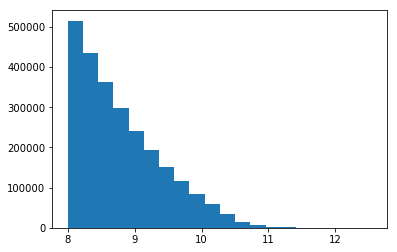

In [17]:
counts,bins,_ = plt.hist(np.log10(gal['stellarmass']),20,cumulative=-1)

In [18]:
counts = counts/(205**3)

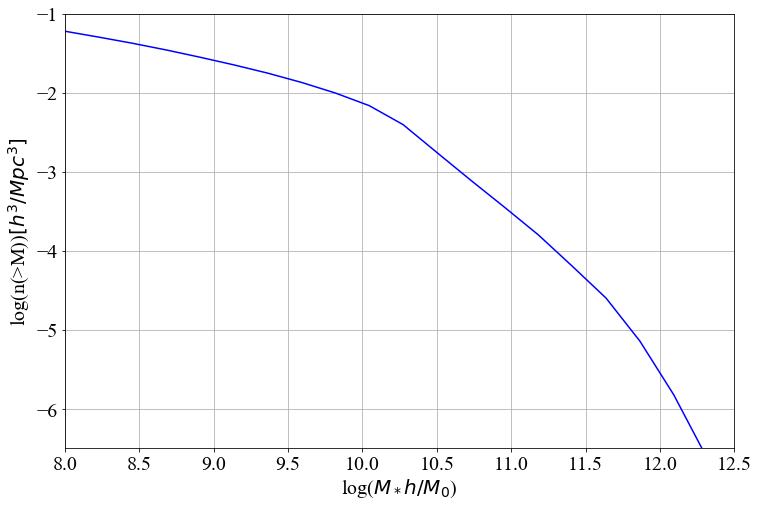

In [24]:
fig = plt.figure(figsize=(12,8))
csfont = {'fontname':'Times New Roman'}
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)  
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
ax = fig.add_subplot(111)
ax.plot(bins[:-1],np.log10(counts),color = 'blue')
#ax.fill_between(bincenters,corr_rand_mean - corr_rand_std,corr_rand_mean + corr_rand_std,color = 'lightgreen')
#ax.grid('on'),xlabel='$log(M_* h/M_0)$',ylabel = '$log[n(>M)h^3/Mpc^3]$'
plt.xlabel('log($M_* h/M_0$)',fontsize=20)
plt.ylabel('log(n(>M))$[h^3/Mpc^3]$',fontsize=20)
plt.xlim(8,12.5)
plt.ylim(-6.5,-1)
plt.grid('on')
plt.savefig('stellar_mass_function.pdf')

# Color Distribution

In [44]:
gal1=gal[(gal['log_mass']>9)&(gal['log_mass']<9.5)]
gal2=gal[(gal['log_mass']>9.5)&(gal['log_mass']<10)]
gal3=gal[(gal['log_mass']>10)&(gal['log_mass']<10.5)]
gal4=gal[(gal['log_mass']>10.5)&(gal['log_mass']<11)]
gal5=gal[(gal['log_mass']>11)&(gal['log_mass']<11.5)]
gal6=gal[(gal['log_mass']>11.5)&(gal['log_mass']<12)]


In [45]:
g_r1 = gal1['g_r'].values
g_r2 = gal2['g_r'].values
g_r3 = gal3['g_r'].values
g_r4 = gal4['g_r'].values
g_r5 = gal5['g_r'].values
g_r6 = gal6['g_r'].values

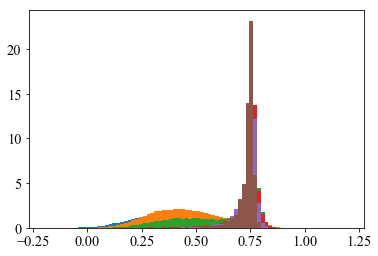

In [46]:
hist1,bins,_ = plt.hist(g_r1,80,density = True,range=(-0.2,1.2))
hist2,bins,_ = plt.hist(g_r2,80,density = True,range=(-0.2,1.2))
hist3,bins,_ = plt.hist(g_r3,80,density = True,range=(-0.2,1.2))
hist4,bins,_ = plt.hist(g_r4,80,density = True,range=(-0.2,1.2))
hist5,bins,_ = plt.hist(g_r5,80,density = True,range=(-0.2,1.2))
hist6,bins,_ = plt.hist(g_r6,80,density = True,range=(-0.2,1.2))

In [47]:
bincenters = 0.5*(bins[1:]+bins[:-1])

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


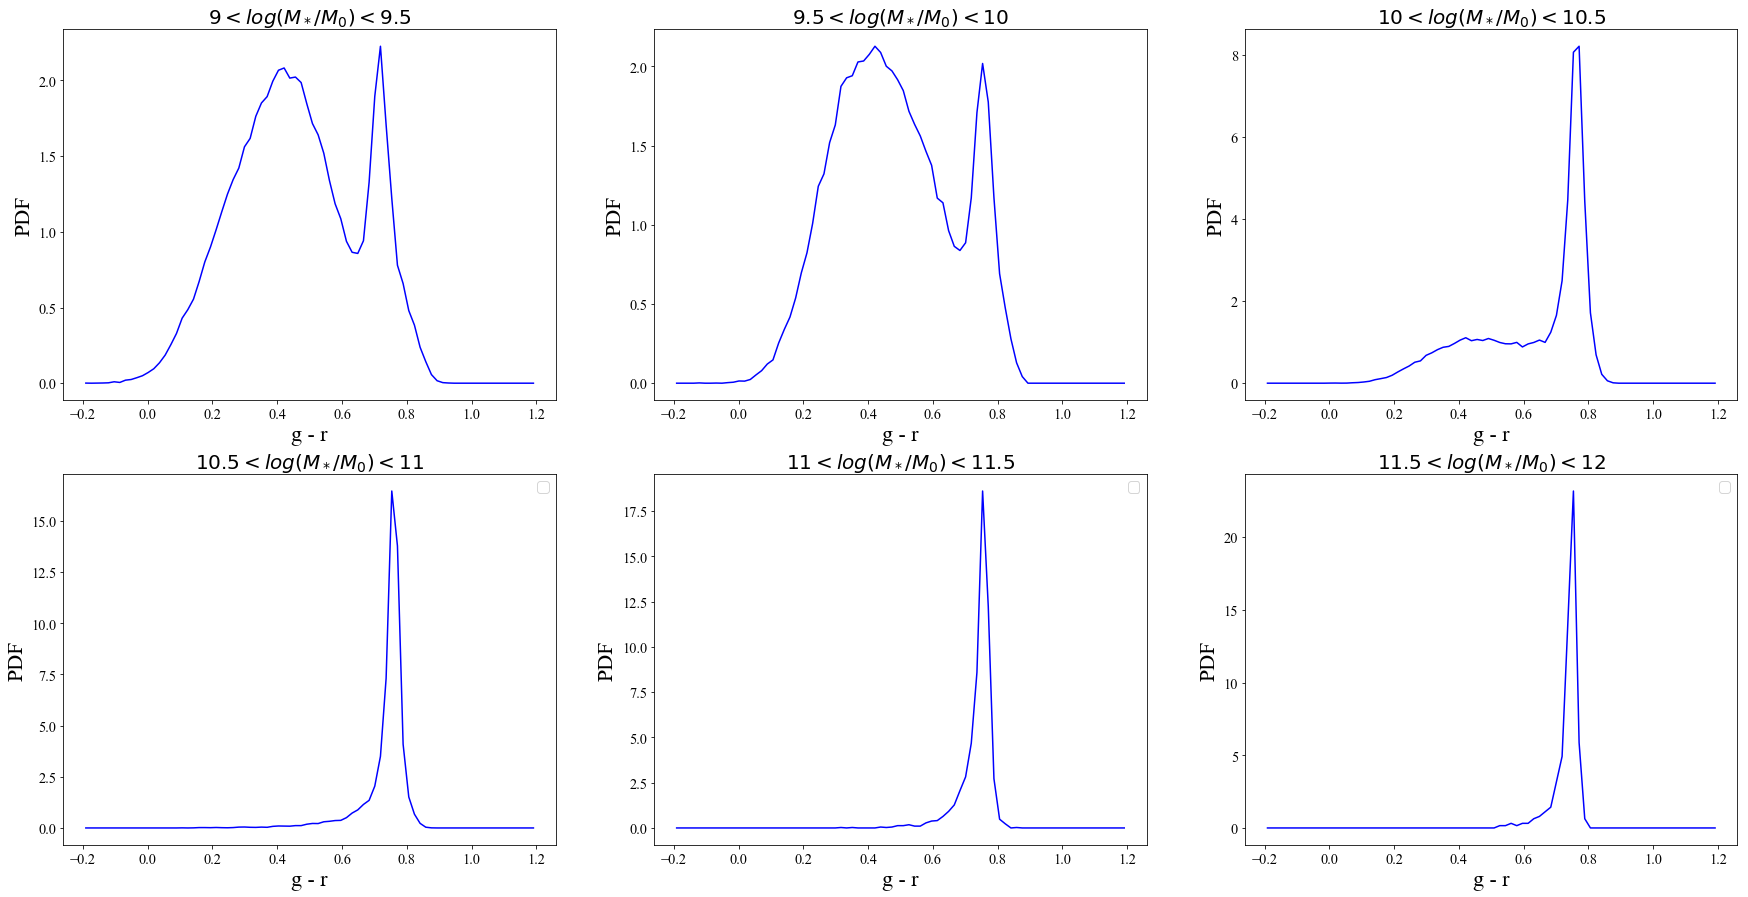

In [58]:
fig = plt.figure(figsize=(30,15))
params = {'legend.fontsize': 'x-large',
           'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(231,xlabel='g - r',ylabel = 'PDF')
plt.title('$9<log(M_*/M_0)<9.5$',fontsize=20)
ax.plot(bincenters,hist1,color = 'blue')
plt.xlabel('g - r',fontsize=22)
plt.ylabel('PDF',fontsize=22)
#plt.legend(loc='upper left')                 
ax = fig.add_subplot(232,xlabel='g - r',ylabel = 'PDF',title = '$9.5<log(M_*/M_0)<10$')
plt.title('$9.5<log(M_*/M_0)<10$',fontsize=20)
plt.xlabel('g - r',fontsize=22)
plt.ylabel('PDF',fontsize=22)
ax.plot(bincenters,hist2,color = 'blue')
#plt.legend(loc=0)  
ax = fig.add_subplot(233,xlabel='g - r',ylabel = 'PDF',title = '$10<log(M_*/M_0)<10.5$')
ax.plot(bincenters,hist3,color = 'blue')
plt.xlabel('g - r',fontsize=22)
plt.ylabel('PDF',fontsize=22)
plt.title('$10<log(M_*/M_0)<10.5$',fontsize=20)
#plt.legend(loc=0)  
ax = fig.add_subplot(234,xlabel='g - r',ylabel = 'PDF',title = '$10.5<log(M_*/M_0)<11$')
ax.plot(bincenters,hist4,color = 'blue')
plt.xlabel('g - r',fontsize=22)
plt.ylabel('PDF',fontsize=22)
plt.title('$10.5<log(M_*/M_0)<11$',fontsize=20)
plt.legend(loc=0)  
ax = fig.add_subplot(235,xlabel='g - r',ylabel = 'PDF',title = '$11<log(M_*/M_0)<11.5$')
ax.plot(bincenters,hist5,color = 'blue')
plt.xlabel('g - r',fontsize=22)
plt.ylabel('PDF',fontsize=22)
plt.title('$11<log(M_*/M_0)<11.5$',fontsize=20)
plt.legend(loc=0)  
ax = fig.add_subplot(236,xlabel='g - r',ylabel = 'PDF',title ='$11.5<log(M_*/M_0)<12$')
ax.plot(bincenters,hist6,color = 'blue')
plt.xlabel('g - r',fontsize=22)
plt.ylabel('PDF',fontsize=22)
plt.title('$11.5<log(M_*/M_0)<12$',fontsize=20)
plt.legend(loc=0)
plt.savefig('color-distribution.png')

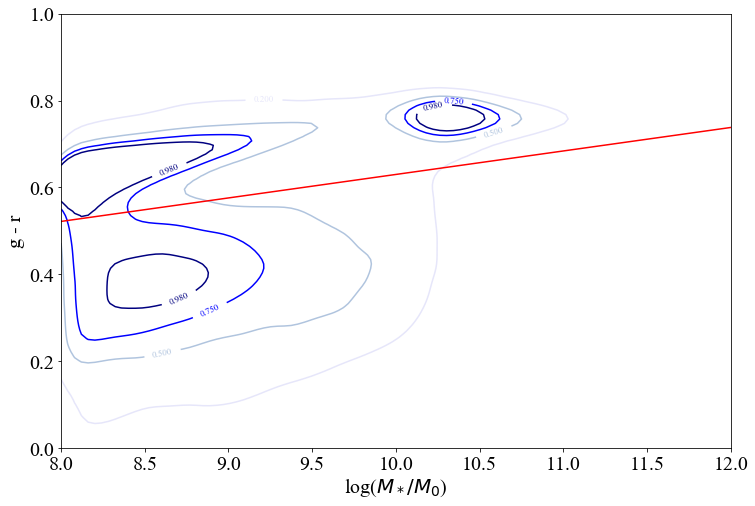

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
fig = plt.figure(figsize=(12,8))
csfont = {'fontname':'Times New Roman'}
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)  
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
x=gal['log_mass'].values
y = gal['g_r'].values
xmin, xmax = 8,12
ymin, ymax = 0, 1

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

#fig = pl.figure(figsize=(12,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
# Contourf plot
#cfset = ax.contourf(xx, yy, f, levels = [0.2,0.5,0.75,0.98],cmap='Blues')
## Or kernel density estimate plot instead of the contourf plot
#ax.imshow(np.rot90(f), cmap='Blues', extent=[xmin, xmax, ymin, ymax])
# Contour plot*/M_0
cset = ax.contour(xx, yy, f,  levels = [0.2,0.5,0.75,0.98],colors=['lavender','lightsteelblue','blue','navy'])
# Label plot
ax.clabel(cset, inline=1, fontsize=9)
#minmin = [0.59008301,0.60908203,0.6187793,0.65824219,0.67476563,0.68756836,0.68270508,0.67511719]
#m = [8.6,8.8,9,9.2,9.4,9.6,9.8,10]
#m= np.linspace(9,12,100)
#minmin = 0.046077324848484855*m + 0.21613797393939393
x_new=np.linspace(8,12,100)
y_new = x_new*0.054 + 0.09
#y_new2 = x_new*0.054 
#ax.plot(m,minmin+0.01,'g.')
ax.plot(x_new,y_new,color = 'red')
#ax.plot(x_new,y_new+0.1,'g--')
#ax.plot(x_new,y_new-0.1,'g--')
#ax.plot(m,minmin,'r.')
ax.set_xlabel('log($M_*/M_0$)',fontsize=20)
ax.set_ylabel('g - r',fontsize=20)
plt.savefig('stellarmass-color-new.png')
pl.show()

In [ ]:
x_new=np.array([9,10,11,12])
y_new = x_new*0.054 + 0.05
plt.plot(x_new,y_new)
plt.xlim(9,12)

In [16]:
gal['new_stellarmass']=gal['log_mass']*0.054 + 0.09

In [81]:
gal['new_stellarmass_low'] = gal['log_mass']*0.054 - 0.1
gal['new_stellarmass_high'] = gal['log_mass']*0.054 + 0.1

# Red and Blue galaxies

In [17]:
gal_blue = gal[gal['new_stellarmass']>gal['g_r']]
gal_red = gal[gal['new_stellarmass']<gal['g_r']]

In [83]:
gal_blue = gal[gal['new_stellarmass_low']>gal['g_r']]
gal_red = gal[gal['new_stellarmass_high']<gal['g_r']]

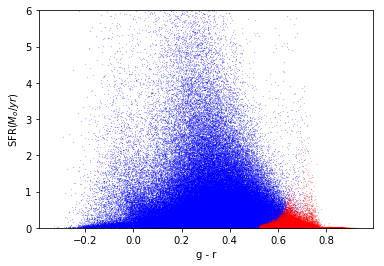

In [17]:
plt.scatter(gal_blue['g_r'].values,gal_blue['sfr'].values,color = 'blue',s=0.01)
plt.scatter(gal_red['g_r'].values,gal_red['sfr'].values,color = 'red',s=0.01)
plt.ylim(0,6);
plt.xlabel('g - r');
plt.ylabel('SFR$(M_o/yr)$');
#plt.yscale('log')
#plt.savefig('sfr-color.png')

In [18]:
len(gal_blue)  ####

316476

In [19]:
len(gal_blue)

316476

In [20]:
len(gal_blue)

316476

In [21]:
len(gal_blue[gal_blue['sfr']==0]) #####

9644

In [89]:
len(gal_blue[gal_blue['sfr']==0])

9644

In [26]:
len(gal_blue[gal_blue['sfr']==0])

3944

In [19]:
len(gal_red)  ####

198858

In [22]:
len(gal_red)

198858

In [75]:
len(gal_red[gal_red['sfr']==0])   #####

156092

In [91]:
len(gal_red[gal_red['sfr']==0])

160284

In [31]:
len(gal_blue[(gal_blue['stellarmass']>9)&(gal_blue['stellarmass']<10)])

109294

In [32]:
len(gal_red[(gal_red['stellarmass']>9)&(gal_red['stellarmass']<10)])

47919

In [33]:
len(gal_blue[(gal_blue['stellarmass']>10)&(gal_blue['stellarmass']<11)])

18235

In [34]:
len(gal_red[(gal_red['stellarmass']>10)&(gal_red['stellarmass']<11)])

43197

In [35]:
len(gal_blue[(gal_blue['stellarmass']>11)&(gal_blue['stellarmass']<12)])

187

In [36]:
len(gal_red[(gal_red['stellarmass']>11)&(gal_red['stellarmass']<12)])

2421

In [22]:
xyz_blue = gal_blue[['x','y','z']]/1000
xyz_red = gal_red[['x','y','z']]/1000

In [34]:
xyz_red

,x,y,z
2,44.490761,49.091713,147.870575
3,43.820786,50.939400,147.711044
4,44.302578,49.630974,147.869492
5,44.014526,52.243404,144.518005
6,45.629852,52.255409,146.021912
7,46.637634,53.009380,146.825516
8,44.246441,52.066494,145.527481
9,43.609501,48.269985,146.391800
10,44.053883,51.868416,146.193726
11,44.759136,51.661354,146.846039


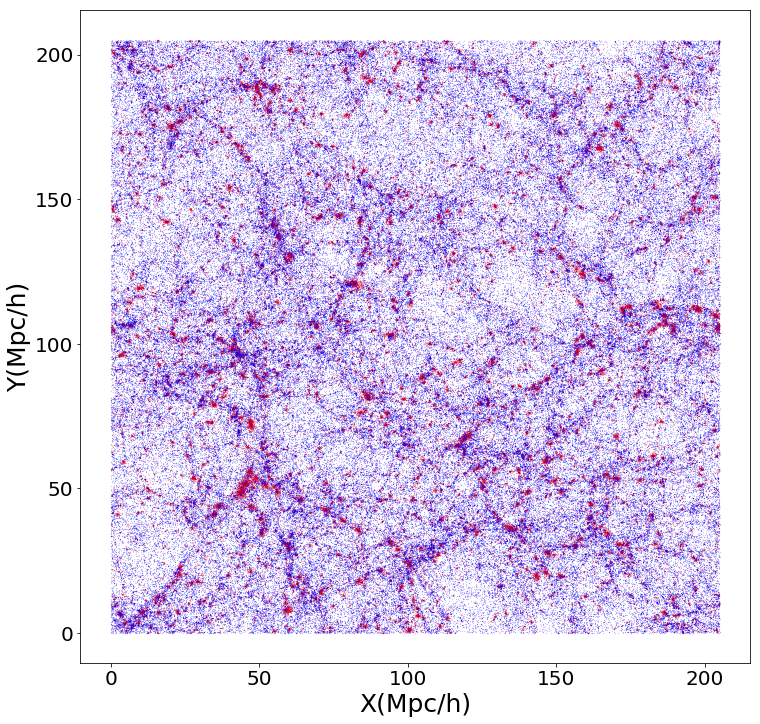

In [22]:
figure = plt.figure(figsize=(12,12))
ax = figure.add_subplot(111,xlabel='x(Mpc/h)',ylabel='y(Mpc/h)');
ax.scatter(xyz_red['x'].values,xyz_red['y'].values,s=0.006,color ='red');
ax.scatter(xyz_blue['x'].values,xyz_blue['y'].values,s=0.006,color ='blue');
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('X(Mpc/h)',fontsize=25)
plt.ylabel('Y(Mpc/h)',fontsize=25)
plt.savefig('2D-distribution-all-new.pdf')

# correlation function

In [404]:
len(gal_red)

198858

In [21]:
#gal_blue_8  =gal_blue[(gal_blue['log_mass']>8)&(gal_blue['log_mass']<8.5)]
#gal_red_8 = gal_red[(gal_red['log_mass']>8)&(gal_red['log_mass']<8.5)]

gal_blue_8_5  =gal_blue[(gal_blue['log_mass']>8.5)&(gal_blue['log_mass']<9)]
gal_red_8_5 = gal_red[(gal_red['log_mass']>8.5)&(gal_red['log_mass']<9)]



gal_blue_9  =gal_blue[(gal_blue['log_mass']>9)&(gal_blue['log_mass']<9.5)]
gal_red_9 = gal_red[(gal_red['log_mass']>9)&(gal_red['log_mass']<9.5)]

gal_blue_9_5  =gal_blue[(gal_blue['log_mass']>9.5)&(gal_blue['log_mass']<10)]
gal_red_9_5 = gal_red[(gal_red['log_mass']>9.5)&(gal_red['log_mass']<10)]


gal_blue_10  =gal_blue[(gal_blue['log_mass']>10)&(gal_blue['log_mass']<10.5)]
gal_red_10 = gal_red[(gal_red['log_mass']>10)&(gal_red['log_mass']<10.5)]


#gal_blue_10_5  =gal_blue[(gal_blue['log_mass']>10.5)&(gal_blue['log_mass']<11)]
#gal_red_10_5 = gal_red[(gal_red['log_mass']>10.5)&(gal_red['log_mass']<11)]


#gal_blue_11  =gal_blue[(gal_blue['log_mass']>11)&(gal_blue['log_mass']<11.5)]
#gal_red_11 = gal_red[(gal_red['log_mass']>11)&(gal_red['log_mass']<11.5)]


#gal_blue_11_5  =gal_blue[(gal_blue['log_mass']>11.5)&(gal_blue['log_mass']<12)]
#gal_red_11_5 = gal_red[(gal_red['log_mass']>11.5)&(gal_red['log_mass']<12)]

In [24]:
len(gal_blue_10)

18824

In [22]:
xyz_blue_9 = gal_blue_9[['x','y','z']]/1000
xyz_red_9 =gal_red_9[['x','y','z']]/1000


xyz_blue_9_5 = gal_blue_9_5[['x','y','z']]/1000
xyz_red_9_5 =gal_red_9_5[['x','y','z']]/1000


xyz_blue_10 = gal_blue_10[['x','y','z']]/1000
xyz_red_10 =gal_red_10[['x','y','z']]/1000




xyz_blue_8_5 = gal_blue_8_5[['x','y','z']]/1000
xyz_red_8_5 =gal_red_8_5[['x','y','z']]/1000

In [429]:
blue8_5_1 = xyz_blue_8_5[(xyz_blue_8_5['x']<102.5)&(xyz_blue_8_5['y']<102.5)&(xyz_blue_8_5['z']<102.5)].values
blue8_5_2 = xyz_blue_8_5[(xyz_blue_8_5['x']<102.5)&(xyz_blue_8_5['y']<102.5)&(xyz_blue_8_5['z']>102.5)].values
blue8_5_3 = xyz_blue_8_5[(xyz_blue_8_5['x']<102.5)&(xyz_blue_8_5['y']>102.5)&(xyz_blue_8_5['z']<102.5)].values
blue8_5_4 = xyz_blue_8_5[(xyz_blue_8_5['x']>102.5)&(xyz_blue_8_5['y']<102.5)&(xyz_blue_8_5['z']<102.5)].values
blue8_5_5 = xyz_blue_8_5[(xyz_blue_8_5['x']>102.5)&(xyz_blue_8_5['y']>102.5)&(xyz_blue_8_5['z']<102.5)].values
blue8_5_6 = xyz_blue_8_5[(xyz_blue_8_5['x']>102.5)&(xyz_blue_8_5['y']<102.5)&(xyz_blue_8_5['z']>102.5)].values
blue8_5_7 = xyz_blue_8_5[(xyz_blue_8_5['x']<102.5)&(xyz_blue_8_5['y']>102.5)&(xyz_blue_8_5['z']>102.5)].values
blue8_5_8 = xyz_blue_8_5[(xyz_blue_8_5['x']>102.5)&(xyz_blue_8_5['y']>102.5)&(xyz_blue_8_5['z']>102.5)].values

In [430]:
blue8_5_1.shape

(10330, 3)

In [431]:
blue9_1 = xyz_blue_9[(xyz_blue_9['x']<102.5)&(xyz_blue_9['y']<102.5)&(xyz_blue_9['z']<102.5)].values
blue9_2 = xyz_blue_9[(xyz_blue_9['x']<102.5)&(xyz_blue_9['y']<102.5)&(xyz_blue_9['z']>102.5)].values
blue9_3 = xyz_blue_9[(xyz_blue_9['x']<102.5)&(xyz_blue_9['y']>102.5)&(xyz_blue_9['z']<102.5)].values
blue9_4 = xyz_blue_9[(xyz_blue_9['x']>102.5)&(xyz_blue_9['y']<102.5)&(xyz_blue_9['z']<102.5)].values
blue9_5 = xyz_blue_9[(xyz_blue_9['x']>102.5)&(xyz_blue_9['y']>102.5)&(xyz_blue_9['z']<102.5)].values
blue9_6 = xyz_blue_9[(xyz_blue_9['x']>102.5)&(xyz_blue_9['y']<102.5)&(xyz_blue_9['z']>102.5)].values
blue9_7 = xyz_blue_9[(xyz_blue_9['x']<102.5)&(xyz_blue_9['y']>102.5)&(xyz_blue_9['z']>102.5)].values
blue9_8 = xyz_blue_9[(xyz_blue_9['x']>102.5)&(xyz_blue_9['y']>102.5)&(xyz_blue_9['z']>102.5)].values

In [432]:
blue9_5_1 = xyz_blue_9_5[(xyz_blue_9_5['x']<102.5)&(xyz_blue_9_5['y']<102.5)&(xyz_blue_9_5['z']<102.5)].values
blue9_5_2 = xyz_blue_9_5[(xyz_blue_9_5['x']<102.5)&(xyz_blue_9_5['y']<102.5)&(xyz_blue_9_5['z']>102.5)].values
blue9_5_3 = xyz_blue_9_5[(xyz_blue_9_5['x']<102.5)&(xyz_blue_9_5['y']>102.5)&(xyz_blue_9_5['z']<102.5)].values
blue9_5_4 = xyz_blue_9_5[(xyz_blue_9_5['x']>102.5)&(xyz_blue_9_5['y']<102.5)&(xyz_blue_9_5['z']<102.5)].values
blue9_5_5 = xyz_blue_9_5[(xyz_blue_9_5['x']>102.5)&(xyz_blue_9_5['y']>102.5)&(xyz_blue_9_5['z']<102.5)].values
blue9_5_6 = xyz_blue_9_5[(xyz_blue_9_5['x']>102.5)&(xyz_blue_9_5['y']<102.5)&(xyz_blue_9_5['z']>102.5)].values
blue9_5_7 = xyz_blue_9_5[(xyz_blue_9_5['x']<102.5)&(xyz_blue_9_5['y']>102.5)&(xyz_blue_9_5['z']>102.5)].values
blue9_5_8 = xyz_blue_9_5[(xyz_blue_9_5['x']>102.5)&(xyz_blue_9_5['y']>102.5)&(xyz_blue_9_5['z']>102.5)].values

In [433]:
blue10_1 = xyz_blue_10[(xyz_blue_10['x']<102.5)&(xyz_blue_10['y']<102.5)&(xyz_blue_10['z']<102.5)].values
blue10_2 = xyz_blue_10[(xyz_blue_10['x']<102.5)&(xyz_blue_10['y']<102.5)&(xyz_blue_10['z']>102.5)].values
blue10_3 = xyz_blue_10[(xyz_blue_10['x']<102.5)&(xyz_blue_10['y']>102.5)&(xyz_blue_10['z']<102.5)].values
blue10_4 = xyz_blue_10[(xyz_blue_10['x']>102.5)&(xyz_blue_10['y']<102.5)&(xyz_blue_10['z']<102.5)].values
blue10_5 = xyz_blue_10[(xyz_blue_10['x']>102.5)&(xyz_blue_10['y']>102.5)&(xyz_blue_10['z']<102.5)].values
blue10_6 = xyz_blue_10[(xyz_blue_10['x']>102.5)&(xyz_blue_10['y']<102.5)&(xyz_blue_10['z']>102.5)].values
blue10_7 = xyz_blue_10[(xyz_blue_10['x']<102.5)&(xyz_blue_10['y']>102.5)&(xyz_blue_10['z']>102.5)].values
blue10_8 = xyz_blue_10[(xyz_blue_10['x']>102.5)&(xyz_blue_10['y']>102.5)&(xyz_blue_10['z']>102.5)].values

In [434]:
red8_5_1 = xyz_red_8_5[(xyz_red_8_5['x']<102.5)&(xyz_red_8_5['y']<102.5)&(xyz_red_8_5['z']<102.5)].values
red8_5_2 = xyz_red_8_5[(xyz_red_8_5['x']<102.5)&(xyz_red_8_5['y']<102.5)&(xyz_red_8_5['z']>102.5)].values
red8_5_3 = xyz_red_8_5[(xyz_red_8_5['x']<102.5)&(xyz_red_8_5['y']>102.5)&(xyz_red_8_5['z']<102.5)].values
red8_5_4 = xyz_red_8_5[(xyz_red_8_5['x']>102.5)&(xyz_red_8_5['y']<102.5)&(xyz_red_8_5['z']<102.5)].values
red8_5_5 = xyz_red_8_5[(xyz_red_8_5['x']>102.5)&(xyz_red_8_5['y']>102.5)&(xyz_red_8_5['z']<102.5)].values
red8_5_6 = xyz_red_8_5[(xyz_red_8_5['x']>102.5)&(xyz_red_8_5['y']<102.5)&(xyz_red_8_5['z']>102.5)].values
red8_5_7 = xyz_red_8_5[(xyz_red_8_5['x']<102.5)&(xyz_red_8_5['y']>102.5)&(xyz_red_8_5['z']>102.5)].values
red8_5_8 = xyz_red_8_5[(xyz_red_8_5['x']>102.5)&(xyz_red_8_5['y']>102.5)&(xyz_red_8_5['z']>102.5)].values

In [435]:
red9_1 = xyz_red_9[(xyz_red_9['x']<102.5)&(xyz_red_9['y']<102.5)&(xyz_red_9['z']<102.5)].values
red9_2 = xyz_red_9[(xyz_red_9['x']<102.5)&(xyz_red_9['y']<102.5)&(xyz_red_9['z']>102.5)].values
red9_3 = xyz_red_9[(xyz_red_9['x']<102.5)&(xyz_red_9['y']>102.5)&(xyz_red_9['z']<102.5)].values
red9_4 = xyz_red_9[(xyz_red_9['x']>102.5)&(xyz_red_9['y']<102.5)&(xyz_red_9['z']<102.5)].values
red9_5 = xyz_red_9[(xyz_red_9['x']>102.5)&(xyz_red_9['y']>102.5)&(xyz_red_9['z']<102.5)].values
red9_6 = xyz_red_9[(xyz_red_9['x']>102.5)&(xyz_red_9['y']<102.5)&(xyz_red_9['z']>102.5)].values
red9_7 = xyz_red_9[(xyz_red_9['x']<102.5)&(xyz_red_9['y']>102.5)&(xyz_red_9['z']>102.5)].values
red9_8 = xyz_red_9[(xyz_red_9['x']>102.5)&(xyz_red_9['y']>102.5)&(xyz_red_9['z']>102.5)].values

In [436]:
red9_5_1 = xyz_red_9_5[(xyz_red_9_5['x']<102.5)&(xyz_red_9_5['y']<102.5)&(xyz_red_9_5['z']<102.5)].values
red9_5_2 = xyz_red_9_5[(xyz_red_9_5['x']<102.5)&(xyz_red_9_5['y']<102.5)&(xyz_red_9_5['z']>102.5)].values
red9_5_3 = xyz_red_9_5[(xyz_red_9_5['x']<102.5)&(xyz_red_9_5['y']>102.5)&(xyz_red_9_5['z']<102.5)].values
red9_5_4 = xyz_red_9_5[(xyz_red_9_5['x']>102.5)&(xyz_red_9_5['y']<102.5)&(xyz_red_9_5['z']<102.5)].values
red9_5_5 = xyz_red_9_5[(xyz_red_9_5['x']>102.5)&(xyz_red_9_5['y']>102.5)&(xyz_red_9_5['z']<102.5)].values
red9_5_6 = xyz_red_9_5[(xyz_red_9_5['x']>102.5)&(xyz_red_9_5['y']<102.5)&(xyz_red_9_5['z']>102.5)].values
red9_5_7 = xyz_red_9_5[(xyz_red_9_5['x']<102.5)&(xyz_red_9_5['y']>102.5)&(xyz_red_9_5['z']>102.5)].values
red9_5_8 = xyz_red_9_5[(xyz_red_9_5['x']>102.5)&(xyz_red_9_5['y']>102.5)&(xyz_red_9_5['z']>102.5)].values

In [437]:
red10_1 = xyz_red_10[(xyz_red_10['x']<102.5)&(xyz_red_10['y']<102.5)&(xyz_red_10['z']<102.5)].values
red10_2 = xyz_red_10[(xyz_red_10['x']<102.5)&(xyz_red_10['y']<102.5)&(xyz_red_10['z']>102.5)].values
red10_3 = xyz_red_10[(xyz_red_10['x']<102.5)&(xyz_red_10['y']>102.5)&(xyz_red_10['z']<102.5)].values
red10_4 = xyz_red_10[(xyz_red_10['x']>102.5)&(xyz_red_10['y']<102.5)&(xyz_red_10['z']<102.5)].values
red10_5 = xyz_red_10[(xyz_red_10['x']>102.5)&(xyz_red_10['y']>102.5)&(xyz_red_10['z']<102.5)].values
red10_6 = xyz_red_10[(xyz_red_10['x']>102.5)&(xyz_red_10['y']<102.5)&(xyz_red_10['z']>102.5)].values
red10_7 = xyz_red_10[(xyz_red_10['x']<102.5)&(xyz_red_10['y']>102.5)&(xyz_red_10['z']>102.5)].values
red10_8 = xyz_red_10[(xyz_red_10['x']>102.5)&(xyz_red_10['y']>102.5)&(xyz_red_10['z']>102.5)].values

In [529]:
bins = np.logspace(-1,1.7,10)
bincenters = 0.5*(bins[1:]+bins[:-1])

In [530]:
bincenters

array([ 0.14976312,  0.2988167 ,  0.5962177 ,  1.18961071,  2.37358543,
        4.73592555,  9.44941378, 18.85405922, 37.61879384])

In [531]:
import halotools.mock_observables

corr_blue_8_5_1 =  halotools.mock_observables.tpcf(blue8_5_1, bins, period=205, estimator='Natural')

corr_blue_8_5_2 =  halotools.mock_observables.tpcf(blue8_5_2, bins, period=205, estimator='Natural')

corr_blue_8_5_3 =  halotools.mock_observables.tpcf(blue8_5_3, bins, period=205, estimator='Natural')

corr_blue_8_5_4 =  halotools.mock_observables.tpcf(blue8_5_4, bins, period=205, estimator='Natural')

corr_blue_8_5_5 =  halotools.mock_observables.tpcf(blue8_5_5, bins, period=205, estimator='Natural')

corr_blue_8_5_6 =  halotools.mock_observables.tpcf(blue8_5_6, bins, period=205, estimator='Natural')

corr_blue_8_5_7 =  halotools.mock_observables.tpcf(blue8_5_7, bins, period=205, estimator='Natural')

corr_blue_8_5_8 =  halotools.mock_observables.tpcf(blue8_5_8, bins, period=205, estimator='Natural')

In [532]:
import halotools.mock_observables

corr_blue_9_1 =  halotools.mock_observables.tpcf(blue9_1, bins, period=205, estimator='Natural')

corr_blue_9_2 =  halotools.mock_observables.tpcf(blue9_2, bins, period=205, estimator='Natural')

corr_blue_9_3 =  halotools.mock_observables.tpcf(blue9_3, bins, period=205, estimator='Natural')

corr_blue_9_4 =  halotools.mock_observables.tpcf(blue9_4, bins, period=205, estimator='Natural')

corr_blue_9_5 =  halotools.mock_observables.tpcf(blue9_5, bins, period=205, estimator='Natural')

corr_blue_9_6 =  halotools.mock_observables.tpcf(blue9_6, bins, period=205, estimator='Natural')

corr_blue_9_7 =  halotools.mock_observables.tpcf(blue9_7, bins, period=205, estimator='Natural')

corr_blue_9_8 =  halotools.mock_observables.tpcf(blue9_8, bins, period=205, estimator='Natural')

In [533]:
import halotools.mock_observables

corr_blue_9_5_1 =  halotools.mock_observables.tpcf(blue9_5_1, bins, period=205, estimator='Natural')

corr_blue_9_5_2 =  halotools.mock_observables.tpcf(blue9_5_2, bins, period=205, estimator='Natural')

corr_blue_9_5_3 =  halotools.mock_observables.tpcf(blue9_5_3, bins, period=205, estimator='Natural')

corr_blue_9_5_4 =  halotools.mock_observables.tpcf(blue9_5_4, bins, period=205, estimator='Natural')

corr_blue_9_5_5 =  halotools.mock_observables.tpcf(blue9_5_5, bins, period=205, estimator='Natural')

corr_blue_9_5_6 =  halotools.mock_observables.tpcf(blue9_5_6, bins, period=205, estimator='Natural')

corr_blue_9_5_7 =  halotools.mock_observables.tpcf(blue9_5_7, bins, period=205, estimator='Natural')

corr_blue_9_5_8 =  halotools.mock_observables.tpcf(blue9_5_8, bins, period=205, estimator='Natural')

In [534]:
import halotools.mock_observables

corr_blue_10_1 =  halotools.mock_observables.tpcf(blue10_1, bins, period=205, estimator='Natural')

corr_blue_10_2 =  halotools.mock_observables.tpcf(blue10_2, bins, period=205, estimator='Natural')

corr_blue_10_3 =  halotools.mock_observables.tpcf(blue10_3, bins, period=205, estimator='Natural')

corr_blue_10_4 =  halotools.mock_observables.tpcf(blue10_4, bins, period=205, estimator='Natural')

corr_blue_10_5 =  halotools.mock_observables.tpcf(blue10_5, bins, period=205, estimator='Natural')

corr_blue_10_6 =  halotools.mock_observables.tpcf(blue10_6, bins, period=205, estimator='Natural')

corr_blue_10_7 =  halotools.mock_observables.tpcf(blue10_7, bins, period=205, estimator='Natural')

corr_blue_10_8 =  halotools.mock_observables.tpcf(blue10_8, bins, period=205, estimator='Natural')

In [535]:
import halotools.mock_observables

corr_red_8_5_1 =  halotools.mock_observables.tpcf(red8_5_1, bins, period=205, estimator='Natural')

corr_red_8_5_2 =  halotools.mock_observables.tpcf(red8_5_2, bins, period=205, estimator='Natural')

corr_red_8_5_3 =  halotools.mock_observables.tpcf(red8_5_3, bins, period=205, estimator='Natural')

corr_red_8_5_4 =  halotools.mock_observables.tpcf(red8_5_4, bins, period=205, estimator='Natural')

corr_red_8_5_5 =  halotools.mock_observables.tpcf(red8_5_5, bins, period=205, estimator='Natural')

corr_red_8_5_6 =  halotools.mock_observables.tpcf(red8_5_6, bins, period=205, estimator='Natural')

corr_red_8_5_7 =  halotools.mock_observables.tpcf(red8_5_7, bins, period=205, estimator='Natural')

corr_red_8_5_8 =  halotools.mock_observables.tpcf(red8_5_8, bins, period=205, estimator='Natural')

In [536]:
import halotools.mock_observables

corr_red_9_1 =  halotools.mock_observables.tpcf(red9_1, bins, period=205, estimator='Natural')

corr_red_9_2 =  halotools.mock_observables.tpcf(red9_2, bins, period=205, estimator='Natural')

corr_red_9_3 =  halotools.mock_observables.tpcf(red9_3, bins, period=205, estimator='Natural')

corr_red_9_4 =  halotools.mock_observables.tpcf(red9_4, bins, period=205, estimator='Natural')

corr_red_9_5 =  halotools.mock_observables.tpcf(red9_5, bins, period=205, estimator='Natural')

corr_red_9_6 =  halotools.mock_observables.tpcf(red9_6, bins, period=205, estimator='Natural')

corr_red_9_7 =  halotools.mock_observables.tpcf(red9_7, bins, period=205, estimator='Natural')

corr_red_9_8 =  halotools.mock_observables.tpcf(red9_8, bins, period=205, estimator='Natural')

In [537]:
import halotools.mock_observables

corr_red_9_5_1 =  halotools.mock_observables.tpcf(red9_5_1, bins, period=205, estimator='Natural')

corr_red_9_5_2 =  halotools.mock_observables.tpcf(red9_5_2, bins, period=205, estimator='Natural')

corr_red_9_5_3 =  halotools.mock_observables.tpcf(red9_5_3, bins, period=205, estimator='Natural')

corr_red_9_5_4 =  halotools.mock_observables.tpcf(red9_5_4, bins, period=205, estimator='Natural')

corr_red_9_5_5 =  halotools.mock_observables.tpcf(red9_5_5, bins, period=205, estimator='Natural')

corr_red_9_5_6 =  halotools.mock_observables.tpcf(red9_5_6, bins, period=205, estimator='Natural')

corr_red_9_5_7 =  halotools.mock_observables.tpcf(red9_5_7, bins, period=205, estimator='Natural')

corr_red_9_5_8 =  halotools.mock_observables.tpcf(red9_5_8, bins, period=205, estimator='Natural')

In [538]:
import halotools.mock_observables

corr_red_10_1 =  halotools.mock_observables.tpcf(red10_1, bins, period=205, estimator='Natural')

corr_red_10_2 =  halotools.mock_observables.tpcf(red10_2, bins, period=205, estimator='Natural')

corr_red_10_3 =  halotools.mock_observables.tpcf(red10_3, bins, period=205, estimator='Natural')

corr_red_10_4 =  halotools.mock_observables.tpcf(red10_4, bins, period=205, estimator='Natural')

corr_red_10_5 =  halotools.mock_observables.tpcf(red10_5, bins, period=205, estimator='Natural')

corr_red_10_6 =  halotools.mock_observables.tpcf(red10_6, bins, period=205, estimator='Natural')

corr_red_10_7 =  halotools.mock_observables.tpcf(red10_7, bins, period=205, estimator='Natural')

corr_red_10_8 =  halotools.mock_observables.tpcf(red10_8, bins, period=205, estimator='Natural')

In [539]:
corr_red_8_5_mean = np.mean((corr_red_8_5_1,corr_red_8_5_2,corr_red_8_5_3,corr_red_8_5_4,corr_red_8_5_5,corr_red_8_5_6,corr_red_8_5_7,corr_red_8_5_8),axis=0)
corr_red_8_5_std = np.std((corr_red_8_5_1,corr_red_8_5_2,corr_red_8_5_3,corr_red_8_5_4,corr_red_8_5_5,corr_red_8_5_6,corr_red_8_5_7,corr_red_8_5_8),axis=0)


corr_blue_8_5_mean= np.mean((corr_blue_8_5_1,corr_blue_8_5_2,corr_blue_8_5_3,corr_blue_8_5_4,corr_blue_8_5_5,corr_blue_8_5_6,corr_blue_8_5_7,corr_blue_8_5_8),axis=0)
corr_blue_8_5_std = np.std((corr_blue_8_5_1,corr_blue_8_5_2,corr_blue_8_5_3,corr_blue_8_5_4,corr_blue_8_5_5,corr_blue_8_5_6,corr_blue_8_5_7,corr_blue_8_5_8),axis=0)

In [540]:
corr_red_9_mean = np.mean((corr_red_9_1,corr_red_9_2,corr_red_9_3,corr_red_9_4,corr_red_9_5,corr_red_9_6,corr_red_9_7,corr_red_9_8),axis=0)
corr_red_9_std = np.std((corr_red_9_1,corr_red_9_2,corr_red_9_3,corr_red_9_4,corr_red_9_5,corr_red_9_6,corr_red_9_7,corr_red_9_8),axis=0)


corr_blue_9_mean =np.mean((corr_blue_9_1,corr_blue_9_2,corr_blue_9_3,corr_blue_9_4,corr_blue_9_5,corr_blue_9_6,corr_blue_9_7,corr_blue_9_8),axis=0)
corr_blue_9_std =np.std((corr_blue_9_1,corr_blue_9_2,corr_blue_9_3,corr_blue_9_4,corr_blue_9_5,corr_blue_9_6,corr_blue_9_7,corr_blue_9_8),axis=0)

In [541]:
corr_red_9_5_mean= np.mean((corr_red_9_5_1,corr_red_9_5_2,corr_red_9_5_3,corr_red_9_5_4,corr_red_9_5_5,corr_red_9_5_6,corr_red_9_5_7,corr_red_9_5_8),axis=0)
corr_red_9_5_std = np.std((corr_red_9_5_1,corr_red_9_5_2,corr_red_9_5_3,corr_red_9_5_4,corr_red_9_5_5,corr_red_9_5_6,corr_red_9_5_7,corr_red_9_5_8),axis=0)


corr_blue_9_5_mean = np.mean((corr_blue_9_5_1,corr_blue_9_5_2,corr_blue_9_5_3,corr_blue_9_5_4,corr_blue_9_5_5,corr_blue_9_5_6,corr_blue_9_5_7,corr_blue_9_5_8),axis=0)
corr_blue_9_5_std = np.std((corr_blue_9_5_1,corr_blue_9_5_2,corr_blue_9_5_3,corr_blue_9_5_4,corr_blue_9_5_5,corr_blue_9_5_6,corr_blue_9_5_7,corr_blue_9_5_8),axis=0)

In [542]:
corr_red_10_mean =np.mean((corr_red_10_1,corr_red_10_2,corr_red_10_3,corr_red_10_4,corr_red_10_5,corr_red_10_6,corr_red_10_7,corr_red_10_8),axis=0)
corr_red_10_std = np.std((corr_red_10_1,corr_red_10_2,corr_red_10_3,corr_red_10_4,corr_red_10_5,corr_red_10_6,corr_red_10_7,corr_red_10_8),axis=0)


corr_blue_10_mean = np.mean((corr_blue_10_1,corr_blue_10_2,corr_blue_10_3,corr_blue_10_4,corr_blue_10_5,corr_blue_10_6,corr_blue_10_7,corr_blue_10_8),axis=0)
corr_blue_10_std=np.std((corr_blue_10_1,corr_blue_10_2,corr_blue_10_3,corr_blue_10_4,corr_blue_10_5,corr_blue_10_6,corr_blue_10_7,corr_blue_10_8),axis=0)

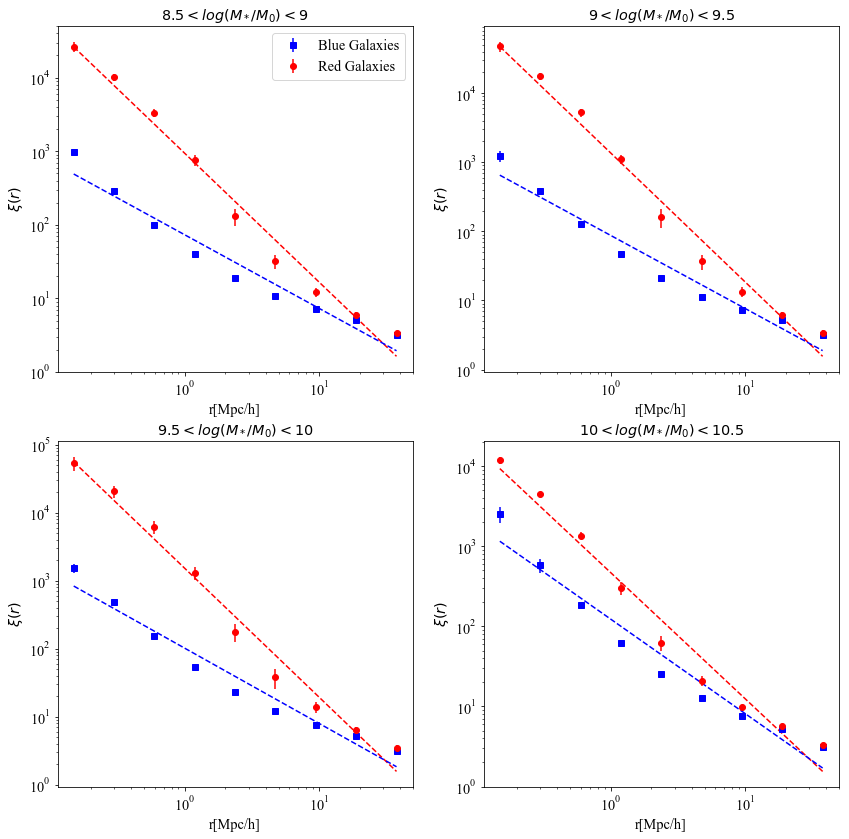

In [547]:
fig = plt.figure(figsize=(14,14))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)      
#ax = fig.add_subplot(231,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$8<log(M_*/M_0)<8.5$')
#ax.scatter(bincenters,corr_blue_8,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_8,'ro')

ax = fig.add_subplot(221,xlabel='r[Mpc/h]',ylabel ='$\\xi(r)$',title = '$8.5<log(M_*/M_0)<9$')
ax.errorbar(bincenters,corr_blue_8_5_mean,yerr=corr_blue_8_5_std,fmt='s',color = 'blue',label='Blue Galaxies')
ax.errorbar(bincenters,corr_red_8_5_mean,yerr=corr_red_8_5_std,fmt='o',color='red',label = 'Red Galaxies')
ax.plot(bincenters,xi_red_8_5,'--r')
ax.plot(bincenters,xi_blue_8_5,'--b')
ax.plot()
plt.legend(loc=0)
plt.yscale('log')
plt.xscale('log')
ax = fig.add_subplot(222,xlabel='r[Mpc/h]',ylabel = '$\\xi(r)$',title ='$9<log(M_*/M_0)<9.5$')
ax.errorbar(bincenters,corr_blue_9_mean,yerr=corr_blue_9_std,fmt='s',color = 'blue')
ax.errorbar(bincenters,corr_red_9_mean,yerr=corr_red_9_std,fmt='o',color='red')
ax.plot(bincenters,xi_red_9,'--r')
ax.plot(bincenters,xi_blue_9,'--b')
#plt.legend(loc='upper left')   

plt.yscale('log')
plt.xscale('log')
ax = fig.add_subplot(223,xlabel='r[Mpc/h]',ylabel = '$\\xi(r)$',title = '$9.5<log(M_*/M_0)<10$')
ax.errorbar(bincenters,corr_blue_9_5_mean,yerr=corr_blue_9_5_std,fmt='s',color = 'blue')
ax.errorbar(bincenters,corr_red_9_5_mean,yerr=corr_red_9_5_std,fmt='o',color='red')
ax.plot(bincenters,xi_red_9_5,'--r')
ax.plot(bincenters,xi_blue_9_5,'--b')
plt.yscale('log')
plt.xscale('log')
ax = fig.add_subplot(224,xlabel='r[Mpc/h]',ylabel ='$\\xi(r)$',title = '$10<log(M_*/M_0)<10.5$')
ax.errorbar(bincenters,corr_blue_10_mean,yerr=corr_blue_10_std,fmt='s',color = 'blue')
ax.errorbar(bincenters,corr_red_10_mean,yerr=corr_red_10_std,fmt='o',color='red')
ax.plot(bincenters,xi_red_10,'--r')
ax.plot(bincenters,xi_blue_10,'--b')
plt.yscale('log')
plt.xscale('log')
##ax = fig.add_subplot(236,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$10<log(M_*/M_0)<10.5$')
#ax.scatter(bincenters,corr_blue_10_5,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_10_5,'ro')

#plt.legend(loc=0)


#plt.savefig('color_mass_ranges.png')

In [544]:
from scipy import stats
s_red_8_5, int_red_8_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_8_5_mean))
s_blue_8_5, int_blue_8_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_8_5_mean))

s_red_9, int_red_9,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_9_mean))
s_blue_9, int_blue_9,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_9_mean))

s_red_9_5, int_red_9_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_9_5_mean))
s_blue_9_5, int_blue_9_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_9_5_mean))

s_red_10, int_red_10,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_10_mean))
s_blue_10, int_blue_10,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_10_mean))


In [545]:
gamma_red_8_5 = -s_red_8_5
gamma_blue_8_5 = -s_blue_8_5
r_red_8_5= 10**(int_red_8_5/gamma_red_8_5)
r_blue_8_5= 10**(int_blue_8_5/gamma_blue_8_5)


gamma_red_9 = -s_red_9
gamma_blue_9 = -s_blue_9
r_red_9= 10**(int_red_9/gamma_red_9)
r_blue_9= 10**(int_blue_9/gamma_blue_9)


gamma_red_9_5 = -s_red_9_5
gamma_blue_9_5 = -s_blue_9_5
r_red_9_5= 10**(int_red_9_5/gamma_red_9_5)
r_blue_9_5= 10**(int_blue_9_5/gamma_blue_9_5)

gamma_red_10= -s_red_10
gamma_blue_10 = -s_blue_10
r_red_10= 10**(int_red_10/gamma_red_10)
r_blue_10= 10**(int_blue_10/gamma_blue_10)

In [524]:
r_blue_8_5

66.99286014411996

In [546]:
xi_red_8_5 = (bincenters/r_red_8_5)**(-gamma_red_8_5)
xi_blue_8_5 = (bincenters/r_blue_8_5)**(-gamma_blue_8_5)

xi_red_9 = (bincenters/r_red_9)**(-gamma_red_9)
xi_blue_9 = (bincenters/r_blue_9)**(-gamma_blue_9)

xi_red_9_5 = (bincenters/r_red_9_5)**(-gamma_red_9_5)
xi_blue_9_5 = (bincenters/r_blue_9_5)**(-gamma_blue_9_5)

xi_red_10 = (bincenters/r_red_10)**(-gamma_red_10)
xi_blue_10 = (bincenters/r_blue_10)**(-gamma_blue_10)


In [548]:
r_blue_9

68.41594613423005

In [549]:
r_red_9

47.68965437727607

In [ ]:
gamma_red = -s_red
gamma_blue = -s_blue
gamma_all = -s_all

r_red = 10**(int_red/gamma_red)
r_blue =10**(int_blue/gamma_blue)
r_all =10**(int_all/gamma_all)

In [328]:
len(xyz_red_9_5)

19365

In [78]:
bins = np.logspace(-1,1.7,30)
bincenters = 0.5*(bins[1:]+bins[:-1])

In [79]:
bins

array([ 0.1       ,  0.12390917,  0.15353482,  0.19024373,  0.23572942,
        0.29209037,  0.36192676,  0.44846044,  0.55568361,  0.68854295,
        0.85316785,  1.05715321,  1.30990976,  1.62309832,  2.01116766,
        2.49202115,  3.08784273,  3.8261203 ,  4.74091391,  5.87442708,
        7.27895384,  9.0192913 , 11.175729  , 13.84775306, 17.15863589,
       21.26112334, 26.34448149, 32.64322838, 40.44795338, 50.11872336])

In [28]:
len(xyz_red_9)

25138

# 

In [ ]:
#jacknife



In [23]:
bins = np.logspace(-1,1.7,10)
bincenters = 0.5*(bins[1:]+bins[:-1])

In [24]:
import halotools.mock_observables

corr_red_9 =  halotools.mock_observables.tpcf(xyz_red_9, bins, period=205, estimator='Natural')
corr_blue_9 =   halotools.mock_observables.tpcf(xyz_blue_9, bins, period=205, estimator='Natural')


corr_red_9_5 =  halotools.mock_observables.tpcf(xyz_red_9_5, bins, period=205, estimator='Natural')
corr_blue_9_5 =   halotools.mock_observables.tpcf(xyz_blue_9_5, bins, period=205, estimator='Natural')


corr_red_10 =  halotools.mock_observables.tpcf(xyz_red_10, bins, period=205, estimator='Natural')
corr_blue_10 =   halotools.mock_observables.tpcf(xyz_blue_10, bins, period=205, estimator='Natural')


#corr_red_10_5 =  halotools.mock_observables.tpcf(xyz_red_10_5, bins, period=205, estimator='Natural')
#corr_blue_10_5 =   halotools.mock_observables.tpcf(xyz_blue_10_5, bins, period=205, estimator='Natural')

#corr_red_8 =  halotools.mock_observables.tpcf(xyz_red_8, bins, period=205, estimator='Natural')
#corr_blue_8 =   halotools.mock_observables.tpcf(xyz_blue_8, bins, period=205, estimator='Natural')

corr_red_8_5 =  halotools.mock_observables.tpcf(xyz_red_8_5, bins, period=205, estimator='Natural')
corr_blue_8_5 =   halotools.mock_observables.tpcf(xyz_blue_8_5, bins, period=205, estimator='Natural')

In [25]:
from scipy import stats
s_red_8_5, int_red_8_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_8_5))
s_blue_8_5, int_blue_8_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_8_5))

s_red_9, int_red_9,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_9))
s_blue_9, int_blue_9,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_9))

s_red_9_5, int_red_9_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_9_5))
s_blue_9_5, int_blue_9_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_9_5))

s_red_10, int_red_10,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_10))
s_blue_10, int_blue_10,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_10))


gamma_red_8_5 = -s_red_8_5
gamma_blue_8_5 = -s_blue_8_5
r_red_8_5= 10**(int_red_8_5/gamma_red_8_5)
r_blue_8_5= 10**(int_blue_8_5/gamma_blue_8_5)


gamma_red_9 = -s_red_9
gamma_blue_9 = -s_blue_9
r_red_9= 10**(int_red_9/gamma_red_9)
r_blue_9= 10**(int_blue_9/gamma_blue_9)


gamma_red_9_5 = -s_red_9_5
gamma_blue_9_5 = -s_blue_9_5
r_red_9_5= 10**(int_red_9_5/gamma_red_9_5)
r_blue_9_5= 10**(int_blue_9_5/gamma_blue_9_5)

gamma_red_10= -s_red_10
gamma_blue_10 = -s_blue_10
r_red_10= 10**(int_red_10/gamma_red_10)
r_blue_10= 10**(int_blue_10/gamma_blue_10)


xi_red_8_5 = (bincenters/r_red_8_5)**(-gamma_red_8_5)
xi_blue_8_5 = (bincenters/r_blue_8_5)**(-gamma_blue_8_5)

xi_red_9 = (bincenters/r_red_9)**(-gamma_red_9)
xi_blue_9 = (bincenters/r_blue_9)**(-gamma_blue_9)

xi_red_9_5 = (bincenters/r_red_9_5)**(-gamma_red_9_5)
xi_blue_9_5 = (bincenters/r_blue_9_5)**(-gamma_blue_9_5)

xi_red_10 = (bincenters/r_red_10)**(-gamma_red_10)
xi_blue_10 = (bincenters/r_blue_10)**(-gamma_blue_10)

In [26]:
r_blue_8_5

2.7578445198479793

In [27]:
r_red_8_5

9.257885332792831

In [28]:
r_red_8_5

9.257885332792831

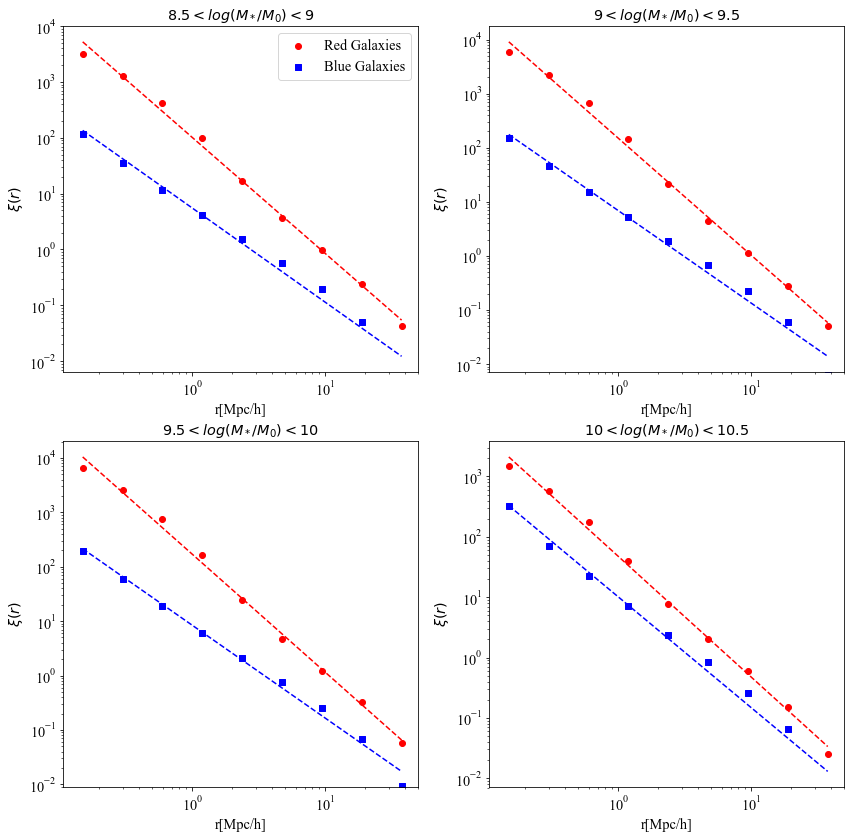

In [29]:
fig = plt.figure(figsize=(14,14))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)      
#ax = fig.add_subplot(231,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$8<log(M_*/M_0)<8.5$')
#ax.scatter(bincenters,corr_blue_8,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_8,'ro')

ax = fig.add_subplot(221,xlabel='r[Mpc/h]',ylabel ='$\\xi(r)$',title = '$8.5<log(M_*/M_0)<9$')
ax.scatter(bincenters,corr_red_8_5,marker = 'o',color = 'red',label='Red Galaxies')
ax.scatter(bincenters,corr_blue_8_5,marker = 's',color = 'blue',label='Blue Galaxies')
ax.plot(bincenters,xi_red_8_5,'--r')
ax.plot(bincenters,xi_blue_8_5,'--b')
ax.plot()
plt.legend(loc=0)
plt.yscale('log')
plt.xscale('log')
ax = fig.add_subplot(222,xlabel='r[Mpc/h]',ylabel = '$\\xi(r)$',title ='$9<log(M_*/M_0)<9.5$')
ax.scatter(bincenters,corr_red_9,marker = 'o',color = 'red')
ax.scatter(bincenters,corr_blue_9,marker = 's',color = 'blue')
ax.plot(bincenters,xi_red_9,'--r')
ax.plot(bincenters,xi_blue_9,'--b')
#plt.legend(loc='upper left')   

plt.yscale('log')
plt.xscale('log')
ax = fig.add_subplot(223,xlabel='r[Mpc/h]',ylabel = '$\\xi(r)$',title = '$9.5<log(M_*/M_0)<10$')
ax.scatter(bincenters,corr_red_9_5,marker = 'o',color = 'red')
ax.scatter(bincenters,corr_blue_9_5,marker = 's',color = 'blue')
ax.plot(bincenters,xi_red_9_5,'--r')
ax.plot(bincenters,xi_blue_9_5,'--b')
plt.yscale('log')
plt.xscale('log')
ax = fig.add_subplot(224,xlabel='r[Mpc/h]',ylabel ='$\\xi(r)$',title = '$10<log(M_*/M_0)<10.5$')
ax.scatter(bincenters,corr_red_10,marker = 'o',color = 'red')
ax.scatter(bincenters,corr_blue_10,marker = 's',color = 'blue')
ax.plot(bincenters,xi_red_10,'--r')
ax.plot(bincenters,xi_blue_10,'--b')
plt.yscale('log')
plt.xscale('log')
##ax = fig.add_subplot(236,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$10<log(M_*/M_0)<10.5$')
#ax.scatter(bincenters,corr_blue_10_5,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_10_5,'ro')

#plt.legend(loc=0)


#plt.savefig('color_mass_ranges_withouterror.png')

In [30]:
b_8_5 = (corr_red_8_5/corr_blue_8_5)**(0.5)

b_9 = (corr_red_9/corr_blue_9)**(0.5)

b_9_5 = (corr_red_9_5/corr_blue_9_5)**(0.5)

b_10  = (corr_red_10/corr_blue_10)**(0.5)

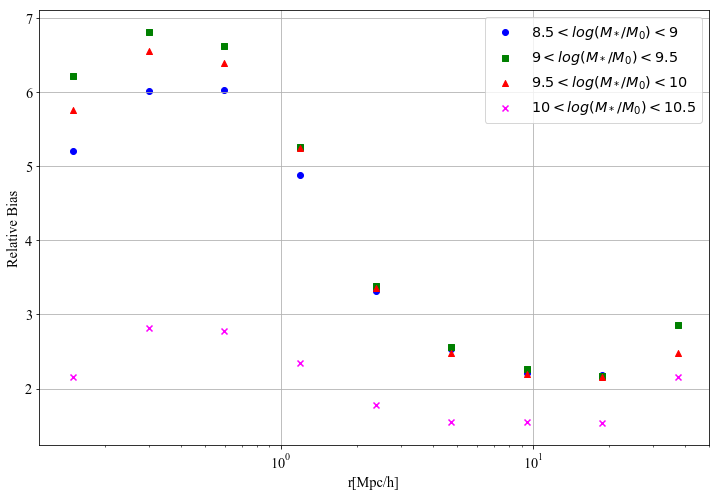

In [45]:
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)      
#ax = fig.add_subplot(231,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$8<log(M_*/M_0)<8.5$')
#ax.scatter(bincenters,corr_blue_8,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_8,'ro')


#ax.scatter(bincenters,corr_blue_8_5,marker = 's',color = 'blue',label='Blue Galaxies')
#ax.plot(bincenters,xi_red_8_5,'--r')
#ax.plot(bincenters,xi_blue_8_5,'--b')
ax.plot()

#plt.yscale('log')
#plt.xscale('log')
ax = fig.add_subplot(111,xlabel='r[Mpc/h]',ylabel = 'Relative Bias')
ax.scatter(bincenters,b_8_5,marker = 'o',color = 'blue',label = '$8.5<log(M_*/M_0)<9$')
ax.scatter(bincenters,b_9,marker = 's',color = 'green',label = '$9<log(M_*/M_0)<9.5$')
ax.scatter(bincenters,b_9_5,marker = '^',color = 'red',label = '$9.5<log(M_*/M_0)<10$')
ax.scatter(bincenters,b_10,marker = 'x',color = 'magenta',label = '$10<log(M_*/M_0)<10.5$')
plt.xscale('log')
#ax.scatter(bincenters,corr_blue_10,marker = 's',color = 'blue')
#ax.plot(bincenters,xi_red_10,'--r')
#ax.plot(bincenters,xi_blue_10,'--b')
#plt.yscale('log')
#plt.xscale('log')
##ax = fig.add_subplot(236,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$10<log(M_*/M_0)<10.5$')
#ax.scatter(bincenters,corr_blue_10_5,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_10_5,'ro')
plt.legend(loc=0)
plt.grid('on')
#plt.legend(loc=0)


plt.savefig('color_relative_bias.png')

In [43]:
print(r_red_8_5)
print(r_blue_8_5)
print('.......')
print(r_red_9)
print(r_blue_9)
print('........')
print(r_red_9_5)
print(r_blue_9_5)
print('........')
print(r_red_10)
print(r_blue_10)

9.634013255495315
3.019428388672986
.......
10.420195497434857
3.3725237963192214
........
10.959966466981303
3.7460613107854877
........
7.211815992161177
3.9180150795346163


In [41]:
len(xyz_blue_9_5)

48922

In [565]:
print(gamma_red_8_5)
print(gamma_blue_8_5)
print('.......')
print(gamma_red_9)
print(gamma_blue_9)
print('........')
print(gamma_red_9_5)
print(gamma_blue_9_5)
print('........')
print(gamma_red_10)
print(gamma_blue_10)

2.077051147850039
1.6860453181312012
.......
2.162910304167809
1.7090072301333668
........
2.168038190639863
1.705307335620189
........
1.9994469846972074
1.8349774418547047


In [564]:
import auto_correlation

ModuleNotFoundError: No module named 'Corrfunc'

In [329]:
len(xyz_blue_9)

66384

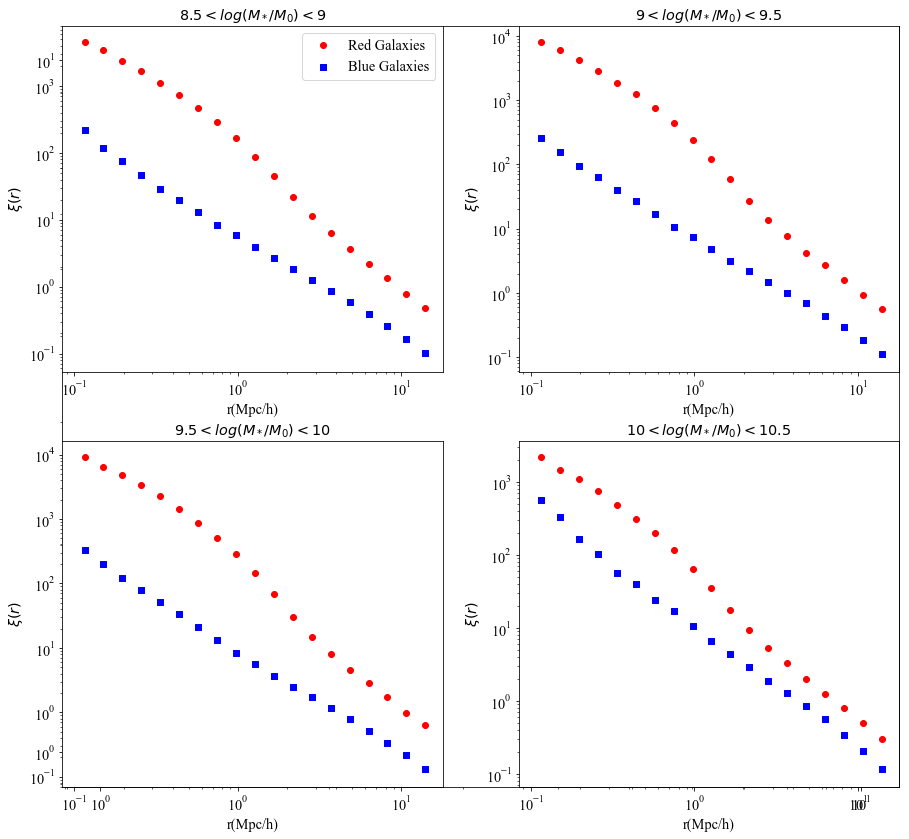

In [242]:
fig = plt.figure(figsize=(15,14))
params = {'legend.fontsize': 'x-large',
          
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)      
#ax = fig.add_subplot(231,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$8<log(M_*/M_0)<8.5$')
#ax.scatter(bincenters,corr_blue_8,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_8,'ro')
plt.yscale('log')
plt.xscale('log')
ax = fig.add_subplot(221,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$8.5<log(M_*/M_0)<9$')
ax.scatter(bincenters,corr_blue_8_5,color ='blue',marker = 's',label='Blue Galaxies')
ax.plot(bincenters,corr_red_8_5,'ro',label = 'Red Galaxies')
plt.legend(loc=0)
plt.yscale('log')
plt.xscale('log')
ax = fig.add_subplot(222,xlabel='r(Mpc/h)',ylabel = '$\\xi(r)$',title ='$9<log(M_*/M_0)<9.5$')
ax.scatter(bincenters,corr_blue_9,color ='blue',marker = 's',label='Blue Galaxies')
ax.plot(bincenters,corr_red_9,'ro',label = 'Red Galaxies')
#plt.legend(loc='upper left')   

plt.yscale('log')
plt.xscale('log')
ax = fig.add_subplot(223,xlabel='r(Mpc/h)',ylabel = '$\\xi(r)$',title = '$9.5<log(M_*/M_0)<10$')
ax.scatter(bincenters,corr_blue_9_5,color ='blue',marker = 's')
ax.plot(bincenters,corr_red_9_5,'ro')
plt.yscale('log')
plt.xscale('log')
ax = fig.add_subplot(224,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$10<log(M_*/M_0)<10.5$')
ax.scatter(bincenters,corr_blue_10,color ='blue',marker = 's')
ax.plot(bincenters,corr_red_10,'ro')
plt.yscale('log')
plt.xscale('log')
##ax = fig.add_subplot(236,xlabel='r(Mpc/h)',ylabel ='$\\xi(r)$',title = '$10<log(M_*/M_0)<10.5$')
#ax.scatter(bincenters,corr_blue_10_5,color ='blue',marker = 's')
#ax.plot(bincenters,corr_red_10_5,'ro')

#plt.legend(loc=0)


plt.savefig('color_dependence_clustering.png')

In [243]:
from scipy import stats
s_red_8_5, int_red_8_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_8_5))
s_blue_8_5, int_blue_8_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_8_5))

s_red_9, int_red_9,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_9))
s_blue_9, int_blue_9,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_9))

s_red_9_5, int_red_9_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_9_5))
s_blue_9_5, int_blue_9_5,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_9_5))

s_red_10, int_red_10,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red_10))
s_blue_10, int_blue_10,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue_10))


In [ ]:
gamma_red = -s_red
gamma_blue = -s_blue
gamma_all = -s_all

r_red = 10**(int_red/gamma_red)
r_blue =10**(int_blue/gamma_blue)
r_all =10**(int_all/gamma_all)

In [328]:
len(xyz_red_9_5)

19365

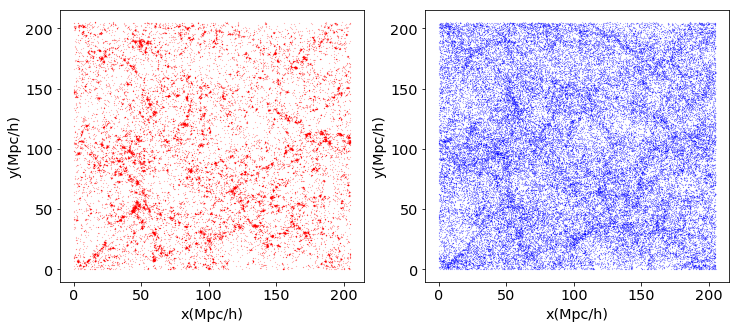

In [320]:
figure = plt.figure(figsize=(12,5))
ax = figure.add_subplot(121,xlabel='x(Mpc/h)',ylabel='y(Mpc/h)');
ax.scatter(xyz_red_9[:,0],xyz_red_9[:,1],s=0.01,color ='red');
ax = figure.add_subplot(122,xlabel='x(Mpc/h)',ylabel='y(Mpc/h)');
ax.scatter(xyz_blue_9[:,0],xyz_blue_9[:,1],s=0.01,color ='blue');
plt.savefig('2D-distribution.jpg')

# J function  9.5<log(M*/M0)<10

In [317]:
len(gal_red)

198858

In [22]:
gal_blue9 = gal_blue[(gal_blue['log_mass']<9.5)&(gal_blue['log_mass']>9)]

In [23]:
gal_red9 = gal_red[(gal_red['log_mass']<9.5)&(gal_red['log_mass']>9)]

In [24]:
gal_blue95 = gal_blue[(gal_blue['log_mass']<10)&(gal_blue['log_mass']>9.5)]

In [25]:
gal_red95 = gal_red[(gal_red['log_mass']<10)&(gal_red['log_mass']>9.5)]

In [26]:
gal_blue10 = gal_blue[(gal_blue['log_mass']<10.5)&(gal_blue['log_mass']>10)]

In [27]:
gal_red10 = gal_red[(gal_red['log_mass']<10.5)&(gal_red['log_mass']>10)]

In [206]:
len(gal_blue10)

18824

In [311]:
len(gal_red10)

30114

In [313]:
len(gal_red9)

25138

In [312]:
len(gal_blue9)

66384

In [315]:
len(gal_red95)

16769

In [314]:
len(gal_blue95)

48922

In [28]:
blue_1 = gal_blue9[(gal_blue9['x']/1000<102.5)&(gal_blue9['y']/1000<102.5)&(gal_blue9['z']/1000<102.5)]
blue_2 = gal_blue9[(gal_blue9['x']/1000<102.5)&(gal_blue9['y']/1000<102.5)&(gal_blue9['z']/1000>102.5)]
blue_3 = gal_blue9[(gal_blue9['x']/1000<102.5)&(gal_blue9['y']/1000>102.5)&(gal_blue9['z']/1000<102.5)]
blue_4 = gal_blue9[(gal_blue9['x']/1000>102.5)&(gal_blue9['y']/1000<102.5)&(gal_blue9['z']/1000<102.5)]
blue_5 = gal_blue9[(gal_blue9['x']/1000>102.5)&(gal_blue9['y']/1000>102.5)&(gal_blue9['z']/1000<102.5)]
blue_6 = gal_blue9[(gal_blue9['x']/1000>102.5)&(gal_blue9['y']/1000<102.5)&(gal_blue9['z']/1000>102.5)]
blue_7 = gal_blue9[(gal_blue9['x']/1000<102.5)&(gal_blue9['y']/1000>102.5)&(gal_blue9['z']/1000>102.5)]
blue_8 = gal_blue9[(gal_blue9['x']/1000>102.5)&(gal_blue9['y']/1000>102.5)&(gal_blue9['z']/1000>102.5)]

In [29]:
blue_1 = blue_1[['x','y','z']].values/1000
blue_2 = blue_2[['x','y','z']].values/1000
blue_3 = blue_3[['x','y','z']].values/1000
blue_4 = blue_4[['x','y','z']].values/1000
blue_5 = blue_5[['x','y','z']].values/1000
blue_6 = blue_6[['x','y','z']].values/1000
blue_7 = blue_7[['x','y','z']].values/1000
blue_8 = blue_8[['x','y','z']].values/1000

In [30]:
red_1 = gal_red9[(gal_red9['x']/1000<102.5)&(gal_red9['y']/1000<102.5)&(gal_red9['z']/1000<102.5)]
red_2 = gal_red9[(gal_red9['x']/1000<102.5)&(gal_red9['y']/1000<102.5)&(gal_red9['z']/1000>102.5)]
red_3 = gal_red9[(gal_red9['x']/1000<102.5)&(gal_red9['y']/1000>102.5)&(gal_red9['z']/1000<102.5)]
red_4 = gal_red9[(gal_red9['x']/1000>102.5)&(gal_red9['y']/1000<102.5)&(gal_red9['z']/1000<102.5)]
red_5 = gal_red9[(gal_red9['x']/1000>102.5)&(gal_red9['y']/1000>102.5)&(gal_red9['z']/1000<102.5)]
red_6 = gal_red9[(gal_red9['x']/1000>102.5)&(gal_red9['y']/1000<102.5)&(gal_red9['z']/1000>102.5)]
red_7 = gal_red9[(gal_red9['x']/1000<102.5)&(gal_red9['y']/1000>102.5)&(gal_red9['z']/1000>102.5)]
red_8 = gal_red9[(gal_red9['x']/1000>102.5)&(gal_red9['y']/1000>102.5)&(gal_red9['z']/1000>102.5)]

In [31]:
red_1 = red_1[['x','y','z']].values/1000
red_2 = red_2[['x','y','z']].values/1000
red_3 = red_3[['x','y','z']].values/1000
red_4 = red_4[['x','y','z']].values/1000
red_5 = red_5[['x','y','z']].values/1000
red_6 = red_6[['x','y','z']].values/1000
red_7 = red_7[['x','y','z']].values/1000
red_8 = red_8[['x','y','z']].values/1000

In [32]:
np.amax(red_1)

102.49857

In [33]:

xr = np.random.uniform(np.amin(blue_1[:,0]),np.amax(blue_1[:,0]),len(blue_1))
yr = np.random.uniform(np.amin(blue_1[:,1]),np.amax(blue_1[:,1]),len(blue_1))
zr = np.random.uniform(np.amin(blue_1[:,2]),np.amax(blue_1[:,2]),len(blue_1))
xyz_r = np.vstack((xr,yr,zr)).T
minb_1 = np.zeros(len(blue_1))
minrb_1 = np.zeros(len(blue_1))
for index,pos in enumerate(blue_1):
    dist = np.sqrt(np.sum((pos-blue_1)**2,axis=1))
    minb_1[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_1)**2,axis=1))
    minrb_1[index] = np.amin(dist)
   
        

In [34]:
%%time
xr = np.random.uniform(np.amin(blue_2[:,0]),np.amax(blue_2[:,0]),len(blue_2))
yr = np.random.uniform(np.amin(blue_2[:,1]),np.amax(blue_2[:,1]),len(blue_2))
zr = np.random.uniform(np.amin(blue_2[:,2]),np.amax(blue_2[:,2]),len(blue_2))
xyz_r = np.vstack((xr,yr,zr)).T
minb_2 = np.zeros(len(blue_2))
minrb_2 = np.zeros(len(blue_2))
for index,pos in enumerate(blue_2):
    dist = np.sqrt(np.sum((pos-blue_2)**2,axis=1))
    minb_2[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_2)**2,axis=1))
    minrb_2[index] = np.amin(dist)
   
        

Wall time: 2.1 s


In [35]:
%%time
xr = np.random.uniform(np.amin(blue_3[:,0]),np.amax(blue_3[:,0]),len(blue_3))
yr = np.random.uniform(np.amin(blue_3[:,1]),np.amax(blue_3[:,1]),len(blue_3))
zr = np.random.uniform(np.amin(blue_3[:,2]),np.amax(blue_3[:,2]),len(blue_3))
xyz_r = np.vstack((xr,yr,zr)).T
minb_3 = np.zeros(len(blue_3))
minrb_3 = np.zeros(len(blue_3))
for index,pos in enumerate(blue_3):
    dist = np.sqrt(np.sum((pos-blue_3)**2,axis=1))
    minb_3[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_3)**2,axis=1))
    minrb_3[index] = np.amin(dist)
   
        

Wall time: 1.82 s


In [36]:
%%time
xr = np.random.uniform(np.amin(blue_4[:,0]),np.amax(blue_4[:,0]),len(blue_4))
yr = np.random.uniform(np.amin(blue_4[:,1]),np.amax(blue_4[:,1]),len(blue_4))
zr = np.random.uniform(np.amin(blue_4[:,2]),np.amax(blue_4[:,2]),len(blue_4))
xyz_r = np.vstack((xr,yr,zr)).T
minb_4 = np.zeros(len(blue_4))
minrb_4 = np.zeros(len(blue_4))
for index,pos in enumerate(blue_4):
    dist = np.sqrt(np.sum((pos-blue_4)**2,axis=1))
    minb_4[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_4)**2,axis=1))
    minrb_4[index] = np.amin(dist)
   
        

Wall time: 2.38 s


In [37]:
%%time
xr = np.random.uniform(np.amin(blue_5[:,0]),np.amax(blue_5[:,0]),len(blue_5))
yr = np.random.uniform(np.amin(blue_5[:,1]),np.amax(blue_5[:,1]),len(blue_5))
zr = np.random.uniform(np.amin(blue_5[:,2]),np.amax(blue_5[:,2]),len(blue_5))
xyz_r = np.vstack((xr,yr,zr)).T
minb_5 = np.zeros(len(blue_5))
minrb_5 = np.zeros(len(blue_5))
for index,pos in enumerate(blue_5):
    dist = np.sqrt(np.sum((pos-blue_5)**2,axis=1))
    minb_5[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_5)**2,axis=1))
    minrb_5[index] = np.amin(dist)
   
        

Wall time: 2 s


In [38]:
%%time
xr = np.random.uniform(np.amin(blue_6[:,0]),np.amax(blue_6[:,0]),len(blue_6))
yr = np.random.uniform(np.amin(blue_6[:,1]),np.amax(blue_6[:,1]),len(blue_6))
zr = np.random.uniform(np.amin(blue_6[:,2]),np.amax(blue_6[:,2]),len(blue_6))
xyz_r = np.vstack((xr,yr,zr)).T
minb_6 = np.zeros(len(blue_6))
minrb_6 = np.zeros(len(blue_6))
for index,pos in enumerate(blue_6):
    dist = np.sqrt(np.sum((pos-blue_6)**2,axis=1))
    minb_6[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_6)**2,axis=1))
    minrb_6[index] = np.amin(dist)
   
        

Wall time: 1.83 s


In [39]:
%%time
xr = np.random.uniform(np.amin(blue_7[:,0]),np.amax(blue_7[:,0]),len(blue_7))
yr = np.random.uniform(np.amin(blue_7[:,1]),np.amax(blue_7[:,1]),len(blue_7))
zr = np.random.uniform(np.amin(blue_7[:,2]),np.amax(blue_7[:,2]),len(blue_7))
xyz_r = np.vstack((xr,yr,zr)).T
minb_7 = np.zeros(len(blue_7))
minrb_7 = np.zeros(len(blue_7))
for index,pos in enumerate(blue_7):
    dist = np.sqrt(np.sum((pos-blue_7)**2,axis=1))
    minb_7[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_7)**2,axis=1))
    minrb_7[index] = np.amin(dist)
   
        

Wall time: 1.69 s


In [40]:
%%time
xr = np.random.uniform(np.amin(blue_8[:,0]),np.amax(blue_8[:,0]),len(blue_8))
yr = np.random.uniform(np.amin(blue_8[:,1]),np.amax(blue_8[:,1]),len(blue_8))
zr = np.random.uniform(np.amin(blue_8[:,2]),np.amax(blue_8[:,2]),len(blue_8))
xyz_r = np.vstack((xr,yr,zr)).T
minb_8 = np.zeros(len(blue_8))
minrb_8 = np.zeros(len(blue_8))
for index,pos in enumerate(blue_8):
    dist = np.sqrt(np.sum((pos-blue_8)**2,axis=1))
    minb_8[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_8)**2,axis=1))
    minrb_8[index] = np.amin(dist)
   
        

Wall time: 2.16 s


In [41]:
bins = np.logspace(-2,1.2,101)

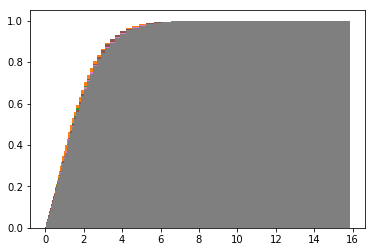

In [42]:
g1_blue,bins,_ = plt.hist(minb_1,bins,density=True,cumulative = True)
g2_blue,bins,_  = plt.hist(minb_2,bins,density=True,cumulative = True)
g3_blue,bins,_  = plt.hist(minb_3,bins,density=True,cumulative = True)
g4_blue,bins,_  = plt.hist(minb_4,bins,density=True,cumulative = True)
g5_blue,bins,_  = plt.hist(minb_5,bins,density=True,cumulative = True)
g6_blue,bins,_  = plt.hist(minb_6,bins,density=True,cumulative = True)
g7_blue,bins,_  = plt.hist(minb_7,bins,density=True,cumulative = True)
g8_blue,bins,_  = plt.hist(minb_8,bins,density=True,cumulative = True)

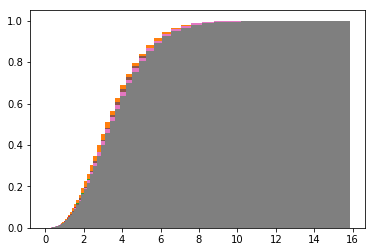

In [43]:
f1_blue,bins,_  = plt.hist(minrb_1,bins,density=True,cumulative = True)
f2_blue,bins,_  = plt.hist(minrb_2,bins,density=True,cumulative = True)
f3_blue,bins,_  = plt.hist(minrb_3,bins,density=True,cumulative = True)
f4_blue,bins,_  = plt.hist(minrb_4,bins,density=True,cumulative = True)
f5_blue,bins,_  = plt.hist(minrb_5,bins,density=True,cumulative = True)
f6_blue,bins,_  = plt.hist(minrb_6,bins,density=True,cumulative = True)
f7_blue,bins,_  = plt.hist(minrb_7,bins,density=True,cumulative = True)
f8_blue,bins,_  = plt.hist(minrb_8,bins,density=True,cumulative = True)

In [44]:
j1_blue = (np.ones(100)-g1_blue)/(np.ones(100)-f1_blue)
j2_blue = (np.ones(100)-g2_blue)/(np.ones(100)-f2_blue)
j3_blue = (np.ones(100)-g3_blue)/(np.ones(100)-f3_blue)
j4_blue = (np.ones(100)-g4_blue)/(np.ones(100)-f4_blue)
j5_blue = (np.ones(100)-g5_blue)/(np.ones(100)-f5_blue)
j6_blue = (np.ones(100)-g6_blue)/(np.ones(100)-f6_blue)
j7_blue = (np.ones(100)-g7_blue)/(np.ones(100)-f7_blue)
j8_blue = (np.ones(100)-g8_blue)/(np.ones(100)-f8_blue)

C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher

In [45]:
j_mean_blue_9 = np.mean((j1_blue,j2_blue,j3_blue,j4_blue,j5_blue,j6_blue,j7_blue,j8_blue),axis = 0)
j_std_blue_9 = np.std((j1_blue,j2_blue,j3_blue,j4_blue,j5_blue,j6_blue,j7_blue,j8_blue),axis = 0)

In [46]:
%%time
xr = np.random.uniform(np.amin(red_1[:,0]),np.amax(red_1[:,0]),len(red_1))
yr = np.random.uniform(np.amin(red_1[:,1]),np.amax(red_1[:,1]),len(red_1))
zr = np.random.uniform(np.amin(red_1[:,2]),np.amax(red_1[:,2]),len(red_1))
xyz_r = np.vstack((xr,yr,zr)).T
minb_1 = np.zeros(len(red_1))
minrb_1 = np.zeros(len(red_1))
for index,pos in enumerate(red_1):
    dist = np.sqrt(np.sum((pos-red_1)**2,axis=1))
    minb_1[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_1)**2,axis=1))
    minrb_1[index] = np.amin(dist)
   
        

Wall time: 449 ms


In [47]:
%%time
xr = np.random.uniform(np.amin(red_2[:,0]),np.amax(red_2[:,0]),len(red_2))
yr = np.random.uniform(np.amin(red_2[:,1]),np.amax(red_2[:,1]),len(red_2))
zr = np.random.uniform(np.amin(red_2[:,2]),np.amax(red_2[:,2]),len(red_2))
xyz_r = np.vstack((xr,yr,zr)).T
minb_2 = np.zeros(len(red_2))
minrb_2 = np.zeros(len(red_2))
for index,pos in enumerate(red_2):
    dist = np.sqrt(np.sum((pos-red_2)**2,axis=1))
    minb_2[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_2)**2,axis=1))
    minrb_2[index] = np.amin(dist)
   
        

Wall time: 773 ms


In [48]:
%%time
xr = np.random.uniform(np.amin(red_3[:,0]),np.amax(red_3[:,0]),len(red_3))
yr = np.random.uniform(np.amin(red_3[:,1]),np.amax(red_3[:,1]),len(red_3))
zr = np.random.uniform(np.amin(red_3[:,2]),np.amax(red_3[:,2]),len(red_3))
xyz_r = np.vstack((xr,yr,zr)).T
minb_3 = np.zeros(len(red_3))
minrb_3 = np.zeros(len(red_3))
for index,pos in enumerate(red_3):
    dist = np.sqrt(np.sum((pos-red_3)**2,axis=1))
    minb_3[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_3)**2,axis=1))
    minrb_3[index] = np.amin(dist)
   
        

Wall time: 563 ms


In [49]:
%%time
xr = np.random.uniform(np.amin(red_4[:,0]),np.amax(red_4[:,0]),len(red_4))
yr = np.random.uniform(np.amin(red_4[:,1]),np.amax(red_4[:,1]),len(red_4))
zr = np.random.uniform(np.amin(red_4[:,2]),np.amax(red_4[:,2]),len(red_4))
xyz_r = np.vstack((xr,yr,zr)).T
minb_4 = np.zeros(len(red_4))
minrb_4 = np.zeros(len(red_4))
for index,pos in enumerate(red_4):
    dist = np.sqrt(np.sum((pos-red_4)**2,axis=1))
    minb_4[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_4)**2,axis=1))
    minrb_4[index] = np.amin(dist)
   
        

Wall time: 451 ms


In [50]:
%%time
xr = np.random.uniform(np.amin(red_5[:,0]),np.amax(red_5[:,0]),len(red_5))
yr = np.random.uniform(np.amin(red_5[:,1]),np.amax(red_5[:,1]),len(red_5))
zr = np.random.uniform(np.amin(red_5[:,2]),np.amax(red_5[:,2]),len(red_5))
xyz_r = np.vstack((xr,yr,zr)).T
minb_5 = np.zeros(len(red_5))
minrb_5 = np.zeros(len(red_5))
for index,pos in enumerate(red_5):
    dist = np.sqrt(np.sum((pos-red_5)**2,axis=1))
    minb_5[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_5)**2,axis=1))
    minrb_5[index] = np.amin(dist)
   
        

Wall time: 276 ms


In [51]:
%%time
xr = np.random.uniform(np.amin(red_6[:,0]),np.amax(red_6[:,0]),len(red_6))
yr = np.random.uniform(np.amin(red_6[:,1]),np.amax(red_6[:,1]),len(red_6))
zr = np.random.uniform(np.amin(red_6[:,2]),np.amax(red_6[:,2]),len(red_6))
xyz_r = np.vstack((xr,yr,zr)).T
minb_6 = np.zeros(len(red_6))
minrb_6 = np.zeros(len(red_6))
for index,pos in enumerate(red_6):
    dist = np.sqrt(np.sum((pos-red_6)**2,axis=1))
    minb_6[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_6)**2,axis=1))
    minrb_6[index] = np.amin(dist)
   
        

Wall time: 549 ms


In [52]:
%%time
xr = np.random.uniform(np.amin(red_7[:,0]),np.amax(red_7[:,0]),len(red_7))
yr = np.random.uniform(np.amin(red_7[:,1]),np.amax(red_7[:,1]),len(red_7))
zr = np.random.uniform(np.amin(red_7[:,2]),np.amax(red_7[:,2]),len(red_7))
xyz_r = np.vstack((xr,yr,zr)).T
minb_7 = np.zeros(len(red_7))
minrb_7 = np.zeros(len(red_7))
for index,pos in enumerate(red_7):
    dist = np.sqrt(np.sum((pos-red_7)**2,axis=1))
    minb_7[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_7)**2,axis=1))
    minrb_7[index] = np.amin(dist)
   
        

Wall time: 428 ms


In [53]:
%%time
xr = np.random.uniform(np.amin(red_8[:,0]),np.amax(red_8[:,0]),len(red_8))
yr = np.random.uniform(np.amin(red_8[:,1]),np.amax(red_8[:,1]),len(red_8))
zr = np.random.uniform(np.amin(red_8[:,2]),np.amax(red_8[:,2]),len(red_8))
xyz_r = np.vstack((xr,yr,zr)).T
minb_8 = np.zeros(len(red_8))
minrb_8 = np.zeros(len(red_8))
for index,pos in enumerate(red_8):
    dist = np.sqrt(np.sum((pos-red_8)**2,axis=1))
    minb_8[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_8)**2,axis=1))
    minrb_8[index] = np.amin(dist)
   
        

Wall time: 421 ms


In [54]:
bins = np.logspace(-2,1.2,101)

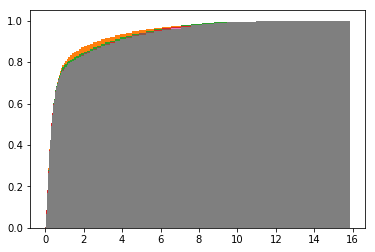

In [55]:
g1_red,bins,_ = plt.hist(minb_1,bins,density=True,cumulative = True)
g2_red,bins,_  = plt.hist(minb_2,bins,density=True,cumulative = True)
g3_red,bins,_  = plt.hist(minb_3,bins,density=True,cumulative = True)
g4_red,bins,_  = plt.hist(minb_4,bins,density=True,cumulative = True)
g5_red,bins,_  = plt.hist(minb_5,bins,density=True,cumulative = True)
g6_red,bins,_  = plt.hist(minb_6,bins,density=True,cumulative = True)
g7_red,bins,_  = plt.hist(minb_7,bins,density=True,cumulative = True)
g8_red,bins,_  = plt.hist(minb_8,bins,density=True,cumulative = True)

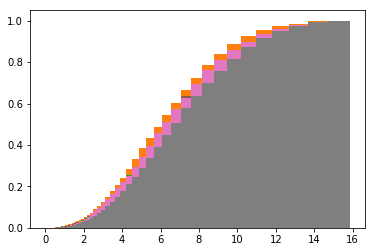

In [56]:
f1_red,bins,_  = plt.hist(minrb_1,bins,density=True,cumulative = True)
f2_red,bins,_  = plt.hist(minrb_2,bins,density=True,cumulative = True)
f3_red,bins,_  = plt.hist(minrb_3,bins,density=True,cumulative = True)
f4_red,bins,_  = plt.hist(minrb_4,bins,density=True,cumulative = True)
f5_red,bins,_  = plt.hist(minrb_5,bins,density=True,cumulative = True)
f6_red,bins,_  = plt.hist(minrb_6,bins,density=True,cumulative = True)
f7_red,bins,_  = plt.hist(minrb_7,bins,density=True,cumulative = True)
f8_red,bins,_  = plt.hist(minrb_8,bins,density=True,cumulative = True)

In [57]:
j1_red = (np.ones(100)-g1_red)/(np.ones(100)-f1_red)
j2_red = (np.ones(100)-g2_red)/(np.ones(100)-f2_red)
j3_red = (np.ones(100)-g3_red)/(np.ones(100)-f3_red)
j4_red = (np.ones(100)-g4_red)/(np.ones(100)-f4_red)
j5_red = (np.ones(100)-g5_red)/(np.ones(100)-f5_red)
j6_red = (np.ones(100)-g6_red)/(np.ones(100)-f6_red)
j7_red = (np.ones(100)-g7_red)/(np.ones(100)-f7_red)
j8_red = (np.ones(100)-g8_red)/(np.ones(100)-f8_red)

C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


In [58]:
j_mean_red_9 = np.mean((j1_red,j2_red,j3_red,j4_red,j5_red,j6_red,j7_red,j8_red),axis = 0)
j_std_red_9 = np.std((j1_red,j2_red,j3_red,j4_red,j5_red,j6_red,j7_red,j8_red),axis = 0)

In [59]:
j_mean_red

NameError: name 'j_mean_red' is not defined

In [ ]:
blue_1 = gal_blue95[(gal_blue95['x']/1000<102.5)&(gal_blue95['y']/1000<102.5)&(gal_blue95['z']/1000<102.5)]
blue_2 = gal_blue95[(gal_blue95['x']/1000<102.5)&(gal_blue95['y']/1000<102.5)&(gal_blue95['z']/1000>102.5)]
blue_3 = gal_blue95[(gal_blue95['x']/1000<102.5)&(gal_blue95['y']/1000>102.5)&(gal_blue95['z']/1000<102.5)]
blue_4 = gal_blue95[(gal_blue95['x']/1000>102.5)&(gal_blue95['y']/1000<102.5)&(gal_blue95['z']/1000<102.5)]
blue_5 = gal_blue95[(gal_blue95['x']/1000>102.5)&(gal_blue95['y']/1000>102.5)&(gal_blue95['z']/1000<102.5)]
blue_6 = gal_blue95[(gal_blue95['x']/1000>102.5)&(gal_blue95['y']/1000<102.5)&(gal_blue95['z']/1000>102.5)]
blue_7 = gal_blue95[(gal_blue95['x']/1000<102.5)&(gal_blue95['y']/1000>102.5)&(gal_blue95['z']/1000>102.5)]
blue_8 = gal_blue95[(gal_blue95['x']/1000>102.5)&(gal_blue95['y']/1000>102.5)&(gal_blue95['z']/1000>102.5)]

In [ ]:
blue_1 = blue_1[['x','y','z']].values/1000
blue_2 = blue_2[['x','y','z']].values/1000
blue_3 = blue_3[['x','y','z']].values/1000
blue_4 = blue_4[['x','y','z']].values/1000
blue_5 = blue_5[['x','y','z']].values/1000
blue_6 = blue_6[['x','y','z']].values/1000
blue_7 = blue_7[['x','y','z']].values/1000
blue_8 = blue_8[['x','y','z']].values/1000

In [ ]:
red_1 = gal_red95[(gal_red95['x']/1000<102.5)&(gal_red95['y']/1000<102.5)&(gal_red95['z']/1000<102.5)]
red_2 = gal_red95[(gal_red95['x']/1000<102.5)&(gal_red95['y']/1000<102.5)&(gal_red95['z']/1000>102.5)]
red_3 = gal_red95[(gal_red95['x']/1000<102.5)&(gal_red95['y']/1000>102.5)&(gal_red95['z']/1000<102.5)]
red_4 = gal_red95[(gal_red95['x']/1000>102.5)&(gal_red95['y']/1000<102.5)&(gal_red95['z']/1000<102.5)]
red_5 = gal_red95[(gal_red95['x']/1000>102.5)&(gal_red95['y']/1000>102.5)&(gal_red95['z']/1000<102.5)]
red_6 = gal_red95[(gal_red95['x']/1000>102.5)&(gal_red95['y']/1000<102.5)&(gal_red95['z']/1000>102.5)]
red_7 = gal_red95[(gal_red95['x']/1000<102.5)&(gal_red95['y']/1000>102.5)&(gal_red95['z']/1000>102.5)]
red_8 = gal_red95[(gal_red95['x']/1000>102.5)&(gal_red95['y']/1000>102.5)&(gal_red95['z']/1000>102.5)]

In [ ]:
red_1 = red_1[['x','y','z']].values/1000
red_2 = red_2[['x','y','z']].values/1000
red_3 = red_3[['x','y','z']].values/1000
red_4 = red_4[['x','y','z']].values/1000
red_5 = red_5[['x','y','z']].values/1000
red_6 = red_6[['x','y','z']].values/1000
red_7 = red_7[['x','y','z']].values/1000
red_8 = red_8[['x','y','z']].values/1000

In [ ]:
np.amax(red_1)

In [60]:

xr = np.random.uniform(np.amin(blue_1[:,0]),np.amax(blue_1[:,0]),len(blue_1))
yr = np.random.uniform(np.amin(blue_1[:,1]),np.amax(blue_1[:,1]),len(blue_1))
zr = np.random.uniform(np.amin(blue_1[:,2]),np.amax(blue_1[:,2]),len(blue_1))
xyz_r = np.vstack((xr,yr,zr)).T
minb_1 = np.zeros(len(blue_1))
minrb_1 = np.zeros(len(blue_1))
for index,pos in enumerate(blue_1):
    dist = np.sqrt(np.sum((pos-blue_1)**2,axis=1))
    minb_1[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_1)**2,axis=1))
    minrb_1[index] = np.amin(dist)
   
        

In [61]:
%%time
xr = np.random.uniform(np.amin(blue_2[:,0]),np.amax(blue_2[:,0]),len(blue_2))
yr = np.random.uniform(np.amin(blue_2[:,1]),np.amax(blue_2[:,1]),len(blue_2))
zr = np.random.uniform(np.amin(blue_2[:,2]),np.amax(blue_2[:,2]),len(blue_2))
xyz_r = np.vstack((xr,yr,zr)).T
minb_2 = np.zeros(len(blue_2))
minrb_2 = np.zeros(len(blue_2))
for index,pos in enumerate(blue_2):
    dist = np.sqrt(np.sum((pos-blue_2)**2,axis=1))
    minb_2[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_2)**2,axis=1))
    minrb_2[index] = np.amin(dist)
   
        

Wall time: 2.33 s


In [62]:
%%time
xr = np.random.uniform(np.amin(blue_3[:,0]),np.amax(blue_3[:,0]),len(blue_3))
yr = np.random.uniform(np.amin(blue_3[:,1]),np.amax(blue_3[:,1]),len(blue_3))
zr = np.random.uniform(np.amin(blue_3[:,2]),np.amax(blue_3[:,2]),len(blue_3))
xyz_r = np.vstack((xr,yr,zr)).T
minb_3 = np.zeros(len(blue_3))
minrb_3 = np.zeros(len(blue_3))
for index,pos in enumerate(blue_3):
    dist = np.sqrt(np.sum((pos-blue_3)**2,axis=1))
    minb_3[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_3)**2,axis=1))
    minrb_3[index] = np.amin(dist)
   
        

Wall time: 1.74 s


In [63]:
%%time
xr = np.random.uniform(np.amin(blue_4[:,0]),np.amax(blue_4[:,0]),len(blue_4))
yr = np.random.uniform(np.amin(blue_4[:,1]),np.amax(blue_4[:,1]),len(blue_4))
zr = np.random.uniform(np.amin(blue_4[:,2]),np.amax(blue_4[:,2]),len(blue_4))
xyz_r = np.vstack((xr,yr,zr)).T
minb_4 = np.zeros(len(blue_4))
minrb_4 = np.zeros(len(blue_4))
for index,pos in enumerate(blue_4):
    dist = np.sqrt(np.sum((pos-blue_4)**2,axis=1))
    minb_4[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_4)**2,axis=1))
    minrb_4[index] = np.amin(dist)
   
        

Wall time: 2.4 s


In [64]:
%%time
xr = np.random.uniform(np.amin(blue_5[:,0]),np.amax(blue_5[:,0]),len(blue_5))
yr = np.random.uniform(np.amin(blue_5[:,1]),np.amax(blue_5[:,1]),len(blue_5))
zr = np.random.uniform(np.amin(blue_5[:,2]),np.amax(blue_5[:,2]),len(blue_5))
xyz_r = np.vstack((xr,yr,zr)).T
minb_5 = np.zeros(len(blue_5))
minrb_5 = np.zeros(len(blue_5))
for index,pos in enumerate(blue_5):
    dist = np.sqrt(np.sum((pos-blue_5)**2,axis=1))
    minb_5[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_5)**2,axis=1))
    minrb_5[index] = np.amin(dist)
   
        

Wall time: 1.95 s


In [65]:
%%time
xr = np.random.uniform(np.amin(blue_6[:,0]),np.amax(blue_6[:,0]),len(blue_6))
yr = np.random.uniform(np.amin(blue_6[:,1]),np.amax(blue_6[:,1]),len(blue_6))
zr = np.random.uniform(np.amin(blue_6[:,2]),np.amax(blue_6[:,2]),len(blue_6))
xyz_r = np.vstack((xr,yr,zr)).T
minb_6 = np.zeros(len(blue_6))
minrb_6 = np.zeros(len(blue_6))
for index,pos in enumerate(blue_6):
    dist = np.sqrt(np.sum((pos-blue_6)**2,axis=1))
    minb_6[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_6)**2,axis=1))
    minrb_6[index] = np.amin(dist)
   
        

Wall time: 1.98 s


In [66]:
%%time
xr = np.random.uniform(np.amin(blue_7[:,0]),np.amax(blue_7[:,0]),len(blue_7))
yr = np.random.uniform(np.amin(blue_7[:,1]),np.amax(blue_7[:,1]),len(blue_7))
zr = np.random.uniform(np.amin(blue_7[:,2]),np.amax(blue_7[:,2]),len(blue_7))
xyz_r = np.vstack((xr,yr,zr)).T
minb_7 = np.zeros(len(blue_7))
minrb_7 = np.zeros(len(blue_7))
for index,pos in enumerate(blue_7):
    dist = np.sqrt(np.sum((pos-blue_7)**2,axis=1))
    minb_7[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_7)**2,axis=1))
    minrb_7[index] = np.amin(dist)
   
        

Wall time: 1.84 s


In [67]:
%%time
xr = np.random.uniform(np.amin(blue_8[:,0]),np.amax(blue_8[:,0]),len(blue_8))
yr = np.random.uniform(np.amin(blue_8[:,1]),np.amax(blue_8[:,1]),len(blue_8))
zr = np.random.uniform(np.amin(blue_8[:,2]),np.amax(blue_8[:,2]),len(blue_8))
xyz_r = np.vstack((xr,yr,zr)).T
minb_8 = np.zeros(len(blue_8))
minrb_8 = np.zeros(len(blue_8))
for index,pos in enumerate(blue_8):
    dist = np.sqrt(np.sum((pos-blue_8)**2,axis=1))
    minb_8[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_8)**2,axis=1))
    minrb_8[index] = np.amin(dist)
   
        

Wall time: 2.2 s


In [68]:
bins = np.logspace(-2,1.2,101)

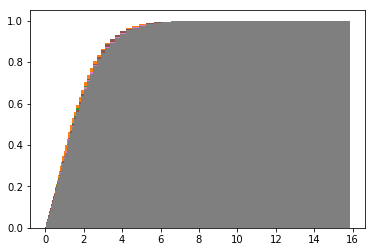

In [69]:
g1_blue,bins,_ = plt.hist(minb_1,bins,density=True,cumulative = True)
g2_blue,bins,_  = plt.hist(minb_2,bins,density=True,cumulative = True)
g3_blue,bins,_  = plt.hist(minb_3,bins,density=True,cumulative = True)
g4_blue,bins,_  = plt.hist(minb_4,bins,density=True,cumulative = True)
g5_blue,bins,_  = plt.hist(minb_5,bins,density=True,cumulative = True)
g6_blue,bins,_  = plt.hist(minb_6,bins,density=True,cumulative = True)
g7_blue,bins,_  = plt.hist(minb_7,bins,density=True,cumulative = True)
g8_blue,bins,_  = plt.hist(minb_8,bins,density=True,cumulative = True)

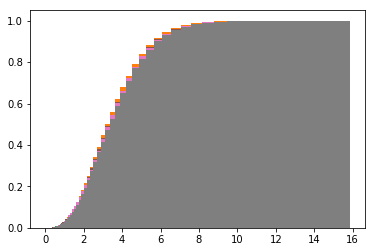

In [70]:
f1_blue,bins,_  = plt.hist(minrb_1,bins,density=True,cumulative = True)
f2_blue,bins,_  = plt.hist(minrb_2,bins,density=True,cumulative = True)
f3_blue,bins,_  = plt.hist(minrb_3,bins,density=True,cumulative = True)
f4_blue,bins,_  = plt.hist(minrb_4,bins,density=True,cumulative = True)
f5_blue,bins,_  = plt.hist(minrb_5,bins,density=True,cumulative = True)
f6_blue,bins,_  = plt.hist(minrb_6,bins,density=True,cumulative = True)
f7_blue,bins,_  = plt.hist(minrb_7,bins,density=True,cumulative = True)
f8_blue,bins,_  = plt.hist(minrb_8,bins,density=True,cumulative = True)

In [71]:
j1_blue = (np.ones(100)-g1_blue)/(np.ones(100)-f1_blue)
j2_blue = (np.ones(100)-g2_blue)/(np.ones(100)-f2_blue)
j3_blue = (np.ones(100)-g3_blue)/(np.ones(100)-f3_blue)
j4_blue = (np.ones(100)-g4_blue)/(np.ones(100)-f4_blue)
j5_blue = (np.ones(100)-g5_blue)/(np.ones(100)-f5_blue)
j6_blue = (np.ones(100)-g6_blue)/(np.ones(100)-f6_blue)
j7_blue = (np.ones(100)-g7_blue)/(np.ones(100)-f7_blue)
j8_blue = (np.ones(100)-g8_blue)/(np.ones(100)-f8_blue)

C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [72]:
j_mean_blue_95 = np.mean((j1_blue,j2_blue,j3_blue,j4_blue,j5_blue,j6_blue,j7_blue,j8_blue),axis = 0)
j_std_blue_95 = np.std((j1_blue,j2_blue,j3_blue,j4_blue,j5_blue,j6_blue,j7_blue,j8_blue),axis = 0)

C:\Users\zahra\Anaconda3\lib\site-packages\numpy\core\_methods.py:75: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\zahra\Anaconda3\lib\site-packages\numpy\core\_methods.py:107: RuntimeWarning: invalid value encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
C:\Users\zahra\Anaconda3\lib\site-packages\numpy\core\_methods.py:117: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [73]:
%%time
xr = np.random.uniform(np.amin(red_1[:,0]),np.amax(red_1[:,0]),len(red_1))
yr = np.random.uniform(np.amin(red_1[:,1]),np.amax(red_1[:,1]),len(red_1))
zr = np.random.uniform(np.amin(red_1[:,2]),np.amax(red_1[:,2]),len(red_1))
xyz_r = np.vstack((xr,yr,zr)).T
minb_1 = np.zeros(len(red_1))
minrb_1 = np.zeros(len(red_1))
for index,pos in enumerate(red_1):
    dist = np.sqrt(np.sum((pos-red_1)**2,axis=1))
    minb_1[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_1)**2,axis=1))
    minrb_1[index] = np.amin(dist)
   
        

Wall time: 375 ms


In [74]:
%%time
xr = np.random.uniform(np.amin(red_2[:,0]),np.amax(red_2[:,0]),len(red_2))
yr = np.random.uniform(np.amin(red_2[:,1]),np.amax(red_2[:,1]),len(red_2))
zr = np.random.uniform(np.amin(red_2[:,2]),np.amax(red_2[:,2]),len(red_2))
xyz_r = np.vstack((xr,yr,zr)).T
minb_2 = np.zeros(len(red_2))
minrb_2 = np.zeros(len(red_2))
for index,pos in enumerate(red_2):
    dist = np.sqrt(np.sum((pos-red_2)**2,axis=1))
    minb_2[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_2)**2,axis=1))
    minrb_2[index] = np.amin(dist)
   
        

Wall time: 824 ms


In [75]:
%%time
xr = np.random.uniform(np.amin(red_3[:,0]),np.amax(red_3[:,0]),len(red_3))
yr = np.random.uniform(np.amin(red_3[:,1]),np.amax(red_3[:,1]),len(red_3))
zr = np.random.uniform(np.amin(red_3[:,2]),np.amax(red_3[:,2]),len(red_3))
xyz_r = np.vstack((xr,yr,zr)).T
minb_3 = np.zeros(len(red_3))
minrb_3 = np.zeros(len(red_3))
for index,pos in enumerate(red_3):
    dist = np.sqrt(np.sum((pos-red_3)**2,axis=1))
    minb_3[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_3)**2,axis=1))
    minrb_3[index] = np.amin(dist)
   
        

Wall time: 569 ms


In [76]:
%%time
xr = np.random.uniform(np.amin(red_4[:,0]),np.amax(red_4[:,0]),len(red_4))
yr = np.random.uniform(np.amin(red_4[:,1]),np.amax(red_4[:,1]),len(red_4))
zr = np.random.uniform(np.amin(red_4[:,2]),np.amax(red_4[:,2]),len(red_4))
xyz_r = np.vstack((xr,yr,zr)).T
minb_4 = np.zeros(len(red_4))
minrb_4 = np.zeros(len(red_4))
for index,pos in enumerate(red_4):
    dist = np.sqrt(np.sum((pos-red_4)**2,axis=1))
    minb_4[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_4)**2,axis=1))
    minrb_4[index] = np.amin(dist)
   
        

Wall time: 509 ms


In [77]:
%%time
xr = np.random.uniform(np.amin(red_5[:,0]),np.amax(red_5[:,0]),len(red_5))
yr = np.random.uniform(np.amin(red_5[:,1]),np.amax(red_5[:,1]),len(red_5))
zr = np.random.uniform(np.amin(red_5[:,2]),np.amax(red_5[:,2]),len(red_5))
xyz_r = np.vstack((xr,yr,zr)).T
minb_5 = np.zeros(len(red_5))
minrb_5 = np.zeros(len(red_5))
for index,pos in enumerate(red_5):
    dist = np.sqrt(np.sum((pos-red_5)**2,axis=1))
    minb_5[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_5)**2,axis=1))
    minrb_5[index] = np.amin(dist)
   
        

Wall time: 269 ms


In [78]:
%%time
xr = np.random.uniform(np.amin(red_6[:,0]),np.amax(red_6[:,0]),len(red_6))
yr = np.random.uniform(np.amin(red_6[:,1]),np.amax(red_6[:,1]),len(red_6))
zr = np.random.uniform(np.amin(red_6[:,2]),np.amax(red_6[:,2]),len(red_6))
xyz_r = np.vstack((xr,yr,zr)).T
minb_6 = np.zeros(len(red_6))
minrb_6 = np.zeros(len(red_6))
for index,pos in enumerate(red_6):
    dist = np.sqrt(np.sum((pos-red_6)**2,axis=1))
    minb_6[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_6)**2,axis=1))
    minrb_6[index] = np.amin(dist)
   
        

Wall time: 527 ms


In [79]:
%%time
xr = np.random.uniform(np.amin(red_7[:,0]),np.amax(red_7[:,0]),len(red_7))
yr = np.random.uniform(np.amin(red_7[:,1]),np.amax(red_7[:,1]),len(red_7))
zr = np.random.uniform(np.amin(red_7[:,2]),np.amax(red_7[:,2]),len(red_7))
xyz_r = np.vstack((xr,yr,zr)).T
minb_7 = np.zeros(len(red_7))
minrb_7 = np.zeros(len(red_7))
for index,pos in enumerate(red_7):
    dist = np.sqrt(np.sum((pos-red_7)**2,axis=1))
    minb_7[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_7)**2,axis=1))
    minrb_7[index] = np.amin(dist)
   
        

Wall time: 455 ms


In [80]:
%%time
xr = np.random.uniform(np.amin(red_8[:,0]),np.amax(red_8[:,0]),len(red_8))
yr = np.random.uniform(np.amin(red_8[:,1]),np.amax(red_8[:,1]),len(red_8))
zr = np.random.uniform(np.amin(red_8[:,2]),np.amax(red_8[:,2]),len(red_8))
xyz_r = np.vstack((xr,yr,zr)).T
minb_8 = np.zeros(len(red_8))
minrb_8 = np.zeros(len(red_8))
for index,pos in enumerate(red_8):
    dist = np.sqrt(np.sum((pos-red_8)**2,axis=1))
    minb_8[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_8)**2,axis=1))
    minrb_8[index] = np.amin(dist)
   
        

Wall time: 389 ms


In [81]:
bins = np.logspace(-2,1.2,101)

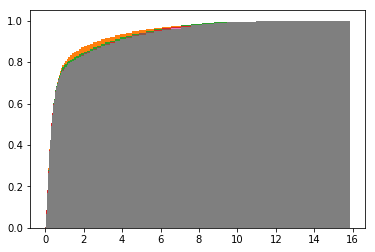

In [82]:
g1_red,bins,_ = plt.hist(minb_1,bins,density=True,cumulative = True)
g2_red,bins,_  = plt.hist(minb_2,bins,density=True,cumulative = True)
g3_red,bins,_  = plt.hist(minb_3,bins,density=True,cumulative = True)
g4_red,bins,_  = plt.hist(minb_4,bins,density=True,cumulative = True)
g5_red,bins,_  = plt.hist(minb_5,bins,density=True,cumulative = True)
g6_red,bins,_  = plt.hist(minb_6,bins,density=True,cumulative = True)
g7_red,bins,_  = plt.hist(minb_7,bins,density=True,cumulative = True)
g8_red,bins,_  = plt.hist(minb_8,bins,density=True,cumulative = True)

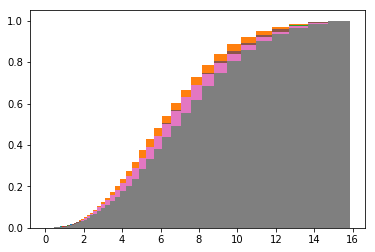

In [83]:
f1_red,bins,_  = plt.hist(minrb_1,bins,density=True,cumulative = True)
f2_red,bins,_  = plt.hist(minrb_2,bins,density=True,cumulative = True)
f3_red,bins,_  = plt.hist(minrb_3,bins,density=True,cumulative = True)
f4_red,bins,_  = plt.hist(minrb_4,bins,density=True,cumulative = True)
f5_red,bins,_  = plt.hist(minrb_5,bins,density=True,cumulative = True)
f6_red,bins,_  = plt.hist(minrb_6,bins,density=True,cumulative = True)
f7_red,bins,_  = plt.hist(minrb_7,bins,density=True,cumulative = True)
f8_red,bins,_  = plt.hist(minrb_8,bins,density=True,cumulative = True)

In [84]:
j1_red = (np.ones(100)-g1_red)/(np.ones(100)-f1_red)
j2_red = (np.ones(100)-g2_red)/(np.ones(100)-f2_red)
j3_red = (np.ones(100)-g3_red)/(np.ones(100)-f3_red)
j4_red = (np.ones(100)-g4_red)/(np.ones(100)-f4_red)
j5_red = (np.ones(100)-g5_red)/(np.ones(100)-f5_red)
j6_red = (np.ones(100)-g6_red)/(np.ones(100)-f6_red)
j7_red = (np.ones(100)-g7_red)/(np.ones(100)-f7_red)
j8_red = (np.ones(100)-g8_red)/(np.ones(100)-f8_red)

C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [85]:
j_mean_red_95 = np.mean((j1_red,j2_red,j3_red,j4_red,j5_red,j6_red,j7_red,j8_red),axis = 0)
j_std_red_95 = np.std((j1_red,j2_red,j3_red,j4_red,j5_red,j6_red,j7_red,j8_red),axis = 0)

In [86]:
blue_1 = gal_blue10[(gal_blue10['x']/1000<102.5)&(gal_blue10['y']/1000<102.5)&(gal_blue10['z']/1000<102.5)]
blue_2 = gal_blue10[(gal_blue10['x']/1000<102.5)&(gal_blue10['y']/1000<102.5)&(gal_blue10['z']/1000>102.5)]
blue_3 = gal_blue10[(gal_blue10['x']/1000<102.5)&(gal_blue10['y']/1000>102.5)&(gal_blue10['z']/1000<102.5)]
blue_4 = gal_blue10[(gal_blue10['x']/1000>102.5)&(gal_blue10['y']/1000<102.5)&(gal_blue10['z']/1000<102.5)]
blue_5 = gal_blue10[(gal_blue10['x']/1000>102.5)&(gal_blue10['y']/1000>102.5)&(gal_blue10['z']/1000<102.5)]
blue_6 = gal_blue10[(gal_blue10['x']/1000>102.5)&(gal_blue10['y']/1000<102.5)&(gal_blue10['z']/1000>102.5)]
blue_7 = gal_blue10[(gal_blue10['x']/1000<102.5)&(gal_blue10['y']/1000>102.5)&(gal_blue10['z']/1000>102.5)]
blue_8 = gal_blue10[(gal_blue10['x']/1000>102.5)&(gal_blue10['y']/1000>102.5)&(gal_blue10['z']/1000>102.5)]

In [87]:
blue_1 = blue_1[['x','y','z']].values/1000
blue_2 = blue_2[['x','y','z']].values/1000
blue_3 = blue_3[['x','y','z']].values/1000
blue_4 = blue_4[['x','y','z']].values/1000
blue_5 = blue_5[['x','y','z']].values/1000
blue_6 = blue_6[['x','y','z']].values/1000
blue_7 = blue_7[['x','y','z']].values/1000
blue_8 = blue_8[['x','y','z']].values/1000

In [88]:
red_1 = gal_red10[(gal_red10['x']/1000<102.5)&(gal_red10['y']/1000<102.5)&(gal_red10['z']/1000<102.5)]
red_2 = gal_red10[(gal_red10['x']/1000<102.5)&(gal_red10['y']/1000<102.5)&(gal_red10['z']/1000>102.5)]
red_3 = gal_red10[(gal_red10['x']/1000<102.5)&(gal_red10['y']/1000>102.5)&(gal_red10['z']/1000<102.5)]
red_4 = gal_red10[(gal_red10['x']/1000>102.5)&(gal_red10['y']/1000<102.5)&(gal_red10['z']/1000<102.5)]
red_5 = gal_red10[(gal_red10['x']/1000>102.5)&(gal_red10['y']/1000>102.5)&(gal_red10['z']/1000<102.5)]
red_6 = gal_red10[(gal_red10['x']/1000>102.5)&(gal_red10['y']/1000<102.5)&(gal_red10['z']/1000>102.5)]
red_7 = gal_red10[(gal_red10['x']/1000<102.5)&(gal_red10['y']/1000>102.5)&(gal_red10['z']/1000>102.5)]
red_8 = gal_red10[(gal_red10['x']/1000>102.5)&(gal_red10['y']/1000>102.5)&(gal_red10['z']/1000>102.5)]

In [89]:
red_1 = red_1[['x','y','z']].values/1000
red_2 = red_2[['x','y','z']].values/1000
red_3 = red_3[['x','y','z']].values/1000
red_4 = red_4[['x','y','z']].values/1000
red_5 = red_5[['x','y','z']].values/1000
red_6 = red_6[['x','y','z']].values/1000
red_7 = red_7[['x','y','z']].values/1000
red_8 = red_8[['x','y','z']].values/1000

In [90]:
np.amax(red_1)

102.49338

In [91]:

xr = np.random.uniform(np.amin(blue_1[:,0]),np.amax(blue_1[:,0]),len(blue_1))
yr = np.random.uniform(np.amin(blue_1[:,1]),np.amax(blue_1[:,1]),len(blue_1))
zr = np.random.uniform(np.amin(blue_1[:,2]),np.amax(blue_1[:,2]),len(blue_1))
xyz_r = np.vstack((xr,yr,zr)).T
minb_1 = np.zeros(len(blue_1))
minrb_1 = np.zeros(len(blue_1))
for index,pos in enumerate(blue_1):
    dist = np.sqrt(np.sum((pos-blue_1)**2,axis=1))
    minb_1[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_1)**2,axis=1))
    minrb_1[index] = np.amin(dist)
   
        

In [92]:
%%time
xr = np.random.uniform(np.amin(blue_2[:,0]),np.amax(blue_2[:,0]),len(blue_2))
yr = np.random.uniform(np.amin(blue_2[:,1]),np.amax(blue_2[:,1]),len(blue_2))
zr = np.random.uniform(np.amin(blue_2[:,2]),np.amax(blue_2[:,2]),len(blue_2))
xyz_r = np.vstack((xr,yr,zr)).T
minb_2 = np.zeros(len(blue_2))
minrb_2 = np.zeros(len(blue_2))
for index,pos in enumerate(blue_2):
    dist = np.sqrt(np.sum((pos-blue_2)**2,axis=1))
    minb_2[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_2)**2,axis=1))
    minrb_2[index] = np.amin(dist)
   
        

Wall time: 368 ms


In [93]:
%%time
xr = np.random.uniform(np.amin(blue_3[:,0]),np.amax(blue_3[:,0]),len(blue_3))
yr = np.random.uniform(np.amin(blue_3[:,1]),np.amax(blue_3[:,1]),len(blue_3))
zr = np.random.uniform(np.amin(blue_3[:,2]),np.amax(blue_3[:,2]),len(blue_3))
xyz_r = np.vstack((xr,yr,zr)).T
minb_3 = np.zeros(len(blue_3))
minrb_3 = np.zeros(len(blue_3))
for index,pos in enumerate(blue_3):
    dist = np.sqrt(np.sum((pos-blue_3)**2,axis=1))
    minb_3[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_3)**2,axis=1))
    minrb_3[index] = np.amin(dist)
   
        

Wall time: 363 ms


In [94]:
%%time
xr = np.random.uniform(np.amin(blue_4[:,0]),np.amax(blue_4[:,0]),len(blue_4))
yr = np.random.uniform(np.amin(blue_4[:,1]),np.amax(blue_4[:,1]),len(blue_4))
zr = np.random.uniform(np.amin(blue_4[:,2]),np.amax(blue_4[:,2]),len(blue_4))
xyz_r = np.vstack((xr,yr,zr)).T
minb_4 = np.zeros(len(blue_4))
minrb_4 = np.zeros(len(blue_4))
for index,pos in enumerate(blue_4):
    dist = np.sqrt(np.sum((pos-blue_4)**2,axis=1))
    minb_4[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_4)**2,axis=1))
    minrb_4[index] = np.amin(dist)
   
        

Wall time: 340 ms


In [95]:
%%time
xr = np.random.uniform(np.amin(blue_5[:,0]),np.amax(blue_5[:,0]),len(blue_5))
yr = np.random.uniform(np.amin(blue_5[:,1]),np.amax(blue_5[:,1]),len(blue_5))
zr = np.random.uniform(np.amin(blue_5[:,2]),np.amax(blue_5[:,2]),len(blue_5))
xyz_r = np.vstack((xr,yr,zr)).T
minb_5 = np.zeros(len(blue_5))
minrb_5 = np.zeros(len(blue_5))
for index,pos in enumerate(blue_5):
    dist = np.sqrt(np.sum((pos-blue_5)**2,axis=1))
    minb_5[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_5)**2,axis=1))
    minrb_5[index] = np.amin(dist)
   
        

Wall time: 305 ms


In [96]:
%%time
xr = np.random.uniform(np.amin(blue_6[:,0]),np.amax(blue_6[:,0]),len(blue_6))
yr = np.random.uniform(np.amin(blue_6[:,1]),np.amax(blue_6[:,1]),len(blue_6))
zr = np.random.uniform(np.amin(blue_6[:,2]),np.amax(blue_6[:,2]),len(blue_6))
xyz_r = np.vstack((xr,yr,zr)).T
minb_6 = np.zeros(len(blue_6))
minrb_6 = np.zeros(len(blue_6))
for index,pos in enumerate(blue_6):
    dist = np.sqrt(np.sum((pos-blue_6)**2,axis=1))
    minb_6[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_6)**2,axis=1))
    minrb_6[index] = np.amin(dist)
   
        

Wall time: 310 ms


In [97]:
%%time
xr = np.random.uniform(np.amin(blue_7[:,0]),np.amax(blue_7[:,0]),len(blue_7))
yr = np.random.uniform(np.amin(blue_7[:,1]),np.amax(blue_7[:,1]),len(blue_7))
zr = np.random.uniform(np.amin(blue_7[:,2]),np.amax(blue_7[:,2]),len(blue_7))
xyz_r = np.vstack((xr,yr,zr)).T
minb_7 = np.zeros(len(blue_7))
minrb_7 = np.zeros(len(blue_7))
for index,pos in enumerate(blue_7):
    dist = np.sqrt(np.sum((pos-blue_7)**2,axis=1))
    minb_7[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_7)**2,axis=1))
    minrb_7[index] = np.amin(dist)
   
        

Wall time: 318 ms


In [98]:
%%time
xr = np.random.uniform(np.amin(blue_8[:,0]),np.amax(blue_8[:,0]),len(blue_8))
yr = np.random.uniform(np.amin(blue_8[:,1]),np.amax(blue_8[:,1]),len(blue_8))
zr = np.random.uniform(np.amin(blue_8[:,2]),np.amax(blue_8[:,2]),len(blue_8))
xyz_r = np.vstack((xr,yr,zr)).T
minb_8 = np.zeros(len(blue_8))
minrb_8 = np.zeros(len(blue_8))
for index,pos in enumerate(blue_8):
    dist = np.sqrt(np.sum((pos-blue_8)**2,axis=1))
    minb_8[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-blue_8)**2,axis=1))
    minrb_8[index] = np.amin(dist)
   
        

Wall time: 293 ms


In [99]:
bins = np.logspace(-2,1.2,101)

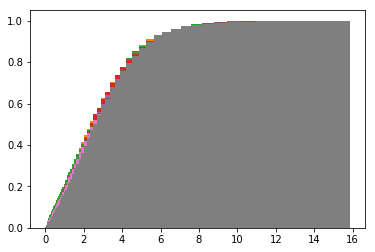

In [100]:
g1_blue,bins,_ = plt.hist(minb_1,bins,density=True,cumulative = True)
g2_blue,bins,_  = plt.hist(minb_2,bins,density=True,cumulative = True)
g3_blue,bins,_  = plt.hist(minb_3,bins,density=True,cumulative = True)
g4_blue,bins,_  = plt.hist(minb_4,bins,density=True,cumulative = True)
g5_blue,bins,_  = plt.hist(minb_5,bins,density=True,cumulative = True)
g6_blue,bins,_  = plt.hist(minb_6,bins,density=True,cumulative = True)
g7_blue,bins,_  = plt.hist(minb_7,bins,density=True,cumulative = True)
g8_blue,bins,_  = plt.hist(minb_8,bins,density=True,cumulative = True)

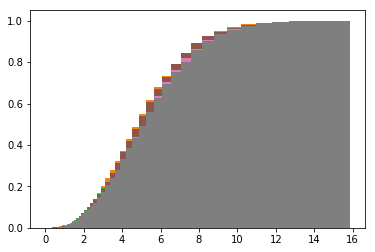

In [101]:
f1_blue,bins,_  = plt.hist(minrb_1,bins,density=True,cumulative = True)
f2_blue,bins,_  = plt.hist(minrb_2,bins,density=True,cumulative = True)
f3_blue,bins,_  = plt.hist(minrb_3,bins,density=True,cumulative = True)
f4_blue,bins,_  = plt.hist(minrb_4,bins,density=True,cumulative = True)
f5_blue,bins,_  = plt.hist(minrb_5,bins,density=True,cumulative = True)
f6_blue,bins,_  = plt.hist(minrb_6,bins,density=True,cumulative = True)
f7_blue,bins,_  = plt.hist(minrb_7,bins,density=True,cumulative = True)
f8_blue,bins,_  = plt.hist(minrb_8,bins,density=True,cumulative = True)

In [102]:
j1_blue = (np.ones(100)-g1_blue)/(np.ones(100)-f1_blue)
j2_blue = (np.ones(100)-g2_blue)/(np.ones(100)-f2_blue)
j3_blue = (np.ones(100)-g3_blue)/(np.ones(100)-f3_blue)
j4_blue = (np.ones(100)-g4_blue)/(np.ones(100)-f4_blue)
j5_blue = (np.ones(100)-g5_blue)/(np.ones(100)-f5_blue)
j6_blue = (np.ones(100)-g6_blue)/(np.ones(100)-f6_blue)
j7_blue = (np.ones(100)-g7_blue)/(np.ones(100)-f7_blue)
j8_blue = (np.ones(100)-g8_blue)/(np.ones(100)-f8_blue)

C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


In [103]:
j_mean_blue_10 = np.mean((j1_blue,j2_blue,j3_blue,j4_blue,j5_blue,j6_blue,j7_blue,j8_blue),axis = 0)
j_std_blue_10 = np.std((j1_blue,j2_blue,j3_blue,j4_blue,j5_blue,j6_blue,j7_blue,j8_blue),axis = 0)

In [104]:
%%time
xr = np.random.uniform(np.amin(red_1[:,0]),np.amax(red_1[:,0]),len(red_1))
yr = np.random.uniform(np.amin(red_1[:,1]),np.amax(red_1[:,1]),len(red_1))
zr = np.random.uniform(np.amin(red_1[:,2]),np.amax(red_1[:,2]),len(red_1))
xyz_r = np.vstack((xr,yr,zr)).T
minb_1 = np.zeros(len(red_1))
minrb_1 = np.zeros(len(red_1))
for index,pos in enumerate(red_1):
    dist = np.sqrt(np.sum((pos-red_1)**2,axis=1))
    minb_1[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_1)**2,axis=1))
    minrb_1[index] = np.amin(dist)
   
        

Wall time: 589 ms


In [105]:
%%time
xr = np.random.uniform(np.amin(red_2[:,0]),np.amax(red_2[:,0]),len(red_2))
yr = np.random.uniform(np.amin(red_2[:,1]),np.amax(red_2[:,1]),len(red_2))
zr = np.random.uniform(np.amin(red_2[:,2]),np.amax(red_2[:,2]),len(red_2))
xyz_r = np.vstack((xr,yr,zr)).T
minb_2 = np.zeros(len(red_2))
minrb_2 = np.zeros(len(red_2))
for index,pos in enumerate(red_2):
    dist = np.sqrt(np.sum((pos-red_2)**2,axis=1))
    minb_2[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_2)**2,axis=1))
    minrb_2[index] = np.amin(dist)
   
        

Wall time: 1.07 s


In [106]:
%%time
xr = np.random.uniform(np.amin(red_3[:,0]),np.amax(red_3[:,0]),len(red_3))
yr = np.random.uniform(np.amin(red_3[:,1]),np.amax(red_3[:,1]),len(red_3))
zr = np.random.uniform(np.amin(red_3[:,2]),np.amax(red_3[:,2]),len(red_3))
xyz_r = np.vstack((xr,yr,zr)).T
minb_3 = np.zeros(len(red_3))
minrb_3 = np.zeros(len(red_3))
for index,pos in enumerate(red_3):
    dist = np.sqrt(np.sum((pos-red_3)**2,axis=1))
    minb_3[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_3)**2,axis=1))
    minrb_3[index] = np.amin(dist)
   
        

Wall time: 755 ms


In [107]:
%%time
xr = np.random.uniform(np.amin(red_4[:,0]),np.amax(red_4[:,0]),len(red_4))
yr = np.random.uniform(np.amin(red_4[:,1]),np.amax(red_4[:,1]),len(red_4))
zr = np.random.uniform(np.amin(red_4[:,2]),np.amax(red_4[:,2]),len(red_4))
xyz_r = np.vstack((xr,yr,zr)).T
minb_4 = np.zeros(len(red_4))
minrb_4 = np.zeros(len(red_4))
for index,pos in enumerate(red_4):
    dist = np.sqrt(np.sum((pos-red_4)**2,axis=1))
    minb_4[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_4)**2,axis=1))
    minrb_4[index] = np.amin(dist)
   
        

Wall time: 644 ms


In [108]:
%%time
xr = np.random.uniform(np.amin(red_5[:,0]),np.amax(red_5[:,0]),len(red_5))
yr = np.random.uniform(np.amin(red_5[:,1]),np.amax(red_5[:,1]),len(red_5))
zr = np.random.uniform(np.amin(red_5[:,2]),np.amax(red_5[:,2]),len(red_5))
xyz_r = np.vstack((xr,yr,zr)).T
minb_5 = np.zeros(len(red_5))
minrb_5 = np.zeros(len(red_5))
for index,pos in enumerate(red_5):
    dist = np.sqrt(np.sum((pos-red_5)**2,axis=1))
    minb_5[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_5)**2,axis=1))
    minrb_5[index] = np.amin(dist)
   
        

Wall time: 465 ms


In [109]:
%%time
xr = np.random.uniform(np.amin(red_6[:,0]),np.amax(red_6[:,0]),len(red_6))
yr = np.random.uniform(np.amin(red_6[:,1]),np.amax(red_6[:,1]),len(red_6))
zr = np.random.uniform(np.amin(red_6[:,2]),np.amax(red_6[:,2]),len(red_6))
xyz_r = np.vstack((xr,yr,zr)).T
minb_6 = np.zeros(len(red_6))
minrb_6 = np.zeros(len(red_6))
for index,pos in enumerate(red_6):
    dist = np.sqrt(np.sum((pos-red_6)**2,axis=1))
    minb_6[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_6)**2,axis=1))
    minrb_6[index] = np.amin(dist)
   
        

Wall time: 665 ms


In [110]:
%%time
xr = np.random.uniform(np.amin(red_7[:,0]),np.amax(red_7[:,0]),len(red_7))
yr = np.random.uniform(np.amin(red_7[:,1]),np.amax(red_7[:,1]),len(red_7))
zr = np.random.uniform(np.amin(red_7[:,2]),np.amax(red_7[:,2]),len(red_7))
xyz_r = np.vstack((xr,yr,zr)).T
minb_7 = np.zeros(len(red_7))
minrb_7 = np.zeros(len(red_7))
for index,pos in enumerate(red_7):
    dist = np.sqrt(np.sum((pos-red_7)**2,axis=1))
    minb_7[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_7)**2,axis=1))
    minrb_7[index] = np.amin(dist)
   
        

Wall time: 590 ms


In [111]:
%%time
xr = np.random.uniform(np.amin(red_8[:,0]),np.amax(red_8[:,0]),len(red_8))
yr = np.random.uniform(np.amin(red_8[:,1]),np.amax(red_8[:,1]),len(red_8))
zr = np.random.uniform(np.amin(red_8[:,2]),np.amax(red_8[:,2]),len(red_8))
xyz_r = np.vstack((xr,yr,zr)).T
minb_8 = np.zeros(len(red_8))
minrb_8 = np.zeros(len(red_8))
for index,pos in enumerate(red_8):
    dist = np.sqrt(np.sum((pos-red_8)**2,axis=1))
    minb_8[index] = np.amin(dist[dist!=0])
    
for index,pos in enumerate(xyz_r):
    dist = np.sqrt(np.sum((pos-red_8)**2,axis=1))
    minrb_8[index] = np.amin(dist)
   
        

Wall time: 558 ms


In [112]:
bins = np.logspace(-2,1.2,101)

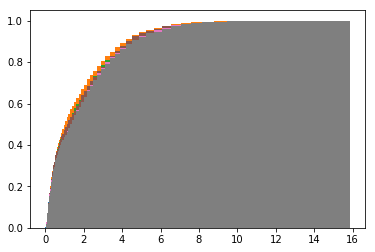

In [113]:
g1_red,bins,_ = plt.hist(minb_1,bins,density=True,cumulative = True)
g2_red,bins,_  = plt.hist(minb_2,bins,density=True,cumulative = True)
g3_red,bins,_  = plt.hist(minb_3,bins,density=True,cumulative = True)
g4_red,bins,_  = plt.hist(minb_4,bins,density=True,cumulative = True)
g5_red,bins,_  = plt.hist(minb_5,bins,density=True,cumulative = True)
g6_red,bins,_  = plt.hist(minb_6,bins,density=True,cumulative = True)
g7_red,bins,_  = plt.hist(minb_7,bins,density=True,cumulative = True)
g8_red,bins,_  = plt.hist(minb_8,bins,density=True,cumulative = True)

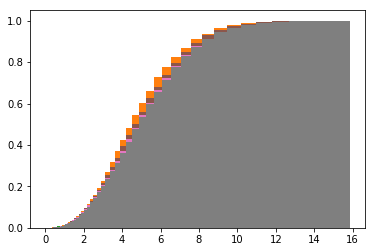

In [114]:
f1_red,bins,_  = plt.hist(minrb_1,bins,density=True,cumulative = True)
f2_red,bins,_  = plt.hist(minrb_2,bins,density=True,cumulative = True)
f3_red,bins,_  = plt.hist(minrb_3,bins,density=True,cumulative = True)
f4_red,bins,_  = plt.hist(minrb_4,bins,density=True,cumulative = True)
f5_red,bins,_  = plt.hist(minrb_5,bins,density=True,cumulative = True)
f6_red,bins,_  = plt.hist(minrb_6,bins,density=True,cumulative = True)
f7_red,bins,_  = plt.hist(minrb_7,bins,density=True,cumulative = True)
f8_red,bins,_  = plt.hist(minrb_8,bins,density=True,cumulative = True)

In [115]:
j1_red = (np.ones(100)-g1_red)/(np.ones(100)-f1_red)
j2_red = (np.ones(100)-g2_red)/(np.ones(100)-f2_red)
j3_red = (np.ones(100)-g3_red)/(np.ones(100)-f3_red)
j4_red = (np.ones(100)-g4_red)/(np.ones(100)-f4_red)
j5_red = (np.ones(100)-g5_red)/(np.ones(100)-f5_red)
j6_red = (np.ones(100)-g6_red)/(np.ones(100)-f6_red)
j7_red = (np.ones(100)-g7_red)/(np.ones(100)-f7_red)
j8_red = (np.ones(100)-g8_red)/(np.ones(100)-f8_red)

C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  
C:\Users\zahra\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  


In [116]:
j_mean_red_10 = np.mean((j1_red,j2_red,j3_red,j4_red,j5_red,j6_red,j7_red,j8_red),axis = 0)
j_std_red_10 = np.std((j1_red,j2_red,j3_red,j4_red,j5_red,j6_red,j7_red,j8_red),axis = 0)

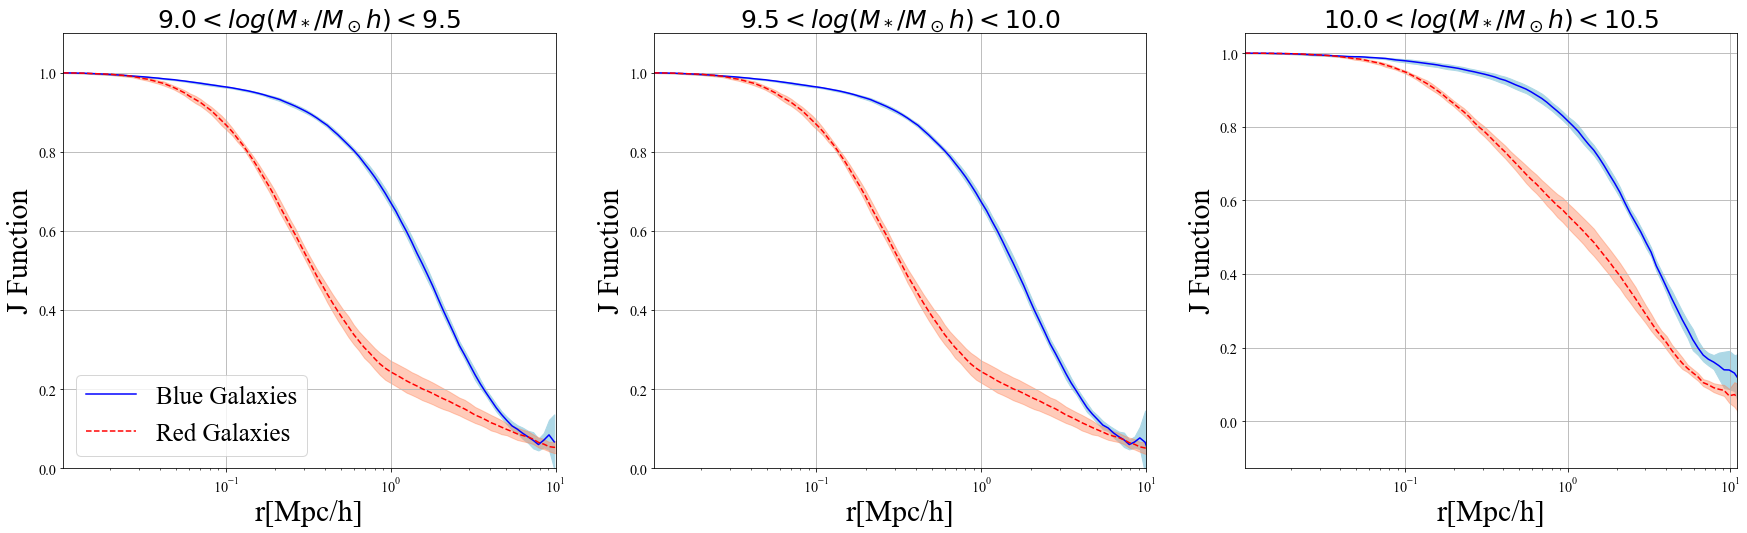

In [124]:
fig = plt.figure(figsize=(30,8))
params = {'legend.fontsize': 'X-large',
         'font.family':'Times New Roman', 
         'axes.labelsize': 'X-large',
         'axes.titlesize':'X-large',
         'xtick.labelsize':'X-large',
         'ytick.labelsize':'X-large'}
plt.rcParams.update(params)

ax = fig.add_subplot(131,xlabel='r[Mpc/h]',ylabel ='J Function',title='$9.0<log(M_*/M_\odot h)<9.5$')
ax.plot(bincenters ,j_mean_blue_9,color = 'blue',label= 'Blue Galaxies')
plt.fill_between(bincenters , j_mean_blue_9-j_std_blue_9,j_mean_blue_9+j_std_blue_9,color ='lightblue', alpha=1)
ax.plot(bincenters ,j_mean_red_9 ,'r--',label= 'Red Galaxies')
plt.fill_between(bincenters , j_mean_red_9-j_std_red_9,j_mean_red_9+j_std_red_9,color ='coral', alpha=0.4)
ax.legend(loc=0,fontsize=25)
plt.xscale('log')
plt.xlabel('r[Mpc/h]',fontsize=30)
plt.ylabel('J Function',fontsize=30)
plt.title('$9.0<log(M_*/M_\odot h)<9.5$',fontsize=25)
plt.ylim(0,1.1)
plt.xlim(0,10)
plt.grid('on')
ax = fig.add_subplot(132,xlabel='r[Mpc/h]',ylabel ='J Function',title='$9.5<log(M_*/M_\odot h)<10.0$')
ax.plot(bincenters ,j_mean_blue_95,color = 'blue')
plt.fill_between(bincenters , j_mean_blue_95-j_std_blue_95,j_mean_blue_95+ j_std_blue_95,color ='lightblue', alpha=1)
ax.plot(bincenters ,j_mean_red_95 ,'r--')
plt.fill_between(bincenters ,j_mean_red_95-j_std_red_95,j_mean_red_95+j_std_red_95,color ='coral', alpha=0.4)
plt.xscale('log')
plt.title('$9.5<log(M_*/M_\odot h)<10.0$',fontsize=25)
plt.xlabel('r[Mpc/h]',fontsize=30)
plt.ylabel('J Function',fontsize=30)
plt.xlim(0,10)
plt.ylim(0,1.1)
plt.grid('on')
ax = fig.add_subplot(133,xlabel='r[Mpc/h]',ylabel ='J Function')
ax.plot(bincenters ,j_mean_blue_10,color = 'blue')
plt.fill_between(bincenters ,j_mean_blue_10-j_std_blue_10,j_mean_blue_10+ j_std_blue_10,color ='lightblue', alpha=1)
ax.plot(bincenters ,j_mean_red_10,'r--')
plt.fill_between(bincenters , j_mean_red_10-j_std_red_10,j_mean_red_10+ j_std_red_10,color ='coral', alpha=0.4)
plt.xscale('log')
plt.xlim(0,11)
plt.title('$10.0<log(M_*/M_\odot h)<10.5$',fontsize=25)
plt.xlabel('r[Mpc/h]',fontsize=30)
plt.ylabel('J Function',fontsize=30)
#plt.ylim(0.2,1.1)
plt.grid('on')
plt.savefig('Jfunction-blue-red-galaxies.png')

In [118]:
bincenters = 0.5*(bins[1:]+bins[:-1])

In [107]:
j_mean_red

array([0.99955478, 0.99911925, 0.99880293, 0.99804003, 0.99719007,
       0.99633744, 0.99553491, 0.99443312, 0.99328614, 0.99179214,
       0.98971403, 0.98788427, 0.98551853, 0.98295241, 0.97975882,
       0.97626698, 0.97259511, 0.96831387, 0.96384738, 0.95863911,
       0.95249872, 0.94500916, 0.93764262, 0.92842155, 0.91861434,
       0.90843815, 0.89786932, 0.88568224, 0.87323882, 0.85882982,
       0.84300325, 0.8275002 , 0.810657  , 0.79354255, 0.77473309,
       0.7554662 , 0.73587969, 0.71573489, 0.69553436, 0.6739454 ,
       0.65356404, 0.63309158, 0.61201486, 0.59083608, 0.56901103,
       0.54935213, 0.5298929 , 0.51082319, 0.49226647, 0.47424305,
       0.45537605, 0.43844787, 0.4227339 , 0.40720364, 0.39299697,
       0.37866781, 0.36626657, 0.35417563, 0.34233048, 0.33128216,
       0.32085283, 0.31132506, 0.30051846, 0.29054614, 0.28067681,
       0.27084937, 0.26023905, 0.25035075, 0.23913254, 0.22834201,
       0.21760405, 0.204913  , 0.19392712, 0.18177973, 0.17001

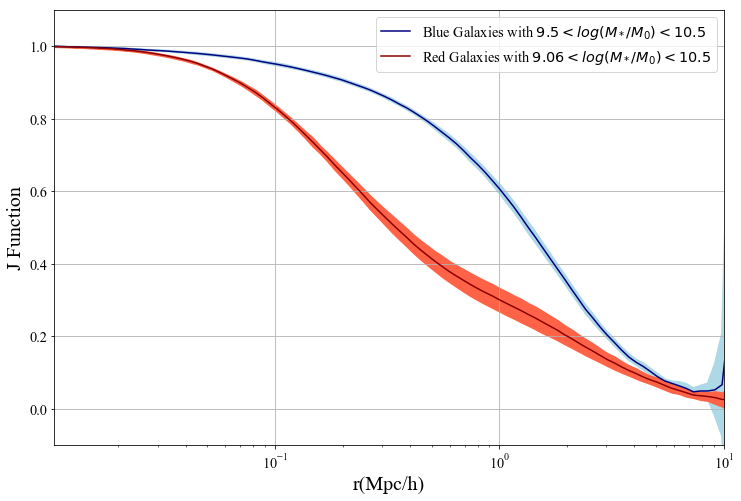

In [108]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                

bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bincenters, j_mean_blue,color = 'navy',label = 'Blue Galaxies with $9.5<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, j_mean_blue-j_std_blue,j_mean_blue+j_std_blue,color = 'lightblue',lw=2)

plt.plot(bincenters, j_mean_red,color = 'darkred',label = 'Red Galaxies with $9.06<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, j_mean_red-j_std_red,j_mean_red+j_std_red,color = 'tomato',lw=2)
#plt.xlim(0,4)
plt.xscale('log')
plt.xlim(0,10)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)',fontsize=20);
plt.ylabel('J Function',fontsize=20)
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
plt.ylim(-0.1,1.1)
plt.savefig('j_function_red_blue_same_n.eps')

In [110]:
v1_red=1-f1_red
v2_red=1-f2_red
v3_red=1-f3_red
v4_red=1-f4_red
v5_red=1-f5_red
v6_red=1-f6_red
v7_red=1-f7_red
v8_red=1-f8_red

In [111]:
v1_blue=1-f1_blue
v2_blue=1-f2_blue
v3_blue=1-f3_blue
v4_blue=1-f4_blue
v5_blue=1-f5_blue
v6_blue=1-f6_blue
v7_blue=1-f7_blue
v8_blue=1-f8_blue

In [115]:
v_mean_red = np.mean((v1_red,v2_red,v3_red,v4_red,v5_red,v6_red,v7_red,v8_red),axis = 0)
v_std_red = np.std((v1_red,v2_red,v3_red,v4_red,v5_red,v6_red,v7_red,v8_red),axis = 0)

In [116]:
v_mean_blue = np.mean((v1_blue,v2_blue,v3_blue,v4_blue,v5_blue,v6_blue,v7_blue,v8_blue),axis = 0)
v_std_blue = np.std((v1_blue,v2_blue,v3_blue,v4_blue,v5_blue,v6_blue,v7_blue,v8_blue),axis = 0)

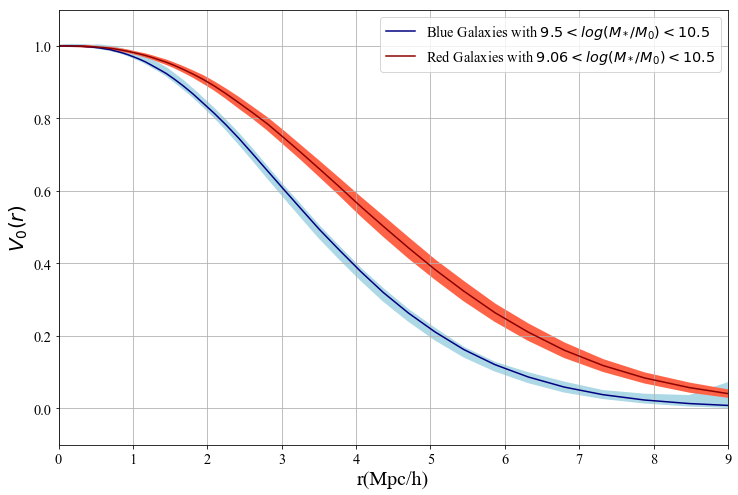

In [119]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                

bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bincenters, v_mean_blue,color = 'navy',label = 'Blue Galaxies with $9.5<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, v_mean_blue-v_std_blue,v_mean_blue+j_std_blue,color = 'lightblue',lw=2)

plt.plot(bincenters, v_mean_red,color = 'darkred',label = 'Red Galaxies with $9.06<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, v_mean_red-v_std_red,v_mean_red+v_std_red,color = 'tomato',lw=2)
#plt.xlim(0,4)
#plt.xscale('log')
plt.xlim(0,10)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)',fontsize=20);
plt.ylabel('$V_0(r)$',fontsize=20)
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
plt.ylim(-0.1,1.1)
plt.xlim(0,9)
plt.savefig('v_function_red_blue_same_n.eps')

In [283]:
x1 = blue_1['x'].values
y1 = blue_1['y'].values
z1 = blue_1['z'].values

x2 = blue_2['x'].values
y2 = blue_2['y'].values
z2 = blue_2['z'].values

x3 = blue_3['x'].values
y3 = blue_3['y'].values
z3 = blue_3['z'].values

x4 = blue_4['x'].values
y4 = blue_4['y'].values
z4 = blue_4['z'].values

x5 = blue_5['x'].values
y5 = blue_5['y'].values
z5 = blue_5['z'].values

x6 = blue_6['x'].values
y6 = blue_6['y'].values
z6 = blue_6['z'].values

x7 = blue_7['x'].values
y7 = blue_7['y'].values
z7 = blue_7['z'].values

x8 = blue_8['x'].values
y8 = blue_8['y'].values
z8 = blue_8['z'].values

In [284]:
%%time
minimum1 = []
for i in range(len(x1)):
    dist = []
        
    for j in range(len(x1)):
        if (j != i ):
            dist.append(distance(x1[i],y1[i],z1[i],x1[j],y1[j],z1[j]))
    minimum1.append(min(dist))
    
print(len(minimum1))

xr = np.random.uniform(np.amin(x1),np.amax(x1),len(x1))
yr = np.random.uniform(np.amin(y1),np.amax(y1),len(y1))
zr = np.random.uniform(np.amin(z1),np.amax(z1),len(z1))

minimum_r1 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x1[j],y1[j],z1[j]))
    minimum_r1.append(min(dist))
    
print(len(minimum_r1))

5759
5759
Wall time: 14min 9s


In [285]:
%%time
minimum2 = []
for i in range(len(x2)):
    dist = []
        
    for j in range(len(x2)):
        if (j != i ):
            dist.append(distance(x2[i],y2[i],z2[i],x2[j],y2[j],z2[j]))
    minimum2.append(min(dist))
    
print(len(minimum2))

xr = np.random.uniform(np.amin(x2),np.amax(x2),len(x2))
yr = np.random.uniform(np.amin(y2),np.amax(y2),len(y2))
zr = np.random.uniform(np.amin(z2),np.amax(z2),len(z2))

minimum_r2 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x2[j],y2[j],z2[j]))
    minimum_r2.append(min(dist))
    
print(len(minimum_r2))

6803
6803
Wall time: 19min 39s


In [286]:
%%time
minimum3 = []
for i in range(len(x3)):
    dist = []
        
    for j in range(len(x3)):
        if (j != i ):
            dist.append(distance(x3[i],y3[i],z3[i],x3[j],y3[j],z3[j]))
    minimum3.append(min(dist))
    
print(len(minimum3))

xr = np.random.uniform(np.amin(x3),np.amax(x3),len(x3))
yr = np.random.uniform(np.amin(y3),np.amax(y3),len(y3))
zr = np.random.uniform(np.amin(z3),np.amax(z3),len(z3))

minimum_r3 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x3[j],y3[j],z3[j]))
    minimum_r3.append(min(dist))
    
print(len(minimum_r3))

5831
5831
Wall time: 14min 17s


In [287]:
%%time
minimum4 = []
for i in range(len(x4)):
    dist = []
        
    for j in range(len(x4)):
        if (j != i ):
            dist.append(distance(x4[i],y4[i],z4[i],x4[j],y4[j],z4[j]))
    minimum4.append(min(dist))
    
print(len(minimum4))

xr = np.random.uniform(np.amin(x4),np.amax(x4),len(x4))
yr = np.random.uniform(np.amin(y4),np.amax(y4),len(y4))
zr = np.random.uniform(np.amin(z4),np.amax(z4),len(z4))

minimum_r4 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x4[j],y4[j],z4[j]))
    minimum_r4.append(min(dist))
    
print(len(minimum_r4))

5977
5977
Wall time: 15min 4s


In [288]:
%%time
minimum5 = []
for i in range(len(x5)):
    dist = []
        
    for j in range(len(x5)):
        if (j != i ):
            dist.append(distance(x5[i],y5[i],z5[i],x5[j],y5[j],z5[j]))
    minimum5.append(min(dist))
    
print(len(minimum5))

xr = np.random.uniform(np.amin(x5),np.amax(x5),len(x5))
yr = np.random.uniform(np.amin(y5),np.amax(y5),len(y5))
zr = np.random.uniform(np.amin(z5),np.amax(z5),len(z5))

minimum_r5 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x5[j],y5[j],z5[j]))
    minimum_r5.append(min(dist))
    
print(len(minimum_r5))

5356
5356
Wall time: 12min 5s


In [289]:
%%time
minimum6 = []
for i in range(len(x6)):
    dist = []
        
    for j in range(len(x6)):
        if (j != i ):
            dist.append(distance(x6[i],y6[i],z6[i],x6[j],y6[j],z6[j]))
    minimum6.append(min(dist))
    
print(len(minimum6))

xr = np.random.uniform(np.amin(x6),np.amax(x6),len(x6))
yr = np.random.uniform(np.amin(y6),np.amax(y6),len(y6))
zr = np.random.uniform(np.amin(z6),np.amax(z6),len(z6))

minimum_r6 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x6[j],y6[j],z6[j]))
    minimum_r6.append(min(dist))
    
print(len(minimum_r6))

6038
6038
Wall time: 15min 11s


In [290]:
%%time
minimum7 = []
for i in range(len(x7)):
    dist = []
        
    for j in range(len(x7)):
        if (j != i ):
            dist.append(distance(x7[i],y7[i],z7[i],x7[j],y7[j],z7[j]))
    minimum7.append(min(dist))
    
print(len(minimum7))

xr = np.random.uniform(np.amin(x7),np.amax(x7),len(x7))
yr = np.random.uniform(np.amin(y7),np.amax(y7),len(y7))
zr = np.random.uniform(np.amin(z7),np.amax(z7),len(z7))

minimum_r7 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x7[j],y7[j],z7[j]))
    minimum_r7.append(min(dist))
    
print(len(minimum_r7))

5698
5698
Wall time: 13min 31s


In [291]:
%%time
minimum8 = []
for i in range(len(x8)):
    dist = []
        
    for j in range(len(x8)):
        if (j != i ):
            dist.append(distance(x8[i],y8[i],z8[i],x8[j],y8[j],z8[j]))
    minimum8.append(min(dist))
    
print(len(minimum8))

xr = np.random.uniform(np.amin(x8),np.amax(x8),len(x8))
yr = np.random.uniform(np.amin(y8),np.amax(y8),len(y8))
zr = np.random.uniform(np.amin(z8),np.amax(z8),len(z8))

minimum_r8 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x8[j],y8[j],z8[j]))
    minimum_r8.append(min(dist))
    
print(len(minimum_r8))

5421
5421
Wall time: 12min 15s


In [292]:
pd.DataFrame(np.array(minimum1)).to_csv('1min_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r1)).to_csv('1rmin_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum2)).to_csv('2min_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r2)).to_csv('2rmin_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum3)).to_csv('3min_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r3)).to_csv('3rmin_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum4)).to_csv('4min_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r4)).to_csv('4rmin_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum5)).to_csv('5min_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r5)).to_csv('5rmin_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum6)).to_csv('6min_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r6)).to_csv('6rmin_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum7)).to_csv('7min_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r7)).to_csv('7rmin_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum8)).to_csv('8min_blue_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r8)).to_csv('8rmin_blue_newn.csv',index = False)

In [293]:
minimum1 = np.array(minimum1)
minimum2 = np.array(minimum2)
minimum3 = np.array(minimum3)
minimum4 = np.array(minimum4)
minimum5 = np.array(minimum5)
minimum6 = np.array(minimum6)
minimum7 = np.array(minimum7)
minimum8 = np.array(minimum8)

minimum_r1 = np.array(minimum_r1)
minimum_r2 = np.array(minimum_r2)
minimum_r3 = np.array(minimum_r3)
minimum_r4 = np.array(minimum_r4)
minimum_r5 = np.array(minimum_r5)
minimum_r6 = np.array(minimum_r6)
minimum_r7 = np.array(minimum_r7)
minimum_r8 = np.array(minimum_r8)

In [294]:
bins = np.logspace(-2,1.2,101)

In [295]:
bins

array([1.00000000e-02, 1.07646521e-02, 1.15877736e-02, 1.24738351e-02,
       1.34276496e-02, 1.44543977e-02, 1.55596563e-02, 1.67494288e-02,
       1.80301774e-02, 1.94088588e-02, 2.08929613e-02, 2.24905461e-02,
       2.42102905e-02, 2.60615355e-02, 2.80543364e-02, 3.01995172e-02,
       3.25087297e-02, 3.49945167e-02, 3.76703799e-02, 4.05508535e-02,
       4.36515832e-02, 4.69894109e-02, 5.05824662e-02, 5.44502653e-02,
       5.86138165e-02, 6.30957344e-02, 6.79203633e-02, 7.31139083e-02,
       7.87045790e-02, 8.47227414e-02, 9.12010839e-02, 9.81747943e-02,
       1.05681751e-01, 1.13762729e-01, 1.22461620e-01, 1.31825674e-01,
       1.41905752e-01, 1.52756606e-01, 1.64437172e-01, 1.77010896e-01,
       1.90546072e-01, 2.05116218e-01, 2.20800473e-01, 2.37684029e-01,
       2.55858589e-01, 2.75422870e-01, 2.96483139e-01, 3.19153786e-01,
       3.43557948e-01, 3.69828180e-01, 3.98107171e-01, 4.28548520e-01,
       4.61317575e-01, 4.96592321e-01, 5.34564359e-01, 5.75439937e-01,
      

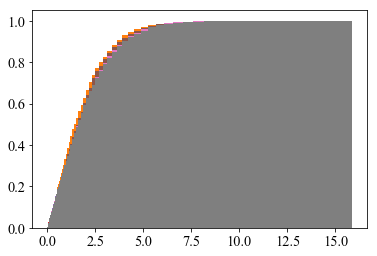

In [296]:
g1_blue,bins,_ = plt.hist(minimum1,bins,density=True,cumulative = True)
g2_blue,bins,_  = plt.hist(minimum2,bins,density=True,cumulative = True)
g3_blue,bins,_  = plt.hist(minimum3,bins,density=True,cumulative = True)
g4_blue,bins,_  = plt.hist(minimum4,bins,density=True,cumulative = True)
g5_blue,bins,_  = plt.hist(minimum5,bins,density=True,cumulative = True)
g6_blue,bins,_  = plt.hist(minimum6,bins,density=True,cumulative = True)
g7_blue,bins,_  = plt.hist(minimum7,bins,density=True,cumulative = True)
g8_blue,bins,_  = plt.hist(minimum8,bins,density=True,cumulative = True)

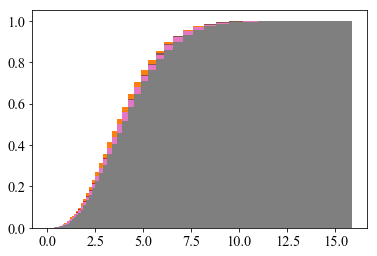

In [297]:
f1_blue,bins,_  = plt.hist(minimum_r1,bins,density=True,cumulative = True)
f2_blue,bins,_  = plt.hist(minimum_r2,bins,density=True,cumulative = True)
f3_blue,bins,_  = plt.hist(minimum_r3,bins,density=True,cumulative = True)
f4_blue,bins,_  = plt.hist(minimum_r4,bins,density=True,cumulative = True)
f5_blue,bins,_  = plt.hist(minimum_r5,bins,density=True,cumulative = True)
f6_blue,bins,_  = plt.hist(minimum_r6,bins,density=True,cumulative = True)
f7_blue,bins,_  = plt.hist(minimum_r7,bins,density=True,cumulative = True)
f8_blue,bins,_  = plt.hist(minimum_r8,bins,density=True,cumulative = True)

In [298]:
j1_blue = (np.ones(100)-g1_blue)/(np.ones(100)-f1_blue)
j2_blue = (np.ones(100)-g2_blue)/(np.ones(100)-f2_blue)
j3_blue = (np.ones(100)-g3_blue)/(np.ones(100)-f3_blue)
j4_blue = (np.ones(100)-g4_blue)/(np.ones(100)-f4_blue)
j5_blue = (np.ones(100)-g5_blue)/(np.ones(100)-f5_blue)
j6_blue = (np.ones(100)-g6_blue)/(np.ones(100)-f6_blue)
j7_blue = (np.ones(100)-g7_blue)/(np.ones(100)-f7_blue)
j8_blue = (np.ones(100)-g8_blue)/(np.ones(100)-f8_blue)

In [299]:
j_mean_blue = np.mean((j1_blue,j2_blue,j3_blue,j4_blue,j5_blue,j6_blue,j7_blue,j8_blue),axis = 0)
j_std_blue = np.std((j1_blue,j2_blue,j3_blue,j4_blue,j5_blue,j6_blue,j7_blue,j8_blue),axis = 0)

In [300]:
j_mean_blue

array([0.99970951, 0.99958792, 0.99918965, 0.99888093, 0.9982856 ,
       0.99794397, 0.99747024, 0.9970868 , 0.99661018, 0.99605958,
       0.99548782, 0.99474099, 0.99400454, 0.992672  , 0.99180833,
       0.99108753, 0.99015022, 0.98907514, 0.98798706, 0.98690324,
       0.98573512, 0.98406075, 0.9825506 , 0.98086893, 0.97908362,
       0.97731244, 0.97551631, 0.97380313, 0.97114975, 0.96812097,
       0.96549923, 0.9630079 , 0.96011864, 0.95731272, 0.95390994,
       0.95080185, 0.94763279, 0.94419299, 0.94055106, 0.93591316,
       0.9310863 , 0.92589882, 0.92122849, 0.9162362 , 0.91029733,
       0.9041015 , 0.89724433, 0.88983504, 0.8816059 , 0.87328967,
       0.86389338, 0.85379193, 0.84324004, 0.83160596, 0.81954388,
       0.80732334, 0.79341209, 0.7780742 , 0.76119869, 0.74581266,
       0.72865578, 0.70874066, 0.68826919, 0.66641815, 0.64490532,
       0.62029584, 0.5946796 , 0.56905478, 0.5427346 , 0.51582475,
       0.48858961, 0.45830384, 0.43075555, 0.40202441, 0.37007

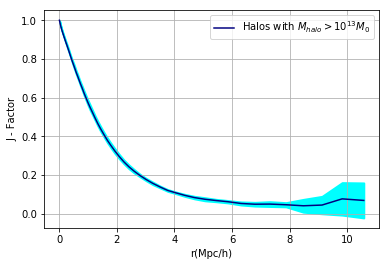

In [241]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bincenters, j_mean_blue,color = 'navy',label = 'Halos with $M_{halo}>10^{13}M_0$')
plt.fill_between(bincenters, j_mean_blue-j_std_blue,j_mean_blue+j_std_blue,color = 'cyan',lw=2)
#plt.xlim(0,4)
#plt.xscale('log')
#plt.xlim(0,4)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)');
plt.ylabel('J - Factor')
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
#plt.savefig('piosson-smdpl.jpg')

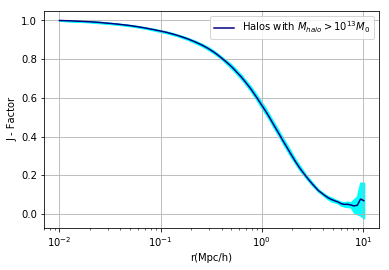

In [243]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bins[:-1], j_mean_blue,color = 'navy',label = 'Halos with $M_{halo}>10^{13}M_0$')
plt.fill_between(bins[:-1], j_mean_blue-j_std_blue,j_mean_blue+j_std_blue,color = 'cyan',lw=2)
#plt.xlim(0,4)
plt.xscale('log')
#plt.xlim(0,4)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)');
plt.ylabel('J - Factor')
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
#plt.savefig('piosson-smdpl.jpg')

In [222]:
###################################################

In [301]:
x1 = red_1['x'].values
y1 = red_1['y'].values
z1 = red_1['z'].values

x2 = red_2['x'].values
y2 = red_2['y'].values
z2 = red_2['z'].values

x3 = red_3['x'].values
y3 = red_3['y'].values
z3 = red_3['z'].values

x4 = red_4['x'].values
y4 = red_4['y'].values
z4 = red_4['z'].values

x5 = red_5['x'].values
y5 = red_5['y'].values
z5 = red_5['z'].values

x6 = red_6['x'].values
y6 = red_6['y'].values
z6 = red_6['z'].values

x7 = red_7['x'].values
y7 = red_7['y'].values
z7 = red_7['z'].values

x8 = red_8['x'].values
y8 = red_8['y'].values
z8 = red_8['z'].values

In [245]:
x1.shape

(11063,)

In [302]:
%%time
minimum1 = []
for i in range(len(x1)):
    dist = []
        
    for j in range(len(x1)):
        if (j != i ):
            dist.append(distance(x1[i],y1[i],z1[i],x1[j],y1[j],z1[j]))
    minimum1.append(min(dist))
    
print(len(minimum1))

xr = np.random.uniform(np.amin(x1),np.amax(x1),len(x1))
yr = np.random.uniform(np.amin(y1),np.amax(y1),len(y1))
zr = np.random.uniform(np.amin(z1),np.amax(z1),len(z1))

minimum_r1 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x1[j],y1[j],z1[j]))
    minimum_r1.append(min(dist))
    
print(len(minimum_r1))

5513
5513
Wall time: 12min 34s


In [303]:
%%time
minimum2 = []
for i in range(len(x2)):
    dist = []
        
    for j in range(len(x2)):
        if (j != i ):
            dist.append(distance(x2[i],y2[i],z2[i],x2[j],y2[j],z2[j]))
    minimum2.append(min(dist))
    
print(len(minimum2))

xr = np.random.uniform(np.amin(x2),np.amax(x2),len(x2))
yr = np.random.uniform(np.amin(y2),np.amax(y2),len(y2))
zr = np.random.uniform(np.amin(z2),np.amax(z2),len(z2))

minimum_r2 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x2[j],y2[j],z2[j]))
    minimum_r2.append(min(dist))
    
print(len(minimum_r2))

7767
7767
Wall time: 24min 55s


In [304]:
%%time
minimum3 = []
for i in range(len(x3)):
    dist = []
        
    for j in range(len(x3)):
        if (j != i ):
            dist.append(distance(x3[i],y3[i],z3[i],x3[j],y3[j],z3[j]))
    minimum3.append(min(dist))
    
print(len(minimum3))

xr = np.random.uniform(np.amin(x3),np.amax(x3),len(x3))
yr = np.random.uniform(np.amin(y3),np.amax(y3),len(y3))
zr = np.random.uniform(np.amin(z3),np.amax(z3),len(z3))

minimum_r3 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x3[j],y3[j],z3[j]))
    minimum_r3.append(min(dist))
    
print(len(minimum_r3))

6272
6272
Wall time: 16min 32s


In [305]:
%%time
minimum4 = []
for i in range(len(x4)):
    dist = []
        
    for j in range(len(x4)):
        if (j != i ):
            dist.append(distance(x4[i],y4[i],z4[i],x4[j],y4[j],z4[j]))
    minimum4.append(min(dist))
    
print(len(minimum4))

xr = np.random.uniform(np.amin(x4),np.amax(x4),len(x4))
yr = np.random.uniform(np.amin(y4),np.amax(y4),len(y4))
zr = np.random.uniform(np.amin(z4),np.amax(z4),len(z4))

minimum_r4 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x4[j],y4[j],z4[j]))
    minimum_r4.append(min(dist))
    
print(len(minimum_r4))

5780
5780
Wall time: 13min 57s


In [306]:
%%time
minimum5 = []
for i in range(len(x5)):
    dist = []
        
    for j in range(len(x5)):
        if (j != i ):
            dist.append(distance(x5[i],y5[i],z5[i],x5[j],y5[j],z5[j]))
    minimum5.append(min(dist))
    
print(len(minimum5))

xr = np.random.uniform(np.amin(x5),np.amax(x5),len(x5))
yr = np.random.uniform(np.amin(y5),np.amax(y5),len(y5))
zr = np.random.uniform(np.amin(z5),np.amax(z5),len(z5))

minimum_r5 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x5[j],y5[j],z5[j]))
    minimum_r5.append(min(dist))
    
print(len(minimum_r5))

4369
4369
Wall time: 7min 57s


In [307]:
%%time
minimum6 = []
for i in range(len(x6)):
    dist = []
        
    for j in range(len(x6)):
        if (j != i ):
            dist.append(distance(x6[i],y6[i],z6[i],x6[j],y6[j],z6[j]))
    minimum6.append(min(dist))
    
print(len(minimum6))

xr = np.random.uniform(np.amin(x6),np.amax(x6),len(x6))
yr = np.random.uniform(np.amin(y6),np.amax(y6),len(y6))
zr = np.random.uniform(np.amin(z6),np.amax(z6),len(z6))

minimum_r6 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x6[j],y6[j],z6[j]))
    minimum_r6.append(min(dist))
    
print(len(minimum_r6))

6262
6262
Wall time: 16min 13s


In [308]:
%%time
minimum7 = []
for i in range(len(x7)):
    dist = []
        
    for j in range(len(x7)):
        if (j != i ):
            dist.append(distance(x7[i],y7[i],z7[i],x7[j],y7[j],z7[j]))
    minimum7.append(min(dist))
    
print(len(minimum7))

xr = np.random.uniform(np.amin(x7),np.amax(x7),len(x7))
yr = np.random.uniform(np.amin(y7),np.amax(y7),len(y7))
zr = np.random.uniform(np.amin(z7),np.amax(z7),len(z7))

minimum_r7 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x7[j],y7[j],z7[j]))
    minimum_r7.append(min(dist))
    
print(len(minimum_r7))

5521
5521
Wall time: 12min 39s


In [309]:
%%time
minimum8 = []
for i in range(len(x8)):
    dist = []
        
    for j in range(len(x8)):
        if (j != i ):
            dist.append(distance(x8[i],y8[i],z8[i],x8[j],y8[j],z8[j]))
    minimum8.append(min(dist))
    
print(len(minimum8))

xr = np.random.uniform(np.amin(x8),np.amax(x8),len(x8))
yr = np.random.uniform(np.amin(y8),np.amax(y8),len(y8))
zr = np.random.uniform(np.amin(z8),np.amax(z8),len(z8))

minimum_r8 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xr)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x8[j],y8[j],z8[j]))
    minimum_r8.append(min(dist))
    
print(len(minimum_r8))

5399
5399
Wall time: 12min 4s


In [310]:
pd.DataFrame(np.array(minimum1)).to_csv('1min_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r1)).to_csv('1rmin_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum2)).to_csv('2min_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r2)).to_csv('2rmin_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum3)).to_csv('3min_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r3)).to_csv('3rmin_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum4)).to_csv('4min_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r4)).to_csv('4rmin_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum5)).to_csv('5min_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r5)).to_csv('5rmin_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum6)).to_csv('6min_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r6)).to_csv('6rmin_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum7)).to_csv('7min_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r7)).to_csv('7rmin_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum8)).to_csv('8min_red_newn.csv',index = False)
pd.DataFrame(np.array(minimum_r8)).to_csv('8rmin_red_newn.csv',index = False)

In [311]:
minimum1 = np.array(minimum1)
minimum2 = np.array(minimum2)
minimum3 = np.array(minimum3)
minimum4 = np.array(minimum4)
minimum5 = np.array(minimum5)
minimum6 = np.array(minimum6)
minimum7 = np.array(minimum7)
minimum8 = np.array(minimum8)

minimum_r1 = np.array(minimum_r1)
minimum_r2 = np.array(minimum_r2)
minimum_r3 = np.array(minimum_r3)
minimum_r4 = np.array(minimum_r4)
minimum_r5 = np.array(minimum_r5)
minimum_r6 = np.array(minimum_r6)
minimum_r7 = np.array(minimum_r7)
minimum_r8 = np.array(minimum_r8)

In [312]:
bins = np.logspace(-2,1.2,101)

In [260]:
bins

array([1.00000000e-02, 1.07646521e-02, 1.15877736e-02, 1.24738351e-02,
       1.34276496e-02, 1.44543977e-02, 1.55596563e-02, 1.67494288e-02,
       1.80301774e-02, 1.94088588e-02, 2.08929613e-02, 2.24905461e-02,
       2.42102905e-02, 2.60615355e-02, 2.80543364e-02, 3.01995172e-02,
       3.25087297e-02, 3.49945167e-02, 3.76703799e-02, 4.05508535e-02,
       4.36515832e-02, 4.69894109e-02, 5.05824662e-02, 5.44502653e-02,
       5.86138165e-02, 6.30957344e-02, 6.79203633e-02, 7.31139083e-02,
       7.87045790e-02, 8.47227414e-02, 9.12010839e-02, 9.81747943e-02,
       1.05681751e-01, 1.13762729e-01, 1.22461620e-01, 1.31825674e-01,
       1.41905752e-01, 1.52756606e-01, 1.64437172e-01, 1.77010896e-01,
       1.90546072e-01, 2.05116218e-01, 2.20800473e-01, 2.37684029e-01,
       2.55858589e-01, 2.75422870e-01, 2.96483139e-01, 3.19153786e-01,
       3.43557948e-01, 3.69828180e-01, 3.98107171e-01, 4.28548520e-01,
       4.61317575e-01, 4.96592321e-01, 5.34564359e-01, 5.75439937e-01,
      

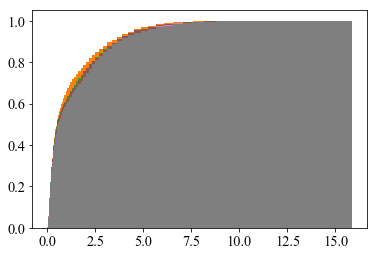

In [313]:
g1_red,bins,_ = plt.hist(minimum1,bins,density=True,cumulative = True)
g2_red,bins,_  = plt.hist(minimum2,bins,density=True,cumulative = True)
g3_red,bins,_  = plt.hist(minimum3,bins,density=True,cumulative = True)
g4_red,bins,_  = plt.hist(minimum4,bins,density=True,cumulative = True)
g5_red,bins,_  = plt.hist(minimum5,bins,density=True,cumulative = True)
g6_red,bins,_  = plt.hist(minimum6,bins,density=True,cumulative = True)
g7_red,bins,_  = plt.hist(minimum7,bins,density=True,cumulative = True)
g8_red,bins,_  = plt.hist(minimum8,bins,density=True,cumulative = True)

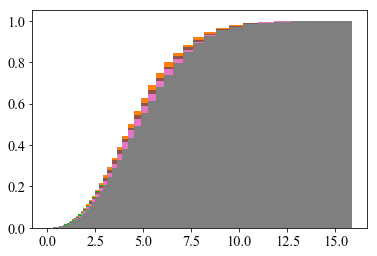

In [314]:
f1_red,bins,_  = plt.hist(minimum_r1,bins,density=True,cumulative = True)
f2_red,bins,_  = plt.hist(minimum_r2,bins,density=True,cumulative = True)
f3_red,bins,_  = plt.hist(minimum_r3,bins,density=True,cumulative = True)
f4_red,bins,_  = plt.hist(minimum_r4,bins,density=True,cumulative = True)
f5_red,bins,_  = plt.hist(minimum_r5,bins,density=True,cumulative = True)
f6_red,bins,_  = plt.hist(minimum_r6,bins,density=True,cumulative = True)
f7_red,bins,_  = plt.hist(minimum_r7,bins,density=True,cumulative = True)
f8_red,bins,_  = plt.hist(minimum_r8,bins,density=True,cumulative = True)

In [315]:
j1_red = (np.ones(100)-g1_red)/(np.ones(100)-f1_red)
j2_red = (np.ones(100)-g2_red)/(np.ones(100)-f2_red)
j3_red = (np.ones(100)-g3_red)/(np.ones(100)-f3_red)
j4_red = (np.ones(100)-g4_red)/(np.ones(100)-f4_red)
j5_red = (np.ones(100)-g5_red)/(np.ones(100)-f5_red)
j6_red = (np.ones(100)-g6_red)/(np.ones(100)-f6_red)
j7_red = (np.ones(100)-g7_red)/(np.ones(100)-f7_red)
j8_red = (np.ones(100)-g8_red)/(np.ones(100)-f8_red)

In [316]:
j_mean_red= np.mean((j1_red,j2_red,j3_red,j4_red,j5_red,j6_red,j7_red,j8_red),axis = 0)
j_std_red = np.std((j1_red,j2_red,j3_red,j4_red,j5_red,j6_red,j7_red,j8_red),axis = 0)

In [240]:
j_mean_blue

array([0.99952542, 0.99912123, 0.99849397, 0.99781818, 0.99728262,
       0.99657017, 0.99582267, 0.99490446, 0.99410994, 0.99336407,
       0.99230041, 0.99108352, 0.98995699, 0.98855451, 0.98687745,
       0.98536818, 0.98400524, 0.98225196, 0.98079708, 0.97864648,
       0.97692269, 0.97493638, 0.97269581, 0.97036061, 0.96777072,
       0.96496518, 0.9623855 , 0.95936444, 0.95574513, 0.95282895,
       0.94910433, 0.94580409, 0.94222292, 0.93854814, 0.93415305,
       0.9295848 , 0.92491121, 0.91981307, 0.91409236, 0.90843699,
       0.90219889, 0.89528628, 0.88829075, 0.88057036, 0.87293926,
       0.86384072, 0.85452299, 0.84395658, 0.83265016, 0.82008815,
       0.80684333, 0.79298999, 0.77871735, 0.76350785, 0.74685744,
       0.72846497, 0.71120341, 0.69117011, 0.66989399, 0.64889854,
       0.62438217, 0.60027888, 0.57473494, 0.54909956, 0.52325087,
       0.49491214, 0.46593178, 0.43758208, 0.40901183, 0.37968485,
       0.35167305, 0.32320024, 0.29548513, 0.26830263, 0.24315

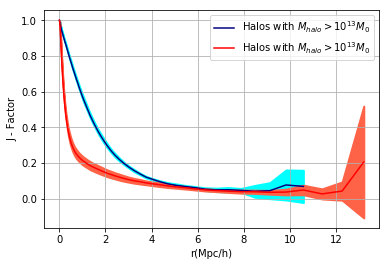

In [265]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bincenters, j_mean_blue,color = 'navy',label = 'Halos with $M_{halo}>10^{13}M_0$')
plt.fill_between(bincenters, j_mean_blue-j_std_blue,j_mean_blue+j_std_blue,color = 'cyan',lw=2)

plt.plot(bincenters, j_mean_red,color = 'red',label = 'Halos with $M_{halo}>10^{13}M_0$')
plt.fill_between(bincenters, j_mean_red-j_std_red,j_mean_red+j_std_red,color = 'tomato',lw=2)
#plt.xlim(0,4)
#plt.xscale('log')
#plt.xlim(0,4)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)');
plt.ylabel('J - Factor')
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
#plt.savefig('piosson-smdpl.jpg')

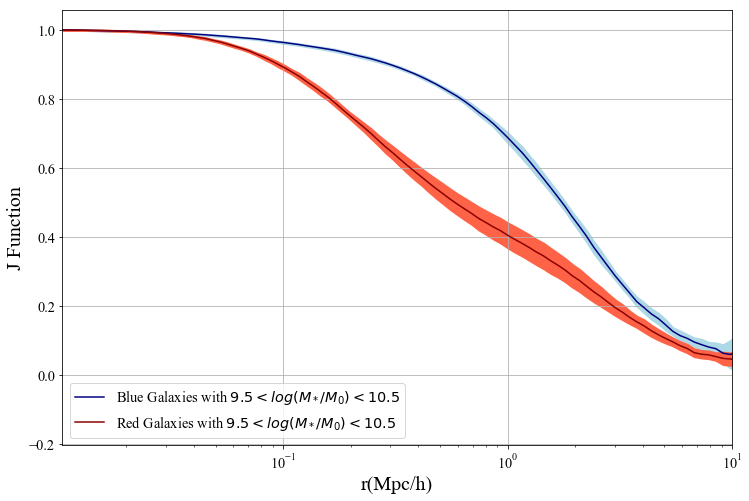

In [318]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                

bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bincenters, j_mean_blue,color = 'navy',label = 'Blue Galaxies with $9.5<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, j_mean_blue-j_std_blue,j_mean_blue+j_std_blue,color = 'lightblue',lw=2)

plt.plot(bincenters, j_mean_red,color = 'darkred',label = 'Red Galaxies with $9.5<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, j_mean_red-j_std_red,j_mean_red+j_std_red,color = 'tomato',lw=2)
#plt.xlim(0,4)
plt.xscale('log')
plt.xlim(0,10)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)',fontsize=20);
plt.ylabel('J Function',fontsize=20)
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
plt.savefig('j_function_red_blue.png')

In [319]:
v1_red = 1 - f1_red
v2_red = 1 - f2_red
v3_red = 1 - f3_red
v4_red = 1 - f4_red
v5_red = 1 - f5_red
v6_red = 1 - f6_red
v7_red = 1 - f7_red
v8_red = 1 - f8_red


v1_blue = 1 - f1_blue
v2_blue = 1 - f2_blue
v3_blue = 1 - f3_blue
v4_blue = 1 - f4_blue
v5_blue = 1 - f5_blue
v6_blue = 1 - f6_blue
v7_blue = 1 - f7_blue
v8_blue = 1 - f8_blue

In [320]:
v_mean_red= np.mean((v1_red,v2_red,v3_red,v4_red,v5_red,v6_red,v7_red,v8_red),axis = 0)
v_std_red = np.std((v1_red,v2_red,v3_red,v4_red,v5_red,v6_red,v7_red,v8_red),axis = 0)

In [321]:
v_mean_blue= np.mean((v1_blue,v2_blue,v3_blue,v4_blue,v5_blue,v6_blue,v7_blue,v8_blue),axis = 0)
v_std_blue = np.std((v1_blue,v2_blue,v3_blue,v4_blue,v5_blue,v6_blue,v7_blue,v8_blue),axis = 0)

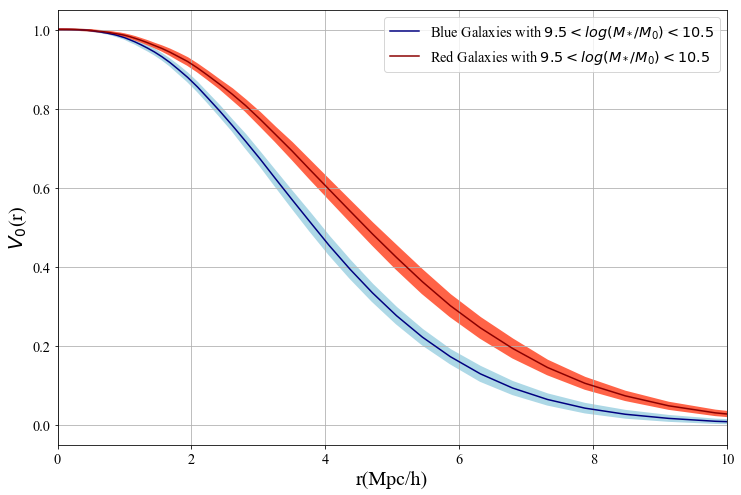

In [326]:
#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                

bincenters = 0.5*(bins[1:]+bins[:-1])
plt.plot(bincenters, v_mean_blue,color = 'navy',label = 'Blue Galaxies with $9.5<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, v_mean_blue-v_std_blue,v_mean_blue+v_std_blue,color = 'lightblue',lw=2)

plt.plot(bincenters, v_mean_red,color = 'darkred',label = 'Red Galaxies with $9.5<log(M_*/M_0)<10.5$')
plt.fill_between(bincenters, v_mean_red-v_std_red,v_mean_red+v_std_red,color = 'tomato',lw=2)
#plt.xlim(0,4)
#plt.xscale('log')
plt.xlim(0,10)
#plt.yscale('log')
plt.xlabel('r(Mpc/h)',fontsize=20);
plt.ylabel('$V_0$(r)',fontsize=20)
#plt.title('Poisson Point Process');
plt.grid('on')
plt.legend(loc=0)
plt.savefig('void_red_blue.png')

In [ ]:
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111,xlabel='r(Mpc/h)',ylabel = '$(\\xi_{red}(r)-\\xi_{blue}(r)))/\\xi_{all}(r)$')
ax.plot(bincenters,corr,color = 'purple')
ax.fill_between(bincenters,corr_rand_mean - corr_rand_std,corr_rand_mean + corr_rand_std,color = 'lightgreen')
ax.grid('on')
plt.savefig('delta_correlation.png')

In [36]:
%%time
minimum2 = []
for i in range(len(xyz_red_9_5)):
    dist = []
        
    for j in range(len(xyz_red_9_5)):
        if (j != i ):
            dist.append(distance(x_red_9_5[i],y_red_9_5[i],z_red_9_5[i],x_red_9_5[j],y_red_9_5[j],z_red_9_5[j]))
    minimum2.append(min(dist))
    
print(len(minimum2))

xr = np.random.uniform(np.amin(x_red_9_5),np.amax(x_red_9_5),len(x_red_9_5))
yr = np.random.uniform(np.amin(y_red_9_5),np.amax(y_red_9_5),len(y_red_9_5))
zr = np.random.uniform(np.amin(z_red_9_5),np.amax(z_red_9_5),len(z_red_9_5))

minimum_r2 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xyz_red_9_5)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x_red_9_5[j],y_red_9_5[j],z_red_9_5[j]))
    minimum_r2.append(min(dist))
    
print(len(minimum_r2))

19365
19365
Wall time: 2h 28min 23s


In [37]:
%%time
minimum3 = []
for i in range(len(xyz_blue_9_5)):
    dist = []
        
    for j in range(len(xyz_blue_9_5)):
        if (j != i ):
            dist.append(distance(x_blue_9_5[i],y_blue_9_5[i],z_blue_9_5[i],x_blue_9_5[j],y_blue_9_5[j],z_blue_9_5[j]))
    minimum3.append(min(dist))
    
print(len(minimum3))

xr = np.random.uniform(np.amin(x_blue_9_5),np.amax(x_blue_9_5),len(x_blue_9_5))
yr = np.random.uniform(np.amin(y_blue_9_5),np.amax(y_blue_9_5),len(y_blue_9_5))
zr = np.random.uniform(np.amin(z_blue_9_5),np.amax(z_blue_9_5),len(z_blue_9_5))

minimum_r3 = []
for i in range(len(xr)):
    dist = []
        
    for j in range(len(xyz_blue_9_5)):
        if (j != i ):
            dist.append(distance(xr[i],yr[i],zr[i],x_blue_9_5[j],y_blue_9_5[j],z_blue_9_5[j]))
    minimum_r3.append(min(dist))
    
print(len(minimum_r3))

46326
46326
Wall time: 14h 21min 40s


In [38]:
minimum_blue_9_5 = np.array(minimum3)
minimum_r_blue_9_5 = np.array(minimum_r3)
minimum_red_9_5 = np.array(minimum2)
minimum_r_red_9_5 = np.array(minimum_r2)

In [39]:
pd.DataFrame(minimum_blue_9_5).to_csv('minblue_9_5.csv',index = False)
pd.DataFrame(minimum_r_blue_9_5).to_csv('minrblue_9_5.csv',index = False)
pd.DataFrame(minimum_red_9_5).to_csv('minred_9_5.csv',index = False)
pd.DataFrame(minimum_r_red_9_5).to_csv('minrred_9_5.csv',index = False)

In [3]:
minimum_blue_9_5=np.array(pd.read_csv('minblue_9_5.csv'))
minimum_red_9_5=np.array(pd.read_csv('minred_9_5.csv'))
minimum_r_blue_9_5=np.array(pd.read_csv('minrblue_9_5.csv'))
minimum_r_red_9_5=np.array(pd.read_csv('minrred_9_5.csv'))

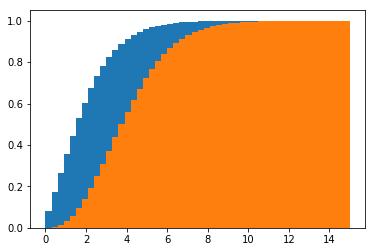

In [4]:
g_b,bins,_ = plt.hist(minimum_blue_9_5,50,density=True,cumulative = True,range=(0,15))
f_b,bins,_  = plt.hist(minimum_r_blue_9_5,50,density=True,cumulative = True,range=(0,15))

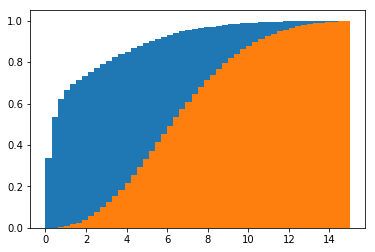

In [5]:
g_r,bins,_ = plt.hist(minimum_red_9_5,50,density=True,cumulative = True,range=(0,15))
f_r,bins,_  = plt.hist(minimum_r_red_9_5,50,density=True,cumulative = True,range=(0,15))

In [6]:
j_r = (np.ones(50)-g_r)/(np.ones(50)-f_r)

In [7]:
j_b = (np.ones(50)-g_b)/(np.ones(50)-f_b)

(0.3, 0.01)

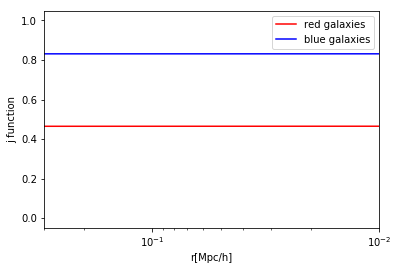

In [13]:
plt.plot(bins[:-2],j_r[:-1],color ='red',label='red galaxies')
plt.plot(bins[:-2],j_b[:-1],color ='blue',label='blue galaxies')
plt.xscale('log')
plt.xlim(0,10)
plt.ylabel('j function')
plt.xlabel('r[Mpc/h]')
plt.legend(loc=0)
#plt.yscale('log')
plt.xlim(0,0.01)

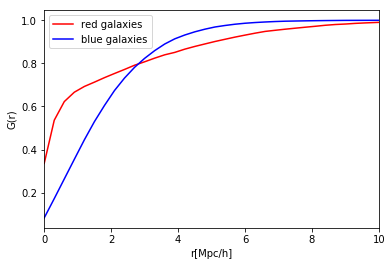

In [62]:
plt.plot(bins[:-1],g_r,color ='red',label='red galaxies')
plt.plot(bins[:-1],g_b,color ='blue',label='blue galaxies')
#plt.xscale('log')
plt.xlim(0,10)
plt.ylabel('G(r)')
plt.xlabel('r[Mpc/h]')
plt.legend(loc=0)
#plt.yscale('log')

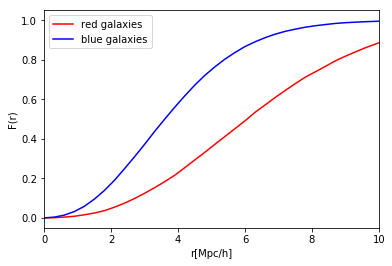

In [61]:
plt.plot(bins[:-1],f_r,color ='red',label='red galaxies')
plt.plot(bins[:-1],f_b,color ='blue',label='blue galaxies')
#plt.xscale('log')
plt.xlim(0,10)
plt.ylabel('F(r)')
plt.xlabel('r[Mpc/h]')
plt.legend(loc=0)
#plt.yscale('log')

In [59]:
V_b = 1 - f_b
V_r = 1 - f_r

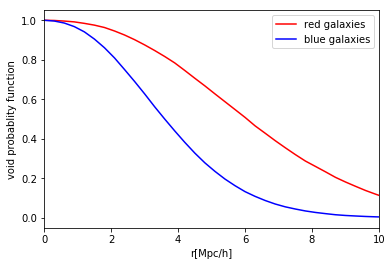

In [60]:
plt.plot(bins[:-1],V_r,color ='red',label='red galaxies')
plt.plot(bins[:-1],V_b,color ='blue',label='blue galaxies')
#plt.xscale('log')
plt.xlim(0,10)
plt.ylabel('void probablity function')
plt.xlabel('r[Mpc/h]')
plt.legend(loc=0)
#plt.yscale('log')

In [79]:
import random
gg = random.sample(minimum3,len(minimum2))
ff = random.sample(minimum_r3,len(minimum_r2))

In [85]:
len(minimum_r2)

19365

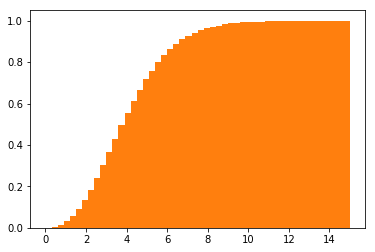

In [81]:
ff_r,bins,_  = plt.hist(np.array(minimum_r2),50,density=True,cumulative = True,range=(0,15))
ff_b,bins,_  = plt.hist(np.array(ff),50,density=True,cumulative = True,range=(0,15))

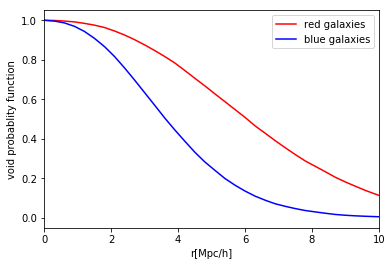

In [82]:
plt.plot(bins[:-1],1-ff_r,color ='red',label='red galaxies')
plt.plot(bins[:-1],1-ff_b,color ='blue',label='blue galaxies')
#plt.xscale('log')
plt.xlim(0,10)
plt.ylabel('void probablity function')
plt.xlabel('r[Mpc/h]')
plt.legend(loc=0)
#plt.yscale('log')

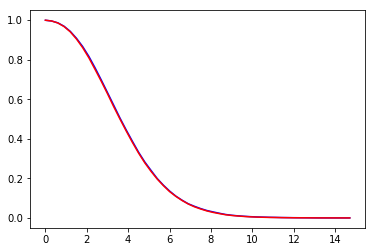

In [87]:
plt.plot(bins[:-1],1-ff_b,color ='blue',label='blue galaxies')
plt.plot(bins[:-1],V_b,color ='red',label='blue galaxies')

In [72]:
rbins = np.linspace(0.001,10,50)
from halotools import mock_observables
v1 = mock_observables.void_prob_func(xyz_red_9_5,rbins,n_ran=len(xyz_red_9_5))
v2 = mock_observables.void_prob_func(xyz_blue_9_5,rbins,n_ran=len(xyz_blue_9_5))

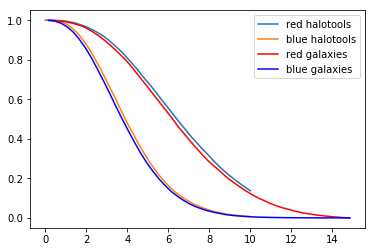

In [77]:
bincenters = 0.5*(bins[1:] + bins[:-1])
plt.plot(rbins,v1,label='red halotools')
plt.plot(rbins,v2,label='blue halotools')
plt.plot(bincenters,V_r,color ='red',label='red galaxies')
plt.plot(bincenters,V_b,color ='blue',label='blue galaxies')
plt.legend(loc=0)

# assembly bias

# $(\xi_{red}- \xi_{blue})/\xi_{all}$

In [40]:
len(gal_red)

218339

In [583]:
xyz_blue = gal_blue[['x','y','z']]/1000
xyz_red =gal_red[['x','y','z']].values/1000
xyz_all =gal[['x','y','z']]/1000

In [579]:
Nran = len(xyz_red)*500
xran = np.random.uniform(0, 205, Nran)
yran = np.random.uniform(0, 205, Nran)
zran = np.random.uniform(0, 205, Nran)
randoms = np.vstack((xran,yran,zran)).T

In [567]:
import halotools.mock_observables

corr_red =  halotools.mock_observables.tpcf(xyz_red, bins, period=205, estimator='Natural')

corr_blue =  halotools.mock_observables.tpcf(xyz_blue, bins, period=205, estimator='Natural')

corr_all =  halotools.mock_observables.tpcf(xyz_all, bins, period=205, estimator='Natural')

In [580]:
rbins = np.logspace(-1, 1.2, 8)

In [ ]:
import halotools.mock_observables
corr_red , cov_red =  halotools.mock_observables.tpcf_jackknife(xyz_red, randoms, rbins, Nsub = 3,period=205, estimator='Natural')
#corr_blue ,cov_blue=  halotools.mock_observables.tpcf_jackknife(xyz_blue, bins, period=205, estimator='Natural')
#corr_all,cov_all =  halotools.mock_observables.tpcf_jackknife(xyz_all, bins, period=205, estimator='Natural')

In [50]:
len(xyz_all)

515334

In [566]:
bins = np.logspace(-1,1.2,30)
bincenters = 0.5*(bins[1:]+bins[:-1])

In [82]:
len(xyz_blue)+len(xyz_red)

515334

In [83]:
len(xyz_all)

515334

In [27]:
blue_1 = xyz_blue[(xyz_blue['x']<102.5)&(xyz_blue['y']<102.5)&(xyz_blue['z']<102.5)]
blue_2 = xyz_blue[(xyz_blue['x']<102.5)&(xyz_blue['y']<102.5)&(xyz_blue['z']>102.5)]
blue_3 = xyz_blue[(xyz_blue['x']<102.5)&(xyz_blue['y']>102.5)&(xyz_blue['z']<102.5)]
blue_4 = xyz_blue[(xyz_blue['x']>102.5)&(xyz_blue['y']<102.5)&(xyz_blue['z']<102.5)]
blue_5 = xyz_blue[(xyz_blue['x']>102.5)&(xyz_blue['y']>102.5)&(xyz_blue['z']<102.5)]
blue_6 = xyz_blue[(xyz_blue['x']>102.5)&(xyz_blue['y']<102.5)&(xyz_blue['z']>102.5)]
blue_7 = xyz_blue[(xyz_blue['x']<102.5)&(xyz_blue['y']>102.5)&(xyz_blue['z']>102.5)]
blue_8 = xyz_blue[(xyz_blue['x']>102.5)&(xyz_blue['y']>102.5)&(xyz_blue['z']>102.5)]

In [28]:
red_1 = xyz_red[(xyz_red['x']<102.5)&(xyz_red['y']<102.5)&(xyz_red['z']<102.5)]
red_2 = xyz_red[(xyz_red['x']<102.5)&(xyz_red['y']<102.5)&(xyz_red['z']>102.5)]
red_3 = xyz_red[(xyz_red['x']<102.5)&(xyz_red['y']>102.5)&(xyz_red['z']<102.5)]
red_4 = xyz_red[(xyz_red['x']>102.5)&(xyz_red['y']<102.5)&(xyz_red['z']<102.5)]
red_5 = xyz_red[(xyz_red['x']>102.5)&(xyz_red['y']>102.5)&(xyz_red['z']<102.5)]
red_6 = xyz_red[(xyz_red['x']>102.5)&(xyz_red['y']<102.5)&(xyz_red['z']>102.5)]
red_7 = xyz_red[(xyz_red['x']<102.5)&(xyz_red['y']>102.5)&(xyz_red['z']>102.5)]
red_8 = xyz_red[(xyz_red['x']>102.5)&(xyz_red['y']>102.5)&(xyz_red['z']>102.5)]

In [34]:
all_1 = xyz_all[(xyz_all['x']<102.5)&(xyz_all['y']<102.5)&(xyz_all['z']<102.5)]
all_2 = xyz_all[(xyz_all['x']<102.5)&(xyz_all['y']<102.5)&(xyz_all['z']>102.5)]
all_3 = xyz_all[(xyz_all['x']<102.5)&(xyz_all['y']>102.5)&(xyz_all['z']<102.5)]
all_4 = xyz_all[(xyz_all['x']>102.5)&(xyz_all['y']<102.5)&(xyz_all['z']<102.5)]
all_5 = xyz_all[(xyz_all['x']>102.5)&(xyz_all['y']>102.5)&(xyz_all['z']<102.5)]
all_6 = xyz_all[(xyz_all['x']>102.5)&(xyz_all['y']<102.5)&(xyz_all['z']>102.5)]
all_7 = xyz_all[(xyz_all['x']<102.5)&(xyz_all['y']>102.5)&(xyz_all['z']>102.5)]
all_8 = xyz_all[(xyz_all['x']>102.5)&(xyz_all['y']>102.5)&(xyz_all['z']>102.5)]

In [107]:
len(red_1)

11063

In [32]:
xyz_blue_1 = blue_1[['x','y','z']].values

xyz_blue_2 = blue_2[['x','y','z']].values

xyz_blue_3 = blue_3[['x','y','z']].values

xyz_blue_4 = blue_4[['x','y','z']].values

xyz_blue_5 = blue_5[['x','y','z']].values

xyz_blue_6 = blue_6[['x','y','z']].values

xyz_blue_7 = blue_7[['x','y','z']].values

xyz_blue_8 = blue_8[['x','y','z']].values


In [29]:
xyz_red_1 = red_1[['x','y','z']].values

xyz_red_2 = red_2[['x','y','z']].values

xyz_red_3 = red_3[['x','y','z']].values

xyz_red_4 = red_4[['x','y','z']].values

xyz_red_5 = red_5[['x','y','z']].values

xyz_red_6 = red_6[['x','y','z']].values

xyz_red_7 = red_7[['x','y','z']].values

xyz_red_8 = red_8[['x','y','z']].values

In [35]:
xyz_all_1 = all_1[['x','y','z']].values

xyz_all_2 = all_2[['x','y','z']].values

xyz_all_3 = all_3[['x','y','z']].values

xyz_all_4 = all_4[['x','y','z']].values

xyz_all_5 = all_5[['x','y','z']].values

xyz_all_6 = all_6[['x','y','z']].values

xyz_all_7 = all_7[['x','y','z']].values

xyz_all_8 = all_8[['x','y','z']].values

In [51]:
import halotools.mock_observables

corr_red1 =  halotools.mock_observables.tpcf(xyz_red_1, bins, period=205, estimator='Natural')

corr_red2 =  halotools.mock_observables.tpcf(xyz_red_2, bins, period=205, estimator='Natural')

corr_red3 =  halotools.mock_observables.tpcf(xyz_red_3, bins, period=205, estimator='Natural')

corr_red4 =  halotools.mock_observables.tpcf(xyz_red_4, bins, period=205, estimator='Natural')

corr_red5 =  halotools.mock_observables.tpcf(xyz_red_5, bins, period=205, estimator='Natural')

corr_red6 =  halotools.mock_observables.tpcf(xyz_red_6, bins, period=205, estimator='Natural')

corr_red7 =  halotools.mock_observables.tpcf(xyz_red_7, bins, period=205, estimator='Natural')

corr_red8 =  halotools.mock_observables.tpcf(xyz_red_8, bins, period=205, estimator='Natural')


In [52]:
import halotools.mock_observables

corr_blue1 =  halotools.mock_observables.tpcf(xyz_blue_1, bins, period=205, estimator='Natural')

corr_blue2 =  halotools.mock_observables.tpcf(xyz_blue_2, bins, period=205, estimator='Natural')

corr_blue3 =  halotools.mock_observables.tpcf(xyz_blue_3, bins, period=205, estimator='Natural')

corr_blue4 =  halotools.mock_observables.tpcf(xyz_blue_4, bins, period=205, estimator='Natural')

corr_blue5 =  halotools.mock_observables.tpcf(xyz_blue_5, bins, period=205, estimator='Natural')

corr_blue6 =  halotools.mock_observables.tpcf(xyz_blue_6, bins, period=205, estimator='Natural')

corr_blue7 =  halotools.mock_observables.tpcf(xyz_blue_7, bins, period=205, estimator='Natural')

corr_blue8 =  halotools.mock_observables.tpcf(xyz_blue_8, bins, period=205, estimator='Natural')

In [53]:
import halotools.mock_observables

corr_all1 =  halotools.mock_observables.tpcf(xyz_all_1, bins, period=205, estimator='Natural')

corr_all2 =  halotools.mock_observables.tpcf(xyz_all_2, bins, period=205, estimator='Natural')

corr_all3 =  halotools.mock_observables.tpcf(xyz_all_3, bins, period=205, estimator='Natural')

corr_all4 =  halotools.mock_observables.tpcf(xyz_all_4, bins, period=205, estimator='Natural')

corr_all5 =  halotools.mock_observables.tpcf(xyz_all_5, bins, period=205, estimator='Natural')

corr_all6 =  halotools.mock_observables.tpcf(xyz_all_6, bins, period=205, estimator='Natural')

corr_all7 =  halotools.mock_observables.tpcf(xyz_all_7, bins, period=205, estimator='Natural')

corr_all8 =  halotools.mock_observables.tpcf(xyz_all_8, bins, period=205, estimator='Natural')

In [87]:
corr_red_mean= np.mean((corr_red1,corr_red2,corr_red3,corr_red4,corr_red5,corr_red6,corr_red7,corr_red8),axis = 0)
corr_red_std = np.std((corr_red1,corr_red2,corr_red3,corr_red4,corr_red5,corr_red6,corr_red7,corr_red8),axis = 0)

corr_blue_mean= np.mean((corr_blue1,corr_blue2,corr_blue3,corr_blue4,corr_blue5,corr_blue6,corr_blue7,corr_blue8),axis = 0)
corr_blue_std = np.std((corr_blue1,corr_blue2,corr_blue3,corr_blue4,corr_blue5,corr_blue6,corr_blue7,corr_blue8),axis = 0)

corr_all_mean= np.mean((corr_all1,corr_all2,corr_all3,corr_all4,corr_all5,corr_all6,corr_all7,corr_all8),axis = 0)
corr_all_std = np.std((corr_all1,corr_all2,corr_all3,corr_all4,corr_all5,corr_all6,corr_all7,corr_all8),axis = 0)




In [85]:
corr_red_std = 7/8*np.sum((corr_red1-corr_red_mean,corr_red2-corr_red_mean,corr_red3-corr_red_mean,corr_red4-corr_red_mean,corr_red5-corr_red_mean,corr_red6-corr_red_mean,corr_red7-corr_red_mean,corr_red8-corr_red_mean),axis=0)
#corr_blue_std
#corr_all_std

In [89]:
corr_red_std = corr_red_std*1/np.sqrt(8)

In [90]:
corr_red_std

array([1.62734248e+03, 1.05169043e+03, 9.04948510e+02, 6.35471565e+02,
       4.80324623e+02, 3.63933234e+02, 2.77790740e+02, 2.13088168e+02,
       1.66372090e+02, 1.36483600e+02, 1.04114859e+02, 7.86828436e+01,
       5.90391443e+01, 4.40759015e+01, 3.37663952e+01, 2.43401267e+01,
       1.67235924e+01, 1.20205509e+01, 8.49926363e+00, 5.87257544e+00,
       4.39469134e+00, 2.86146509e+00, 1.69284027e+00, 9.52636730e-01,
       7.38295243e-01, 4.98918565e-01, 3.40320752e-01, 4.37125769e-01,
       2.38271338e-01])

In [88]:
corr_red_std

array([4.60281960e+03, 2.97462973e+03, 2.55958091e+03, 1.79738501e+03,
       1.35856319e+03, 1.02935863e+03, 7.85710863e+02, 6.02704355e+02,
       4.70571333e+02, 3.86033916e+02, 2.94481291e+02, 2.22548689e+02,
       1.66987917e+02, 1.24665475e+02, 9.55057881e+01, 6.88442746e+01,
       4.73014624e+01, 3.39992521e+01, 2.40395478e+01, 1.66101517e+01,
       1.24300642e+01, 8.09344549e+00, 4.78807532e+00, 2.69446357e+00,
       2.08821429e+00, 1.41115480e+00, 9.62572446e-01, 1.23637838e+00,
       6.73933117e-01])

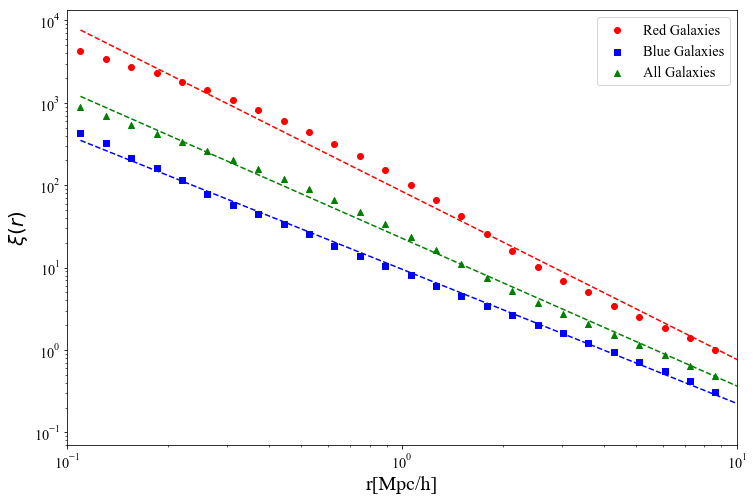

In [577]:
bincenters= 0.5*(bins[1:]+bins[:-1])

#plt.plot(bins[:-2], j_mean,label='poisson point process')
#plt.fill_between(bins[:-2], j_mean-j_std, j_mean+j_std,color = 'lightblue',lw=2)
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                

bincenters = 0.5*(bins[1:]+bins[:-1])

#plt.scatter(bincenters,corr_red_mean,color = 'red')

plt.scatter(bincenters, corr_red,color = 'red',marker = 'o',label = 'Red Galaxies')

#plt.scatter(bincenters,corr_blue_mean,color = 'navy')
plt.scatter(bincenters, corr_blue,color = 'blue',marker='s',label = 'Blue Galaxies')
#plt.scatter(bincenters,corr_all_mean,color = 'green')
plt.scatter(bincenters, corr_all,color = 'green',marker='^',label = 'All Galaxies')
#plt.plot(bincenters, corr_red_mean,color = 'red',label = 'Blue Galaxies with $9.1<log(M_*/M_0)<10$')
#plt.fill_between(bincenters, corr_red_mean-corr_red_std,corr_red_mean+corr_red_std,color = 'magenta',lw=2)

#plt.plot(bincenters, corr_blue_mean,color = 'navy',label = 'Red Galaxies with $8.5<log(M_*/M_0)<10$')
#plt.fill_between(bincenters,corr_blue_mean-corr_blue_std,corr_blue_mean+corr_blue_std,color = 'lightblue',lw=2)

#plt.plot(bincenters, corr_all_mean,color = 'green',label = 'Blue Galaxies with $9.1<log(M_*/M_0)<10$')
#plt.fill_between(bincenters, corr_all_mean-corr_all_std,corr_all_mean+corr_all_std,color = 'lightgreen',lw=2)

plt.plot(bincenters,xi_red,'r--')
plt.plot(bincenters,xi_blue,'b--')
plt.plot(bincenters,xi_all,'g--')
#plt.xlim(0,4)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.1,10)
#plt.yscale('log')
plt.xlabel('r[Mpc/h]',fontsize=20);
plt.ylabel('$\\xi(r)$',fontsize=20)
#plt.title('Poisson Point Process');
#plt.grid('on')
plt.legend(loc=0)
plt.yscale('log')
x = np.linspace(0.1,10,10)
#y = x*(-1000) + 10000
#plt.plot(x,y)
#plt.grid('on')
plt.savefig('corr_red_blue_withouterror.png')

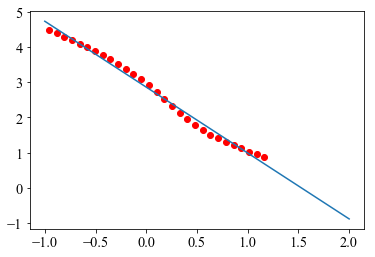

In [151]:
plt.scatter(np.log10(bincenters),np.log10(corr_red_mean),color = 'red')
plt.plot(x,y_red)

In [573]:
from scipy import stats
s_red, int_red,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_red))
s_blue, int_blue,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_blue))
s_all, int_all,a,b,z = stats.linregress(np.log10(bincenters),np.log10(corr_all))

In [200]:
int_blue

1.9000225049655795

In [199]:
int_red/gamma_red

1.5251553673358498

In [201]:
int_blue/gamma_blue

1.5598651498438012

In [574]:
gamma_red = -s_red
gamma_blue = -s_blue
gamma_all = -s_all

r_red = 10**(int_red/gamma_red)
r_blue =10**(int_blue/gamma_blue)
r_all =10**(int_all/gamma_all)

In [575]:
xi_red = (bincenters/r_red)**(-gamma_red)
xi_blue= (bincenters/r_blue)**(-gamma_blue)
xi_all= (bincenters/r_all)**(-gamma_all)

In [578]:
print(gamma_red)
print(gamma_blue)
print(gamma_all)


print(r_red)
print(r_blue)
print(r_all)

2.0386486208540613
1.6280519255147252
1.7926588974856823
8.800874412833078
4.003624437116139
5.7150194973143815


In [195]:
r_red

33.508529331257265

In [179]:
x = np.linspace(-1,2,10)
y_red =s_red*x+int_red
y_blue= s_blue*x+int_blue
y_all= s_all*x+int_all

In [192]:
gamma_all

1.5583745830561435

In [178]:
r_blue

36.296533509736335

In [175]:
gamma_blue

1.2180684369772863

In [176]:
gamma_all

1.5583745830561435

In [136]:
int_red

2.862905457955131

In [137]:
s_red

-1.877123812609381

In [139]:
y_red

array([4.74002927, 2.71427246, 2.18389752, 1.86525373, 1.63674469,
       1.4584639 , 1.31226077, 1.18833344, 1.08078287, 0.98578165])

In [182]:
10**1.5

31.622776601683793

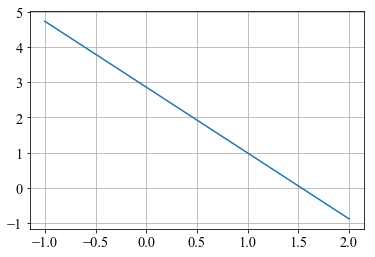

In [181]:
plt.plot(x,y_red)
#plt.yscale('log')
#plt.xscale('log')
plt.grid('on')

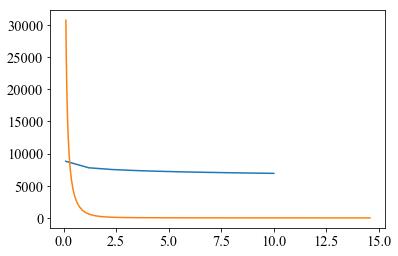

In [123]:
plt.plot(x,y_red)
plt.plot(bincenters,corr_red_mean)

# random labeling property

In [187]:
rand_color_class = np.random.randint(2,size=(len(gal)))

In [188]:
gal['rand_color_class'] = rand_color_class

In [189]:
gal_blue_rand = gal[gal['rand_color_class']==0]
gal_red_rand = gal[gal['rand_color_class']==1]

In [190]:
len(gal_blue_rand)

257274

In [191]:
len(gal_red_rand)

258060

In [192]:
xyz_blue_rand = gal_blue_rand[['x','y','z']].values/1000
xyz_red_rand =gal_red_rand[['x','y','z']].values/1000
xyz_all_rand =gal[['x','y','z']].values/1000

In [193]:
import halotools.mock_observables

corr_red_rand =  halotools.mock_observables.tpcf(xyz_red_rand, bins, period=205, estimator='Landy-Szalay')
corr_blue_rand =   halotools.mock_observables.tpcf(xyz_blue_rand, bins, period=205, estimator='Landy-Szalay')
corr_all_rand =  halotools.mock_observables.tpcf(xyz_all_rand, bins, period=205, estimator='Landy-Szalay')

In [194]:
corr_rand15 = (corr_red_rand-corr_blue_rand)/corr_all_rand

In [195]:
corr_rand_mean = np.mean((corr_rand,corr_rand1,corr_rand2,corr_rand3,corr_rand4,corr_rand5,corr_rand6,corr_rand7,corr_rand8,corr_rand9,corr_rand10,corr_rand11,corr_rand12,corr_rand13,corr_rand14,corr_rand15),axis=0)
corr_rand_std = np.std((corr_rand,corr_rand1,corr_rand2,corr_rand3,corr_rand4,corr_rand5,corr_rand6,corr_rand7,corr_rand8,corr_rand9,corr_rand10,corr_rand11,corr_rand12,corr_rand13,corr_rand14,corr_rand15),axis=0)

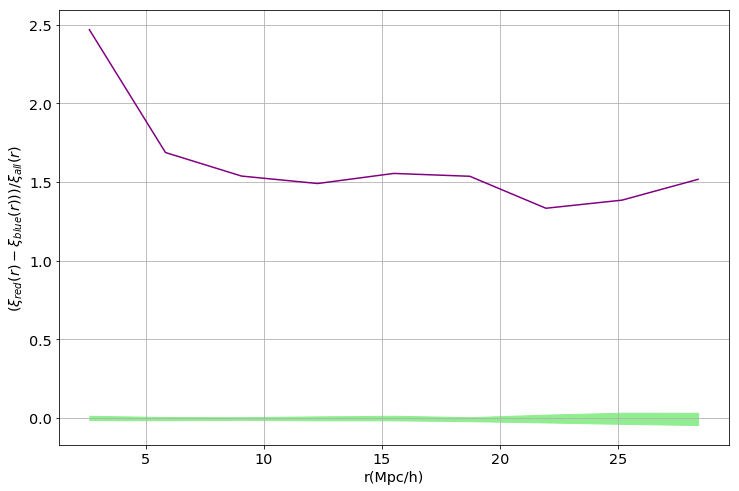

In [200]:
fig = plt.figure(figsize=(12,8))
params = {'legend.fontsize': 'x-large',
          
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111,xlabel='r(Mpc/h)',ylabel = '$(\\xi_{red}(r)-\\xi_{blue}(r)))/\\xi_{all}(r)$')
ax.plot(bincenters,corr,color = 'purple')
ax.fill_between(bincenters,corr_rand_mean - corr_rand_std,corr_rand_mean + corr_rand_std,color = 'lightgreen')
ax.grid('on')
plt.savefig('delta_correlation.png')

In [206]:
len(xyz_blue)

296995

In [207]:
len(xyz_red)

218339

# Mark Correlation Function

# $M(r) = \frac{1 + W(r)}{1+\xi(r)} = \frac{WW}{DD} = \sum \frac{m_im_j}{n(r)\bar{m}^2} \rightarrow M(r)>1 \rightarrow \sum m_im_j>n(r)\bar{m}^2$

In [54]:
mark_color = gal['g_r'].values
mark_stellarmass = gal['stellarmass'].values

In [55]:
mean_mark_color = np.mean(gal['g_r'].values)
mean_mark_stellarmass = np.mean(gal['stellarmass'].values)

In [56]:
mark_color = mark_color/mean_mark_color
mark_stellarmass = mark_stellarmass/mean_mark_stellarmass

In [57]:
x = gal['x'].values/1000
y = gal['y'].values/1000
z = gal['z'].values/1000


In [58]:
coords = np.vstack((x,y,z)).T

In [59]:
coords.shape

(515334, 3)

In [60]:
rbins = np.logspace(-2,1,15)
import halotools.mock_observables
color_corr_dd = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 = mark_color, period=205, normalize_by='number_counts',weight_func_id =1)

In [61]:
rbins = np.logspace(-2,1,15)
import halotools.mock_observables
mass_corr_dd = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 = mark_stellarmass, period=205, normalize_by='number_counts',weight_func_id =1)

In [62]:
rbins

array([ 0.01      ,  0.01637894,  0.02682696,  0.04393971,  0.07196857,
        0.11787686,  0.19306977,  0.31622777,  0.51794747,  0.8483429 ,
        1.38949549,  2.27584593,  3.72759372,  6.1054023 , 10.        ])

In [63]:
bincenters = 0.5*(rbins[1:]+rbins[:-1])

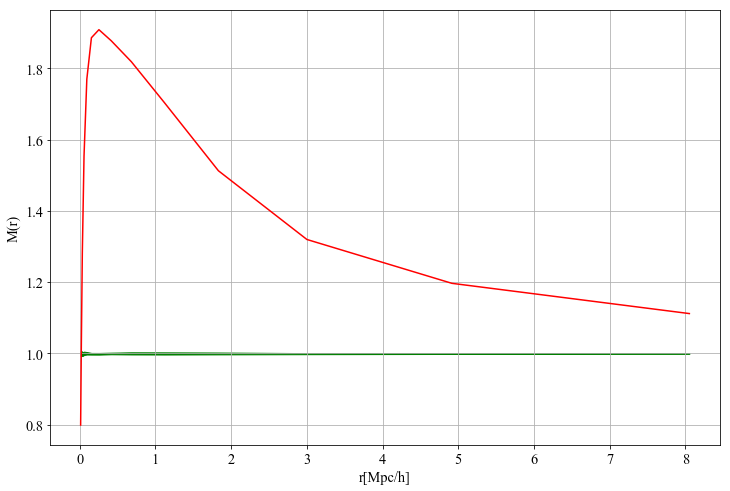

In [105]:
fig = plt.figure(figsize=(12,8))
csfont = {'fontname':'Times New Roman'}
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111)
ax.plot(bincenters,color_corr_dd,color = 'red')
ax.fill_between(bincenters,marked_corr_shuffle_color_mean - marked_corr_shuffle_color_std,marked_corr_shuffle_color_mean + marked_corr_shuffle_color_std,color = 'green')
#ax.fill_between(bincenters,corr_rand_mean - corr_rand_std,corr_rand_mean + corr_rand_std,color = 'lightgreen')
#ax.grid('on'),xlabel='$log(M_* h/M_0)$',ylabel = '$log[n(>M)h^3/Mpc^3]$'
plt.xlabel('r[Mpc/h]')
plt.ylabel('M(r)')
plt.grid('on')
#plt.xlim(8,12)
#plt.ylim(-6,-1)
plt.savefig('marked_correlation_color.png')


NameError: name 'mass_corr_dd' is not defined

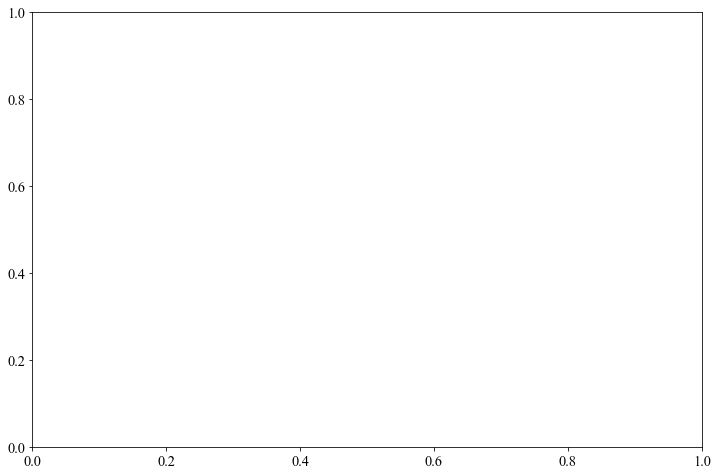

In [53]:
fig = plt.figure(figsize=(12,8))
csfont = {'fontname':'Times New Roman'}
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111)
ax.plot(bincenters,mass_corr_dd,color = 'blue')
ax.fill_between(bincenters,marked_mass_shuffle_color_mean - marked_mass_shuffle_color_std,marked_mass_shuffle_color_mean + marked_mass_shuffle_color_std,color = 'green')
#ax.grid('on'),xlabel='$log(M_* h/M_0)$',ylabel = '$log[n(>M)h^3/Mpc^3]$'
plt.xlabel('r[Mpc/h]')
plt.ylabel('M(r)')
plt.grid('on')
#plt.xlim(8,12)
#plt.ylim(-6,-1)
plt.xscale('log')
#plt.savefig('marked_correlation_stellar_mass.png')

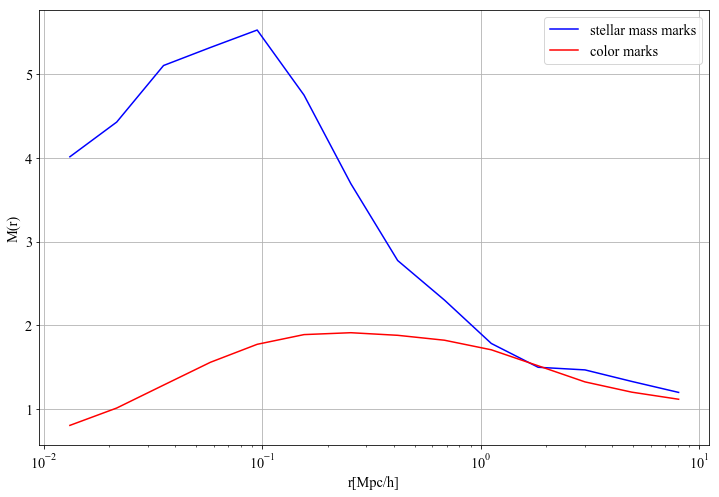

In [66]:
fig = plt.figure(figsize=(12,8))
csfont = {'fontname':'Times New Roman'}
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111)
ax.plot(bincenters,mass_corr_dd,color = 'blue',label='stellar mass marks')
ax.plot(bincenters,color_corr_dd,color ='red',label='color marks')
#ax.grid('on'),xlabel='$log(M_* h/M_0)$',ylabel = '$log[n(>M)h^3/Mpc^3]$'
plt.xlabel('r[Mpc/h]')
plt.ylabel('M(r)')
plt.grid('on')
#plt.xlim(8,12)
#plt.ylim(-6,-1)
plt.xscale('log')
plt.legend(loc=0)
#plt.savefig('marked_correlation_stellar_mass.png')

In [108]:
gal['stellarmass_shuffle'] = gal['stellarmass']

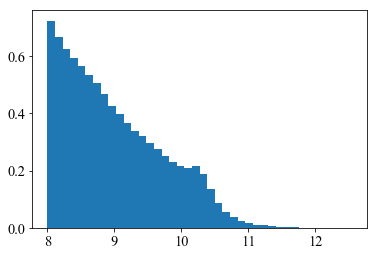

In [168]:
plt.hist(gal['log_mass'],40,density = True);

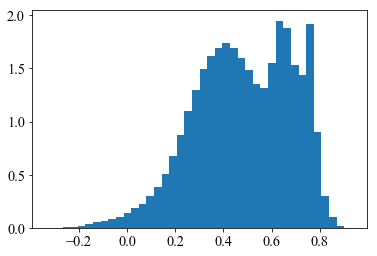

In [163]:
plt.hist(gal['g_r'],40,density = True);

In [154]:
np.random.shuffle(gal['stellarmass_shuffle'].values)

In [155]:
marks_mass_shuffle = gal['stellarmass_shuffle'].values
mean_mark_mass_shuffle = np.mean(gal['stellarmass_shuffle'].values)
mark_mass_shuffle = marks_mass_shuffle/mean_mark_mass_shuffle

In [156]:
rbins = np.logspace(-2,1,15)

marked_corr_shuffle_mass15 = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 =mark_mass_shuffle, period=205, normalize_by='number_counts',weight_func_id =1)

In [157]:
marked_mass_shuffle_color_mean= np.mean((marked_corr_shuffle_mass,marked_corr_shuffle_mass1,marked_corr_shuffle_mass2,marked_corr_shuffle_mass3,marked_corr_shuffle_mass4,marked_corr_shuffle_mass5,marked_corr_shuffle_mass6,marked_corr_shuffle_mass7,marked_corr_shuffle_mass8,marked_corr_shuffle_mass9,marked_corr_shuffle_mass10,marked_corr_shuffle_mass11,marked_corr_shuffle_mass12,marked_corr_shuffle_mass13,marked_corr_shuffle_mass14,marked_corr_shuffle_mass15),axis=0)

In [158]:
marked_mass_shuffle_color_std = np.std((marked_corr_shuffle_mass,marked_corr_shuffle_mass1,marked_corr_shuffle_mass2,marked_corr_shuffle_mass3,marked_corr_shuffle_mass4,marked_corr_shuffle_mass5,marked_corr_shuffle_mass6,marked_corr_shuffle_mass7,marked_corr_shuffle_mass8,marked_corr_shuffle_mass9,marked_corr_shuffle_mass10,marked_corr_shuffle_mass11,marked_corr_shuffle_mass12,marked_corr_shuffle_mass13,marked_corr_shuffle_mass14,marked_corr_shuffle_mass15),axis=0)

In [97]:
marks_color_shuffle = gal['g_r_shuffle'].values
mean_mark_color_shuffle = np.mean(gal['g_r_shuffle'].values)
mark_color_shuffle = marks_color_shuffle/mean_mark_color_shuffle

In [98]:
rbins = np.logspace(-2,1,15)

marked_corr_shuffle15 = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 = mark_color_shuffle, period=205, normalize_by='number_counts',weight_func_id =1)

In [102]:
marked_corr_shuffle_color_mean= np.mean((marked_corr_shuffle,marked_corr_shuffle1,marked_corr_shuffle2,marked_corr_shuffle3,marked_corr_shuffle4,marked_corr_shuffle5,marked_corr_shuffle6,marked_corr_shuffle7,marked_corr_shuffle8,marked_corr_shuffle9,marked_corr_shuffle10,marked_corr_shuffle11,marked_corr_shuffle12,marked_corr_shuffle13,marked_corr_shuffle14,marked_corr_shuffle15),axis=0)

In [101]:
marked_corr_shuffle_color_std = np.std((marked_corr_shuffle,marked_corr_shuffle1,marked_corr_shuffle2,marked_corr_shuffle3,marked_corr_shuffle4,marked_corr_shuffle5,marked_corr_shuffle6,marked_corr_shuffle7,marked_corr_shuffle8,marked_corr_shuffle9,marked_corr_shuffle10,marked_corr_shuffle11,marked_corr_shuffle12,marked_corr_shuffle13,marked_corr_shuffle14,marked_corr_shuffle15),axis=0)

# Ranked Mark Correlation function

In [42]:
gal['rank_c'] = gal['g_r'].rank()
gal['rank_m'] = gal['stellarmass'].rank()

In [43]:
color_rank_mark = gal['rank_c'].values/np.mean(gal['rank_c'].values)
mass_rank_mark = gal['rank_m'].values/np.mean(gal['rank_m'].values)

In [44]:
x = gal['x'].values/1000
y = gal['y'].values/1000
z = gal['z'].values/1000

In [45]:
coords = np.vstack((x,y,z)).T

In [47]:
rbins = np.logspace(-2,1,15)
import halotools.mock_observables
color_corr_rank = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 = color_rank_mark, period=205, normalize_by='number_counts',weight_func_id =1)

In [49]:
rbins = np.logspace(-2,1,15)
import halotools.mock_observables
mass_corr_rank = halotools.mock_observables.marked_tpcf(coords, rbins,marks1 = mass_rank_mark, period=205, normalize_by='random_marks',weight_func_id =1)

In [50]:
bincenters = 0.5*(rbins[1:]+rbins[:-1])

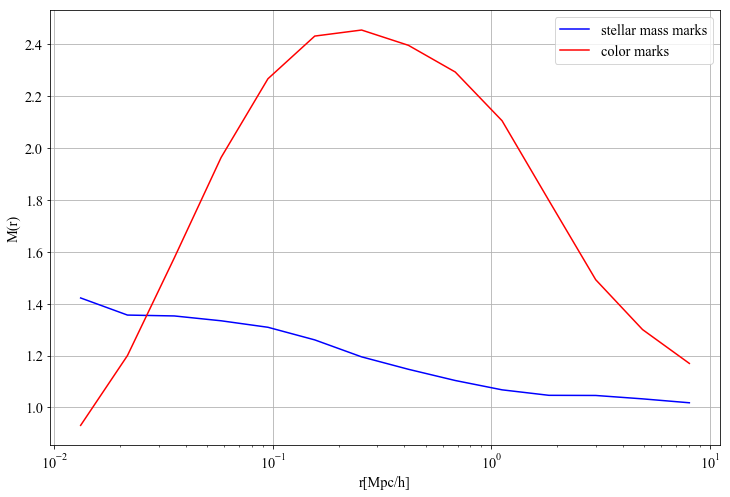

In [67]:
fig = plt.figure(figsize=(12,8))
csfont = {'fontname':'Times New Roman'}
params = {'legend.fontsize': 'x-large',
          'font.family':'Times New Roman',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)                
ax = fig.add_subplot(111)
ax.plot(bincenters,mass_corr_rank,color = 'blue',label='stellar mass marks')
ax.plot(bincenters,color_corr_rank,color = 'red',label='color marks')
#ax.fill_between(bincenters,marked_mass_shuffle_color_mean - marked_mass_shuffle_color_std,marked_mass_shuffle_color_mean + marked_mass_shuffle_color_std,color = 'green')
#ax.grid('on'),xlabel='$log(M_* h/M_0)$',ylabel = '$log[n(>M)h^3/Mpc^3]$'
plt.xlabel('r[Mpc/h]')
plt.ylabel('M(r)')
plt.grid('on')
plt.xscale('log')
plt.legend(loc=0)
#plt.xlim(8,12)
#plt.ylim(-6,-1)
#plt.savefig('marked_correlation_stellar_mass.png')